# Sharing my Code for the Credit Card Fraud Kaggle Exercise - Do upvote if it helps and share any feedback for improvement :-)

In [427]:
# importing basic libraries & setting directory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

# to avoid all warnings
import warnings
warnings.filterwarnings('ignore')

In [481]:
# Importing the file to Python

application_record = pd.read_csv("application_record.csv")
credit_record = pd.read_csv("credit_record.csv")

In [3]:
# checking the basic stats

print('=======================')
print('===========  Details for Application Record Rows x Columns =============')
print(application_record.shape)
print('=======================')
print(application_record.head(5))
print('=======================')
print(application_record.describe)
print('=======================')
print(application_record.info)
print('=======================')
print(application_record.dtypes)
print('=======================')

===========  Details for Application Record Rows x Columns =============
(438557, 18)
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE

In [4]:
# Checking the list of unique values for each of the Categorical Variables in Application Data

print("======================")
print("Unique Values of CODE_GENDER")
print(application_record['CODE_GENDER'].unique())
print(application_record['CODE_GENDER'].nunique())
print("======================")
print("Unique Values of FLAG_OWN_CAR")
print(application_record['FLAG_OWN_CAR'].unique())
print(application_record['FLAG_OWN_CAR'].nunique())
print("======================")
print("Unique Values of FLAG_OWN_REALTY")
print(application_record['FLAG_OWN_REALTY'].unique())
print(application_record['FLAG_OWN_REALTY'].nunique())
print("======================")
print("Unique Values of NAME_INCOME_TYPE")
print(application_record['NAME_INCOME_TYPE'].unique())
print(application_record['NAME_INCOME_TYPE'].nunique())
print("======================")
print("Unique Values of NAME_EDUCATION_TYPE")
print(application_record['NAME_EDUCATION_TYPE'].unique())
print(application_record['NAME_EDUCATION_TYPE'].nunique())
print("======================")
print("Unique Values of NAME_FAMILY_STATUS")
print(application_record['NAME_FAMILY_STATUS'].unique())
print(application_record['NAME_FAMILY_STATUS'].nunique())
print("======================")
print("Unique Values of NAME_HOUSING_TYPE")
print(application_record['NAME_HOUSING_TYPE'].unique())
print(application_record['NAME_HOUSING_TYPE'].nunique())
print("======================")
print(application_record['OCCUPATION_TYPE'].unique())
print(application_record['OCCUPATION_TYPE'].nunique())
print("======================")

Unique Values of CODE_GENDER
['M' 'F']
2
Unique Values of FLAG_OWN_CAR
['Y' 'N']
2
Unique Values of FLAG_OWN_REALTY
['Y' 'N']
2
Unique Values of NAME_INCOME_TYPE
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
5
Unique Values of NAME_EDUCATION_TYPE
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
5
Unique Values of NAME_FAMILY_STATUS
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
5
Unique Values of NAME_HOUSING_TYPE
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
6
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
18


In [5]:
# checking the basic stats

print('=======================')
print('===========  Details for Credit Record Rows x Columns =============')
print(credit_record.shape)
print('=======================')
print(credit_record.head(5))
print('=======================')
print(credit_record.describe)
print('=======================')
print(credit_record.info)
print('=======================')
print(credit_record.dtypes)
print('=======================')

===========  Details for Credit Record Rows x Columns =============
(1048575, 3)
        ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C
<bound method NDFrame.describe of               ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]>
<bound method DataFrame.info of               ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711    

In [6]:
#checking column-wise count of null values

print('=====================================')
print('===========  Null for Application Record ============')
print(application_record.isnull().sum())
print('===========  Null for Credit Record ============')
print(credit_record.isnull().sum())
print('=====================================')

===========  Null for Application Record ============
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64
===========  Null for Credit Record ============
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


In [7]:
# Checking the list of unique values for each of the Categorical Variables in Credit Data

print("======================")
print("Unique Values of STATUS")
print(credit_record['STATUS'].unique())
print(credit_record['STATUS'].nunique())
print("======================")

Unique Values of STATUS
['X' '0' 'C' '1' '2' '3' '4' '5']
8


# Analysis as of now :

Credit Data have:


[1048575 rows x 3 columns]

Numeric Columns = 2 + String/Categorical Columns = 1



Application Data have:


[438557 rows x 18 columns]

Numeric Columns = 8 + String/Categorical Columns = 8 + Float Columns = 2


In [8]:
# to find duplicates if any 

credit_record.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1048575, dtype: bool

In [9]:
# will show the number of Columns and Rows where duplicate is there

credit_record[credit_record.duplicated()].shape

(0, 3)

In [10]:
# to find duplicates if any 

application_record.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
438552    False
438553    False
438554    False
438555    False
438556    False
Length: 438557, dtype: bool

In [11]:
#Count of Unique Records in application set

application_record.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [12]:
#Count of Unique Records in Credit set

credit_record.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [13]:
# will show the number of Columns and Rows where duplicate is there

application_record[application_record.duplicated()].shape

(0, 18)

In [14]:
# Doing a count for each variable/record of a column in dataset

credit_record['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [15]:
# Creating a Formulae for "STATUS" column to bucket minimum number of records say 2,3,4 in 1 bucket and all othere in another

def func_status(input_string):
    if input_string == "C":
        return 0
    elif input_string == "X":
        return 0
    elif input_string == '0':
        return 1
    elif input_string == '1':
        return 1
    elif input_string == '2':
        return 1
    elif input_string == '3':
        return 1
    elif input_string == '4':
        return 1
    elif input_string == '5':
        return 1
    else:
        return 0

In [16]:
# applying the function to convert STATUS to 1 or 0

credit_record['STATUS'] = credit_record['STATUS'].apply(lambda input_variable:func_status(input_variable))

In [17]:
# Doing a count for each variable/record for "STATUS" column in dataset after applying the function

credit_record['STATUS'].value_counts()

0    651261
1    397314
Name: STATUS, dtype: int64

<AxesSubplot:xlabel='STATUS', ylabel='count'>

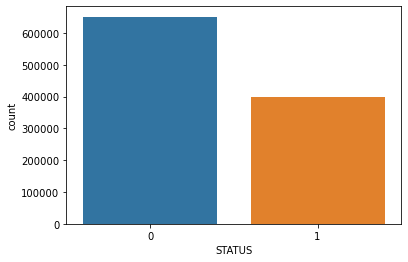

In [18]:
# plotting the STATUS variable-wise

sns.countplot( x='STATUS', data = credit_record )

# Merging the 2 DataSets based on the common field "ID" and Left Join - Direct to Direct (as it is)

In [19]:
# Merging both the data set  - based on LEFT JOIN 

Merged_Data =  pd.merge(application_record, credit_record, how='left', on='ID') 

In [20]:
# finding the overall shape now 

Merged_Data.shape

(1179815, 20)

In [21]:
# to find duplicates if any 

Merged_Data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1179810    False
1179811    False
1179812    False
1179813    False
1179814    False
Length: 1179815, dtype: bool

In [22]:
# taking count of unique values after Merging 

Merged_Data.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
MONTHS_BALANCE             61
STATUS                      2
dtype: int64

In [23]:
# Count of nulls/missing in the Merged dataset

Merged_Data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        362928
CNT_FAM_MEMBERS             0
MONTHS_BALANCE         402100
STATUS                 402100
dtype: int64

In [24]:
# will show the number of Columns and Rows where duplicate is there

Merged_Data[Merged_Data.duplicated()].shape

(0, 20)

In [25]:
# checking the basic stats

print('=======================')
print('===========  Details for Merged_Data :: Rows x Columns =============')
print(Merged_Data.shape)
print('=======================')
print(Merged_Data.head(5))
print('=======================')
print(Merged_Data.describe)
print('=======================')
print(Merged_Data.info)
print('=======================')
print(Merged_Data.dtypes)
print('=======================')

===========  Details for Merged_Data :: Rows x Columns =============
(1179815, 20)
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_B

In [26]:
# Checking the list of unique values for each of the Categorical Variables in Merged_Data

print("======================")
print("Unique Values of CODE_GENDER")
print(Merged_Data['CODE_GENDER'].unique())
print(Merged_Data['CODE_GENDER'].nunique())
print("======================")
print("Unique Values of FLAG_OWN_CAR")
print(Merged_Data['FLAG_OWN_CAR'].unique())
print(Merged_Data['FLAG_OWN_CAR'].nunique())
print("======================")
print("Unique Values of FLAG_OWN_REALTY")
print(Merged_Data['FLAG_OWN_REALTY'].unique())
print(Merged_Data['FLAG_OWN_REALTY'].nunique())
print("======================")
print("Unique Values of NAME_INCOME_TYPE")
print(Merged_Data['NAME_INCOME_TYPE'].unique())
print(Merged_Data['NAME_INCOME_TYPE'].nunique())
print("======================")
print("Unique Values of NAME_EDUCATION_TYPE")
print(Merged_Data['NAME_EDUCATION_TYPE'].unique())
print(Merged_Data['NAME_EDUCATION_TYPE'].nunique())
print("======================")
print("Unique Values of NAME_FAMILY_STATUS")
print(Merged_Data['NAME_FAMILY_STATUS'].unique())
print(Merged_Data['NAME_FAMILY_STATUS'].nunique())
print("======================")
print("Unique Values of NAME_HOUSING_TYPE")
print(Merged_Data['NAME_HOUSING_TYPE'].unique())
print(Merged_Data['NAME_HOUSING_TYPE'].nunique())
print("======================")
print(Merged_Data['OCCUPATION_TYPE'].unique())
print(Merged_Data['OCCUPATION_TYPE'].nunique())
print("======================")

Unique Values of CODE_GENDER
['M' 'F']
2
Unique Values of FLAG_OWN_CAR
['Y' 'N']
2
Unique Values of FLAG_OWN_REALTY
['Y' 'N']
2
Unique Values of NAME_INCOME_TYPE
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
5
Unique Values of NAME_EDUCATION_TYPE
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
5
Unique Values of NAME_FAMILY_STATUS
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
5
Unique Values of NAME_HOUSING_TYPE
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
6
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
18


In [27]:
#checking column-wise count of null values

print('=====================================')
print('===========  Null for Merged_Data ============')
print(Merged_Data.isnull().sum())
print('=====================================')

===========  Null for Merged_Data ============
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        362928
CNT_FAM_MEMBERS             0
MONTHS_BALANCE         402100
STATUS                 402100
dtype: int64


<AxesSubplot:xlabel='STATUS', ylabel='count'>

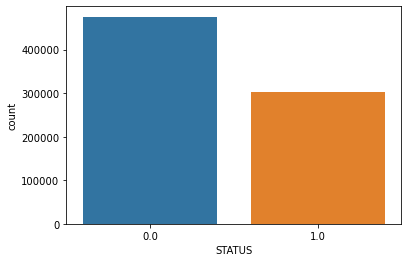

In [28]:
# plotting the STATUS variable-wise

sns.countplot( x='STATUS', data = Merged_Data )

In [29]:
# Finding a correlation between all Categorical (object) & Numerical (int) variables

Merged_Data.select_dtypes(['object' , 'int']).corr()

,ID,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
ID,1.000000,-0.000975,0.012471,0.005945,NaN,-0.028395,-0.018008,0.031396
CNT_CHILDREN,-0.000975,1.000000,0.353946,-0.233515,NaN,0.040684,-0.025969,0.020543
DAYS_BIRTH,0.012471,0.353946,1.000000,-0.611832,NaN,0.176837,-0.031062,0.099503
DAYS_EMPLOYED,0.005945,-0.233515,-0.611832,1.000000,NaN,-0.239588,-0.007196,-0.078862
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,-0.028395,0.040684,0.176837,-0.239588,NaN,1.000000,0.304741,-0.047469
FLAG_PHONE,-0.018008,-0.025969,-0.031062,-0.007196,NaN,0.304741,1.000000,0.006507
FLAG_EMAIL,0.031396,0.020543,0.099503,-0.078862,NaN,-0.047469,0.006507,1.000000


In [30]:
# Converting the  float64 datatype to int 

Merged_Data['CNT_FAM_MEMBERS'] = Merged_Data['CNT_FAM_MEMBERS'].astype(int)
Merged_Data['AMT_INCOME_TOTAL'] = Merged_Data['AMT_INCOME_TOTAL'].astype(int)

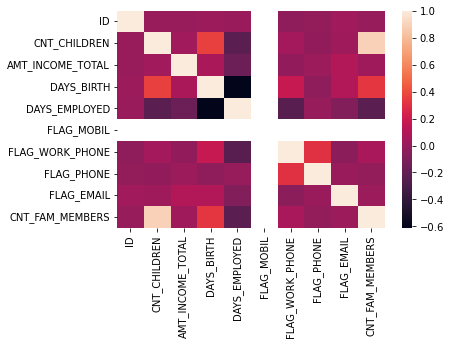

In [31]:
# HeatMap for a Visual Representation of Correlation

sns.heatmap(Merged_Data.select_dtypes(['object' , 'int']).corr())
plt.show()

# UniVariate Analysis (1 Column at a time)

In [32]:
# Doing a count for each variable/record of a column in dataset

Merged_Data['NAME_INCOME_TYPE'].value_counts()

Working                 607449
Commercial associate    275652
Pensioner               197733
State servant            98638
Student                    343
Name: NAME_INCOME_TYPE, dtype: int64

In [33]:
# Doing a count for each variable/record of a column in dataset

Merged_Data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    801305
Higher education                 321291
Incomplete higher                 43770
Lower secondary                   12332
Academic degree                    1117
Name: NAME_EDUCATION_TYPE, dtype: int64

In [34]:
# Doing a count for each variable/record of a column in dataset

Merged_Data['NAME_FAMILY_STATUS'].value_counts()

Married                 821399
Single / not married    144777
Civil marriage           93929
Separated                70403
Widow                    49307
Name: NAME_FAMILY_STATUS, dtype: int64

In [35]:
# Doing a count for each variable/record of a column in dataset

Merged_Data['NAME_HOUSING_TYPE'].value_counts()

House / apartment      1058434
With parents             53036
Municipal apartment      37726
Rented apartment         16297
Office apartment          9296
Co-op apartment           5026
Name: NAME_HOUSING_TYPE, dtype: int64

In [36]:
# Doing a count for each variable/record of a column in dataset

Merged_Data['OCCUPATION_TYPE'].value_counts()

Laborers                 203601
Core staff               116528
Sales staff              107975
Managers                 100213
Drivers                   71630
High skill tech staff     47674
Accountants               41967
Medicine staff            39004
Cooking staff             20837
Security staff            19801
Cleaning staff            16693
Private service staff      9826
Low-skill Laborers         5588
Secretaries                5042
Waiters/barmen staff       4048
HR staff                   2375
Realty agents              2222
IT staff                   1863
Name: OCCUPATION_TYPE, dtype: int64

In [37]:
# OCCUPATION_TYPE had NULL rows - so lets fill the NULL rows with "Unknown" instead of dropping it

Merged_Data["OCCUPATION_TYPE"].fillna("Unknown", inplace=True)

# at this stage only MONTHS_BALANCE and STATUS have NULL records 

# and FLAG_MOBIL have only 1 which is  == 1 

# and (FLAG_OWN_CAR & FLAG_OWN_REALTY have only Y or N values)

# DAYS_BIRTH : 
        # Count backwards from current day (0), -1 means yesterday
# DAYS_EMPLOYED : 
        # Count backwards from current day(0). If positive, it means the person currently unemployed
# MONTHS_BALANCE : 
        # The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
# STATUS : 
       # 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [38]:
# Dropping the FLAG_MOBIL as it has same value across and wont matter even if not present

Merged_Data.drop("FLAG_MOBIL",axis=1,inplace=True)

In [39]:
# Doing a count for each variable/record for "STATUS" column in dataset

Merged_Data['STATUS'].value_counts()

0.0    475486
1.0    302229
Name: STATUS, dtype: int64

In [40]:
# Creating a Formulae for "STATUS" column to bucket minimum number of records say 2,3,4 in 1 bucket and all othere in another

def func_status(input_string):
    if input_string == "C":
        return 0
    elif input_string == "X":
        return 0
    elif input_string == '0':
        return 1
    elif input_string == '1':
        return 1
    elif input_string == '2':
        return 1
    elif input_string == '3':
        return 1
    elif input_string == '4':
        return 1
    elif input_string == '5':
        return 1
    else:
        return 0

In [41]:
# applying the function to convert STATUS to 1 or 0

Merged_Data['STATUS'] = Merged_Data['STATUS'].apply(lambda input_variable:func_status(input_variable))

In [42]:
# Doing a count for each variable/record for "STATUS" column in dataset after applying the function

Merged_Data['STATUS'].value_counts()

0    1179815
Name: STATUS, dtype: int64

In [43]:
# Dropping the "MONTHS_BALANCE" as that also doesnt have much significance wrt to the business ask

Merged_Data.drop("MONTHS_BALANCE",axis=1,inplace=True)

# At this point we will have NO  NULLs

In [44]:
# Converting the Day_Birth into Age by dividing by 365

Merged_Data["AGE"] = round ( -1*(Merged_Data["DAYS_BIRTH"]/365)  )

In [45]:
# Doing a count for new derived column "AGE"

Merged_Data['AGE'].value_counts()

39.0    39731
40.0    38161
41.0    36818
42.0    35140
37.0    34794
44.0    34478
34.0    33905
33.0    33432
38.0    33159
28.0    33120
32.0    32744
30.0    32736
35.0    32430
36.0    31682
29.0    31607
43.0    31574
45.0    30027
31.0    29497
51.0    29277
52.0    28837
46.0    28360
49.0    28051
47.0    27707
54.0    27669
55.0    26628
48.0    26320
50.0    26290
59.0    26191
57.0    25926
53.0    25602
60.0    25171
27.0    25108
56.0    23554
58.0    23503
61.0    23048
62.0    20875
64.0    18623
63.0    18589
65.0    14972
26.0    13293
25.0    11296
66.0     7319
24.0     6301
67.0     5756
23.0     5482
68.0     3088
22.0     1528
69.0      334
21.0       82
Name: AGE, dtype: int64

======== Unique Values ========
49


(array([ 24689., 135864., 162008., 177527., 138010., 140465., 137675.,
        125802., 106306.,  31469.]),
 array([21. , 25.8, 30.6, 35.4, 40.2, 45. , 49.8, 54.6, 59.4, 64.2, 69. ]),
 <BarContainer object of 10 artists>)

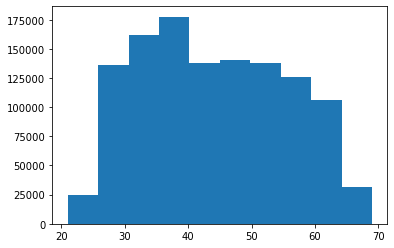

In [46]:
# Plotting a visual graph of the "AGE" column

print('======== Unique Values ========')
print(Merged_Data['AGE'].nunique())
print('========')
plt.hist(Merged_Data["AGE"])

In [47]:
# Converting the DAYS_EMPLOYED into Work_Exp by dividing by 365

Merged_Data["Work_Exp"] = round(Merged_Data["DAYS_EMPLOYED"]/365)

In [48]:
# Doing a count for new derived column "Work_Exp"

Merged_Data['Work_Exp'].value_counts()

 1001.0    197166
-1.0       103472
-2.0        92428
-3.0        89097
-4.0        84977
-5.0        76165
-6.0        68080
-7.0        65339
-8.0        58529
-9.0        50288
-10.0       40663
-11.0       31471
-0.0        28601
-12.0       25318
-13.0       23511
-15.0       22836
-14.0       17908
-16.0       11078
-17.0       10573
-20.0       10429
-19.0        8673
-18.0        8603
-21.0        7104
-22.0        6691
-23.0        5445
-24.0        4825
-27.0        3980
-25.0        3935
-28.0        3804
-26.0        3619
-29.0        2243
-30.0        2078
-33.0        1841
-31.0        1591
-32.0        1569
-34.0        1155
-41.0        1147
-35.0         946
-36.0         747
-40.0         579
-38.0         412
-37.0         358
-39.0         239
-43.0         189
-42.0          66
-44.0          20
-45.0          20
-48.0           6
-46.0           1
Name: Work_Exp, dtype: int64

======== Unique Values ========
49


(array([982649.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 197166.]),
 array([ -48. ,   56.9,  161.8,  266.7,  371.6,  476.5,  581.4,  686.3,
         791.2,  896.1, 1001. ]),
 <BarContainer object of 10 artists>)

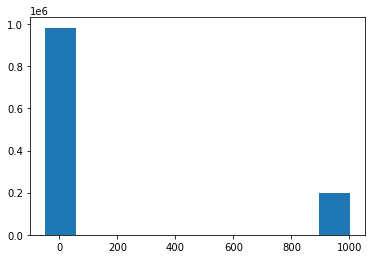

In [49]:
# Plotting a visual graph of the "Work_Exp" column

print('======== Unique Values ========')
print(Merged_Data['Work_Exp'].nunique())
print('========')
plt.hist(Merged_Data["Work_Exp"])

In [50]:
print(Merged_Data.head(5))
print(Merged_Data.dtypes)

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0            427500          Working    Higher education     Civil marriage   
1            427500          Working    Higher education     Civil marriage   
2            427500          Working    Higher education     Civil marriage   
3            427500          Working    Higher education     Civil marriage   
4            427500          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  FLAG_PHONE  \
0  Rented apartment      -12005

# Merging based on INNER  JOIN (using "ID") - Direct (as it is)

In [51]:
# Count of unique records in both application and credit dataset

print(credit_record['ID'].nunique())
print(application_record['ID'].nunique())

45985
438510


# Observation

# We have 438K records for Application Dataset and 45k Records for Credit Dataset
# So if we join using Outer Join - lot of Missing rows would be there
# Even Credit Dataset has multiple records for each Applicant/Customer ID - so direct Join would lead to Redundant Data
# But still we will join and see

In [52]:
# Importing the file to Python

application_record = pd.read_csv("application_record.csv")
credit_record = pd.read_csv("credit_record.csv")

In [53]:
# Dimension of application dataset

application_record.shape

(438557, 18)

In [54]:
# Unique values column-wise of application dataset

application_record.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [55]:
# Dimension of credit dataset

credit_record.shape

(1048575, 3)

Observations

    There are many duplicate rows in application_record.csv.
    They have the same values in rows except ID.
    In this approach we will keep these duplicate records.
    In OCCUPATION_TYPE there is 134203 missing values. We will treat it later.



In [56]:
# Merging both the data set  - based on INNER JOIN 

Merged_Data_Inner =  pd.merge(application_record, credit_record, how='inner', on='ID') 

In [57]:
Merged_Data_Inner.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [58]:
# checking Dimensions of merged dataset

Merged_Data_Inner.shape

(777715, 20)

In [59]:
# checking if any duplicates

Merged_Data_Inner[Merged_Data_Inner.duplicated()].shape

(0, 20)

In [60]:
# checking unique counts column-wise

Merged_Data_Inner.nunique()

ID                     36457
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS           10
MONTHS_BALANCE            61
STATUS                     8
dtype: int64

In [61]:
# checking the null column wise

Merged_Data_Inner.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [62]:
# Generate statistical summary of the continuous and discrete variables of the dataset and transpose it

Merged_Data_Inner.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,777715.0,NaN,NaN,NaN,5078742.947329,41804.424817,5008804.0,5044568.5,5069530.0,5115551.0,5150487.0
CODE_GENDER,777715,2,F,518851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,777715,2,N,473355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,777715,2,Y,512948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,777715.0,NaN,NaN,NaN,0.428082,0.745755,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,777715.0,NaN,NaN,NaN,188534.802074,101622.450076,27000.0,121500.0,162000.0,225000.0,1575000.0
NAME_INCOME_TYPE,777715,5,Working,400164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAME_EDUCATION_TYPE,777715,5,Secondary / secondary special,524261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAME_FAMILY_STATUS,777715,5,Married,546619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAME_HOUSING_TYPE,777715,6,House / apartment,697151,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Retrieve the frequency of the status variable after merging the datasets.

Merged_Data_Inner.STATUS.value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [64]:
# Creating a Formulae for "STATUS" column to bucket minimum number of records say 2,3,4 in 1 bucket and all othere in another

def func_status(input_string):
    if input_string == "C":
        return 0
    elif input_string == "X":
        return 0
    elif input_string == '0':
        return 0
    elif input_string == '1':
        return 1
    elif input_string == '2':
        return 1
    elif input_string == '3':
        return 1
    elif input_string == '4':
        return 1
    elif input_string == '5':
        return 1
    else:
        return 0

In [65]:
# Need to remove other values of status variable and required to keep on '0's and '1's.
# Any value in the status variable that is equal to 2 and above will be converted to '1's and below 2 will be converted to '0's.
# '0's means - Good Customers
# '1's means - Bad Customers

# applying the function to convert STATUS to 1 or 0

Merged_Data_Inner['STATUS'] = Merged_Data_Inner['STATUS'].apply(lambda input_variable:func_status(input_variable))

In [66]:
# Retrieve the frequency of the status variable after merging the datasets and converting to 0 (Good) or 1 (bad customer)

Merged_Data_Inner.STATUS.value_counts()

0    766140
1     11575
Name: STATUS, dtype: int64

In [67]:
# Print the rejection rate

print('There are ' + str(Merged_Data_Inner.STATUS.sum()) + ' Rejected Applicants.\n', 
      str(round(Merged_Data_Inner.STATUS.sum() / len(Merged_Data_Inner) * 100, 2)) + '% in ' + str(len(Merged_Data_Inner)) +  ' Total Applicants.')

There are 11575 Rejected Applicants.
 1.49% in 777715 Total Applicants.


In [68]:
# Checking the data types of the Data Set

Merged_Data_Inner.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
MONTHS_BALANCE           int64
STATUS                   int64
dtype: object

# Merging based on INNER JOIN (using "ID") - But Now Taking Max / Agg of Credit Data Based on each (Applicant "ID")

In [69]:
# Importing the file to Python

application_record = pd.read_csv("application_record.csv")
credit_record = pd.read_csv("credit_record.csv")

In [70]:
# applying the function 

credit_record['STATUS'] = credit_record['STATUS'].apply(lambda input_variable:func_status(input_variable))

In [71]:
# checking now the STATUS should have only 2 records

credit_record.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                2
dtype: int64

In [72]:
print(credit_record.head(2))
print(credit_record.shape)

        ID  MONTHS_BALANCE  STATUS
0  5001711               0       0
1  5001711              -1       0
(1048575, 3)


In [73]:
credit_record = credit_record.groupby('ID').STATUS.max()

In [74]:
print(credit_record.head(2))
print("----")
print(credit_record.shape)
print("----")
print(credit_record.value_counts())
print("----")

ID
5001711    0
5001712    0
Name: STATUS, dtype: int64
----
(45985,)
----
0    40635
1     5350
Name: STATUS, dtype: int64
----


In [75]:
# Merging the datasets

Merged_Data_Inner_on_Max_Credit_ID =  pd.merge(application_record, credit_record, how='inner', on='ID') 

In [76]:
# checking the current Dimension

print("-----")
print("Dimension of the Merged Data")
print(Merged_Data_Inner_on_Max_Credit_ID.shape)

print("-----")
print("Missing values Column-Wise of the Merged Data")
print(Merged_Data_Inner_on_Max_Credit_ID.isnull().sum())

print("-----")
print("Unique count Column-Wise of the Merged Data")
print(Merged_Data_Inner_on_Max_Credit_ID.nunique())

print("-----")
print("Duplicates of the Merged Data")
print(Merged_Data_Inner_on_Max_Credit_ID[Merged_Data_Inner_on_Max_Credit_ID.duplicated()].shape)
print("-----")
print("Details of the Merged Data")
print(Merged_Data_Inner_on_Max_Credit_ID.dtypes)

print("-----")

-----
Dimension of the Merged Data
(36457, 19)
-----
Missing values Column-Wise of the Merged Data
ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
STATUS                     0
dtype: int64
-----
Unique count Column-Wise of the Merged Data
ID                     36457
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE         

In [77]:
# Retrieve the frequency of the status variable after converting to '1's and '0's  in the Merged DataSet

Merged_Data_Inner_on_Max_Credit_ID.STATUS.value_counts()

0    32166
1     4291
Name: STATUS, dtype: int64

In [78]:
# Print the rejection rate of the Applicants

print('There are ' + str(Merged_Data_Inner_on_Max_Credit_ID.STATUS.sum()) + ' Rejected Applicants.\n', 
str(round(Merged_Data_Inner_on_Max_Credit_ID.STATUS.sum() / len(Merged_Data_Inner_on_Max_Credit_ID) * 100, 2)) + '% in ' + str(len(Merged_Data_Inner_on_Max_Credit_ID)) + ' applicants.')

There are 4291 Rejected Applicants.
 11.77% in 36457 applicants.


# Exploratory data analysis - EDA

There are 7 binary features in a dataset 'Merged_Data_Inner_on_Max_Credit_ID':-

    Gender
    Car
    Realty
    Mobile
    Work Phone
    Phone
    Email

Note:-

    Since every applicant has same value if a mobile phone, therefore, we will drop the entire column of 'flag_mobil'.



# Plotting a Cross tab for the "flag_mobil" column against the Status 

In [79]:
# Reason for dropping 'flag_mobil' column

pd.crosstab(Merged_Data_Inner_on_Max_Credit_ID['FLAG_MOBIL'], Merged_Data_Inner_on_Max_Credit_ID['STATUS'], margins = True)

STATUS,0,1,All
FLAG_MOBIL,,,
1,32166,4291,36457
All,32166,4291,36457


In [80]:
# Drop the 'flag_mobil' variable

Merged_Data_Inner_on_Max_Credit_ID = Merged_Data_Inner_on_Max_Credit_ID.drop(['FLAG_MOBIL'], axis = 1)
Merged_Data_Inner_on_Max_Credit_ID.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0


In [81]:
Merged_Data_Inner_on_Max_Credit_ID.shape

(36457, 18)

In [82]:
# Rename Columns

Merged_Data_Inner_on_Max_Credit_ID = Merged_Data_Inner_on_Max_Credit_ID.rename(columns={'CODE_GENDER' : 'gender', 
                                'FLAG_OWN_CAR' : 'own_car', 'FLAG_OWN_REALTY' : 'own_property',
                                'CNT_CHILDREN' : 'kids', 'AMT_INCOME_TOTAL' : 'total_income', 
                                'NAME_INCOME_TYPE' : 'income_type', 'NAME_EDUCATION_TYPE' : 'education',
                                'NAME_FAMILY_STATUS' : 'marital_status', 'NAME_HOUSING_TYPE' : 'house_type', 
                                'DAYS_BIRTH' : 'dob', 'DAYS_EMPLOYED' : 'work_exp', 'FLAG_WORK_PHONE' : 'work_phone',
                                'FLAG_PHONE' : 'phone', 'FLAG_EMAIL' : 'email', 'OCCUPATION_TYPE' : 'occupation',
                                'CNT_FAM_MEMBERS' : 'family_members', 'STATUS' : 'status'})

Merged_Data_Inner_on_Max_Credit_ID.head()

,ID,gender,own_car,own_property,kids,total_income,income_type,education,marital_status,house_type,dob,work_exp,work_phone,phone,email,occupation,family_members,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0


# Individual Column Analysis & Crosstab with Status (Gender)

In [83]:
print( Merged_Data_Inner_on_Max_Credit_ID.gender.value_counts() )
pd.crosstab(Merged_Data_Inner_on_Max_Credit_ID['gender'], Merged_Data_Inner_on_Max_Credit_ID['status'], margins = True)

F    24430
M    12027
Name: gender, dtype: int64


status,0,1,All
gender,,,
F,21672,2758,24430
M,10494,1533,12027
All,32166,4291,36457


In [84]:
# Another way to Represent the same thing as above - Gender based on Status 

Merged_Data_Inner_on_Max_Credit_ID.groupby(["gender", 'status'])["status"].count()

gender  status
F       0         21672
        1          2758
M       0         10494
        1          1533
Name: status, dtype: int64

In [85]:
# Genderwise rejection break-up

gender_rej_percent = (Merged_Data_Inner_on_Max_Credit_ID.groupby('gender')['status']
           .value_counts(normalize = True)
           .reset_index(name = 'perc'))

gender_rej_percent

,gender,status,perc
0,F,0,0.887106
1,F,1,0.112894
2,M,0,0.872537
3,M,1,0.127463


In [86]:
# Another way to show the above split each seperate variable wise - Gender Based on Status


print ( 'Total Male With Status == 1 (Bad/Rejected) : '  +  str(Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 1].loc[Merged_Data_Inner_on_Max_Credit_ID.gender == 'M'].shape[0]  ) )
print ( 'Total Female With Status == 1 (Bad/Rejected) : '  +  str(Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 1].loc[Merged_Data_Inner_on_Max_Credit_ID.gender == 'F'].shape[0]  ) )
print ( 'Total Male With Status == 0 (Good/On Time) : '  +  str(Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 0].loc[Merged_Data_Inner_on_Max_Credit_ID.gender == 'M'].shape[0]  ) )
print ( 'Total Female With Status == 0 (Good/On Time) : '  +  str(Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 0].loc[Merged_Data_Inner_on_Max_Credit_ID.gender == 'F'].shape[0]  ) )


Total Male With Status == 1 (Bad/Rejected) : 1533
Total Female With Status == 1 (Bad/Rejected) : 2758
Total Male With Status == 0 (Good/On Time) : 10494
Total Female With Status == 0 (Good/On Time) : 21672


In [87]:
# Printing Stats of Gender vs Status of Rejections & Rejection %

m_bad = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 1].loc[Merged_Data_Inner_on_Max_Credit_ID.gender == 'M'].shape[0]
f_bad = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 1].loc[Merged_Data_Inner_on_Max_Credit_ID.gender == 'F'].shape[0]
m_good = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 0].loc[Merged_Data_Inner_on_Max_Credit_ID.gender == 'M'].shape[0]
f_good = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 0].loc[Merged_Data_Inner_on_Max_Credit_ID.gender == 'F'].shape[0]
total_bad_pctg = ( (m_bad+f_bad) / (m_bad+m_good+f_bad+f_good)   ) *100
m_bad_pctg = ( (m_bad) / (m_bad+f_bad)   )*100
f_bad_pctg = ( (f_bad) / (m_bad+f_bad)   )*100
m_bad_pctg_in_total = (m_bad)/(m_bad+m_good+f_bad+f_good)*100
f_bad_pctg_in_total = (f_bad)/(m_bad+m_good+f_bad+f_good)*100


print('Total Application : ' + str(m_bad+m_good+f_bad+f_good) )
print('Total Rejections : ' + str(m_bad+f_bad) )
print('Total Rejections % : ' + str(   (    (m_bad+f_bad) / (m_bad+m_good+f_bad+f_good)   )*100    ) )
print('Total Male Rejection : ' + str(m_bad) )
print('Total Female Rejection : ' + str(f_bad) )
print('Total Male Rejection %  out of Total Rejections : ' + str(   (m_bad)/(m_bad+f_bad)*100   )     )
print('Total Male Rejection %  out of Total Application : ' + str(   (m_bad)/(m_bad+m_good+f_bad+f_good)*100   )     )
print('Total Female Rejection %  out of Total Rejections : ' + str(   (f_bad)/(m_bad+f_bad)*100   )     )
print('Total Female Rejection %  out of Total Application : ' + str(   (f_bad)/(m_bad+m_good+f_bad+f_good)*100   )     )


Total Application : 36457
Total Rejections : 4291
Total Rejections % : 11.77003044682777
Total Male Rejection : 1533
Total Female Rejection : 2758
Total Male Rejection %  out of Total Rejections : 35.725938009787924
Total Male Rejection %  out of Total Application : 4.2049537811668545
Total Female Rejection %  out of Total Rejections : 64.27406199021208
Total Female Rejection %  out of Total Application : 7.565076665660915


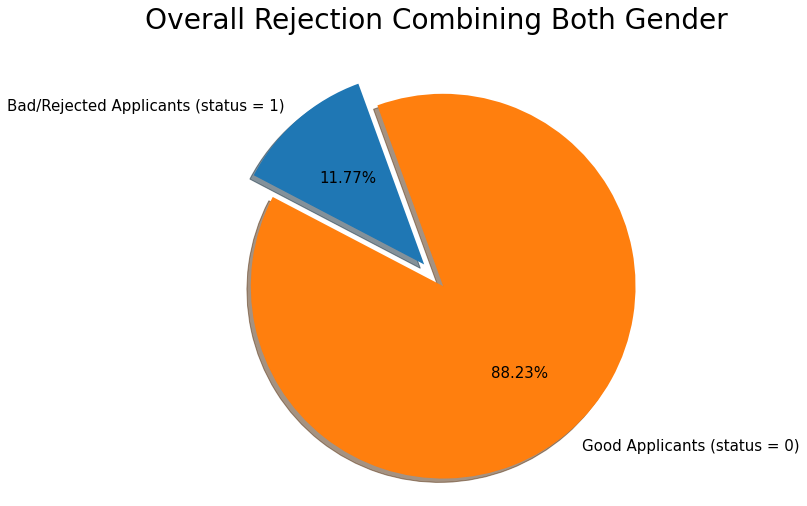

In [88]:
# Plotting a Pie Chart of Gender Analysis of Rejction % - STATUS wise

x = ['Bad/Rejected Applicants (status = 1)', 'Good Applicants (status = 0)']
y = [total_bad_pctg, 100-total_bad_pctg]
explode = (0.15, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode, labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Overall Rejection Combining Both Gender', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

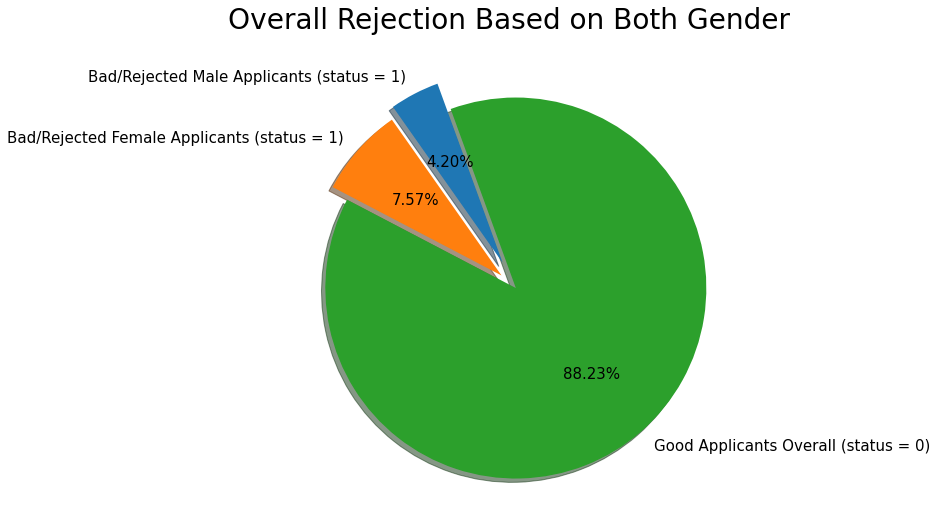

In [89]:
# Plotting a Pie Chart of Gender Analysis of Rejction % - STATUS wise

x = ['Bad/Rejected Male Applicants (status = 1)','Bad/Rejected Female Applicants (status = 1)','Good Applicants Overall (status = 0)']
y = [m_bad_pctg_in_total, f_bad_pctg_in_total , 100-(m_bad_pctg_in_total + f_bad_pctg_in_total)]
explode = (0.15, 0.10, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y,  explode = explode,  labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Overall Rejection Based on Both Gender', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

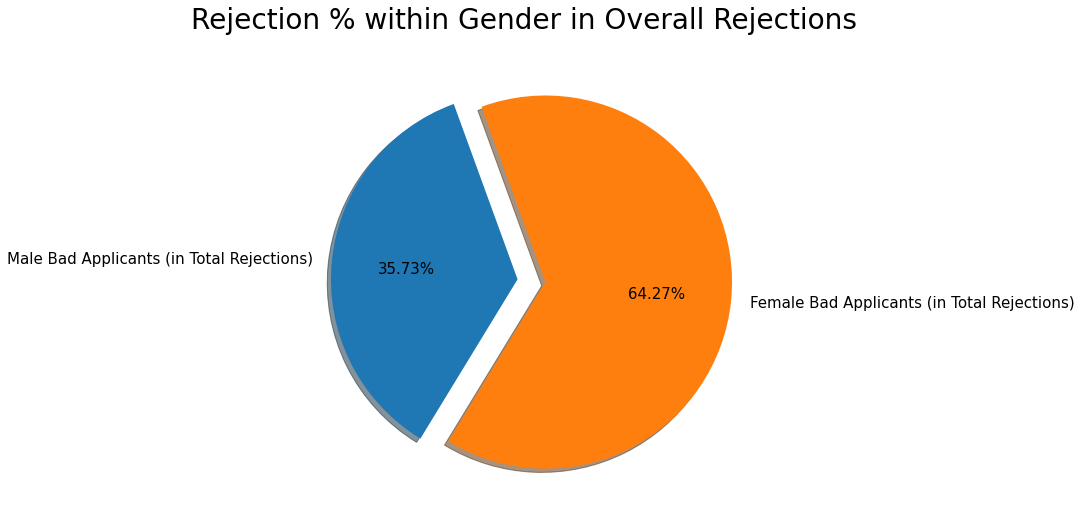

In [90]:
# Plotting a Pie Chart of Gender Analysis of Rejction % - STATUS wise

x = ['Male Bad Applicants (in Total Rejections)', 'Female Bad Applicants (in Total Rejections)']
y = [m_bad_pctg,  100-m_bad_pctg]
explode = (0.15, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode, labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Rejection % within Gender in Overall Rejections', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

In [91]:
# Genderwise rejection break-up

gender_rej_perc = (Merged_Data_Inner_on_Max_Credit_ID.groupby('gender')['status']
           .value_counts(normalize = True)
           .reset_index(name = 'Percent-%'))
gender_rej_perc

,gender,status,Percent-%
0,F,0,0.887106
1,F,1,0.112894
2,M,0,0.872537
3,M,1,0.127463


# Individual Column Analysis & Crosstab with Status (Own Car)

In [92]:
print( Merged_Data_Inner_on_Max_Credit_ID.own_car.value_counts() )
pd.crosstab(Merged_Data_Inner_on_Max_Credit_ID['own_car'], Merged_Data_Inner_on_Max_Credit_ID['status'], margins = True)

N    22614
Y    13843
Name: own_car, dtype: int64


status,0,1,All
own_car,,,
N,19892,2722,22614
Y,12274,1569,13843
All,32166,4291,36457


In [93]:
# Printing Stats of Gender vs Status of Rejections & Rejection %

cy_bad = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 1].loc[Merged_Data_Inner_on_Max_Credit_ID.own_car == 'Y'].shape[0]
cn_bad = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 1].loc[Merged_Data_Inner_on_Max_Credit_ID.own_car == 'N'].shape[0]
cy_good = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 0].loc[Merged_Data_Inner_on_Max_Credit_ID.own_car == 'Y'].shape[0]
cn_good = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 0].loc[Merged_Data_Inner_on_Max_Credit_ID.own_car == 'N'].shape[0]
total_bad_pctg = ( (cy_bad+cn_bad) / (cy_bad+cy_good+cn_bad+cn_good)   ) *100
cy_bad_pctg = ( (cy_bad) / (cy_bad+cn_bad)   )*100
cn_bad_pctg = ( (cn_bad) / (cy_bad+cn_bad)   )*100
cy_bad_pctg_in_total = (cy_bad)/(cy_bad+cy_good+cn_bad+cn_good)*100
cn_bad_pctg_in_total = (cn_bad)/(cy_bad+cy_good+cn_bad+cn_good)*100


print('Total Application : ' + str(cy_bad+cy_good+cn_bad+cn_good) )
print('Total Rejections : ' + str(cy_bad+cn_bad) )
print('Total Rejections % : ' + str(   (    (cy_bad+cn_bad) / (cy_bad+cy_good+cn_bad+cn_good)   )*100    ) )
print('Total Car=Yes Rejection : ' + str(cy_bad) )
print('Total Car=No Rejection : ' + str(cn_bad) )
print('Total Car=Yes Rejection %  out of Total Rejections : ' + str(   (cy_bad)/(cy_bad+cn_bad)*100   )     )
print('Total Car=Yes Rejection %  out of Total Application : ' + str(   (cy_bad)/(cy_bad+cy_good+cn_bad+cn_good)*100   )     )
print('Total Car=No Rejection %  out of Total Rejections : ' + str(   (cn_bad)/(cy_bad+cn_bad)*100   )     )
print('Total Car=No Rejection %  out of Total Application : ' + str(   (cn_bad)/(cy_bad+cy_good+cn_bad+cn_good)*100   )     )


Total Application : 36457
Total Rejections : 4291
Total Rejections % : 11.77003044682777
Total Car=Yes Rejection : 1569
Total Car=No Rejection : 2722
Total Car=Yes Rejection %  out of Total Rejections : 36.56490328594733
Total Car=Yes Rejection %  out of Total Application : 4.303700249609128
Total Car=No Rejection %  out of Total Rejections : 63.43509671405266
Total Car=No Rejection %  out of Total Application : 7.4663301972186416


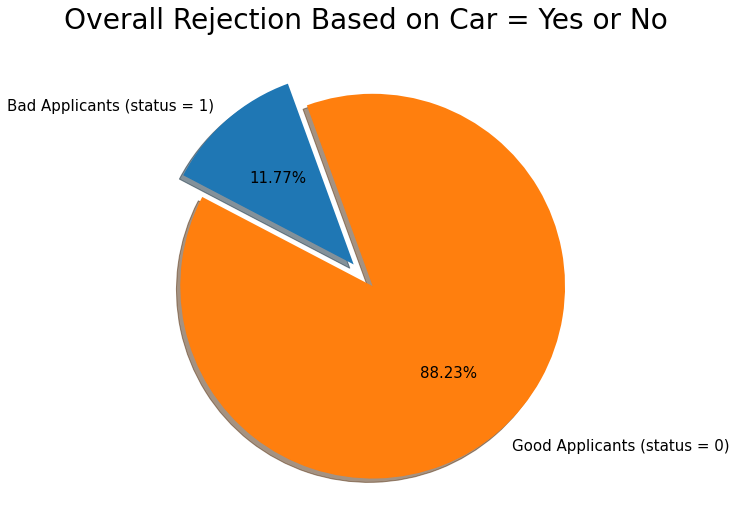

In [94]:
# Plotting a Pie Chart of Car Analysis of Rejction % - STATUS wise

x = ['Bad Applicants (status = 1)', 'Good Applicants (status = 0)']
y = [total_bad_pctg, 100-total_bad_pctg]
explode = (0.15, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode, labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Overall Rejection Based on Car = Yes or No', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

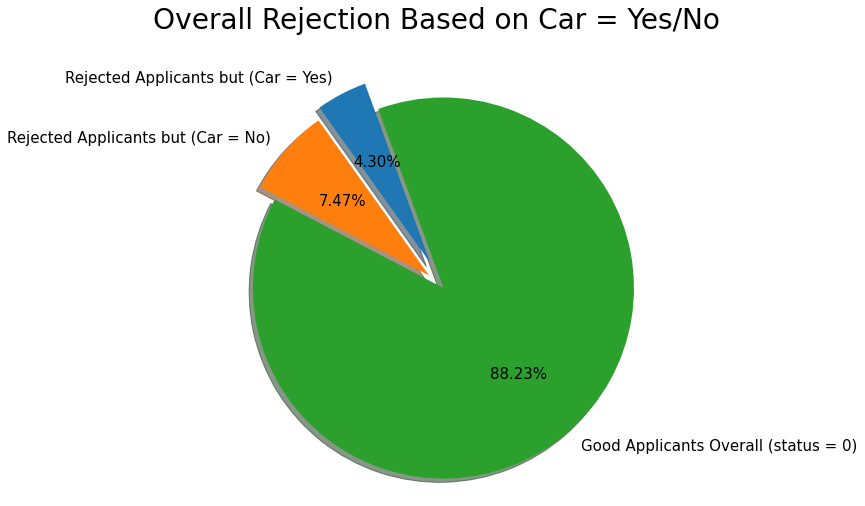

In [95]:
# Plotting a Pie Chart of Car Analysis of Rejction % - STATUS wise

x = ['Rejected Applicants but (Car = Yes)','Rejected Applicants but (Car = No)','Good Applicants Overall (status = 0)']
y = [cy_bad_pctg_in_total, cn_bad_pctg_in_total , 100-(cy_bad_pctg_in_total + cn_bad_pctg_in_total)]
explode = (0.15, 0.10, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode,   labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Overall Rejection Based on Car = Yes/No', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

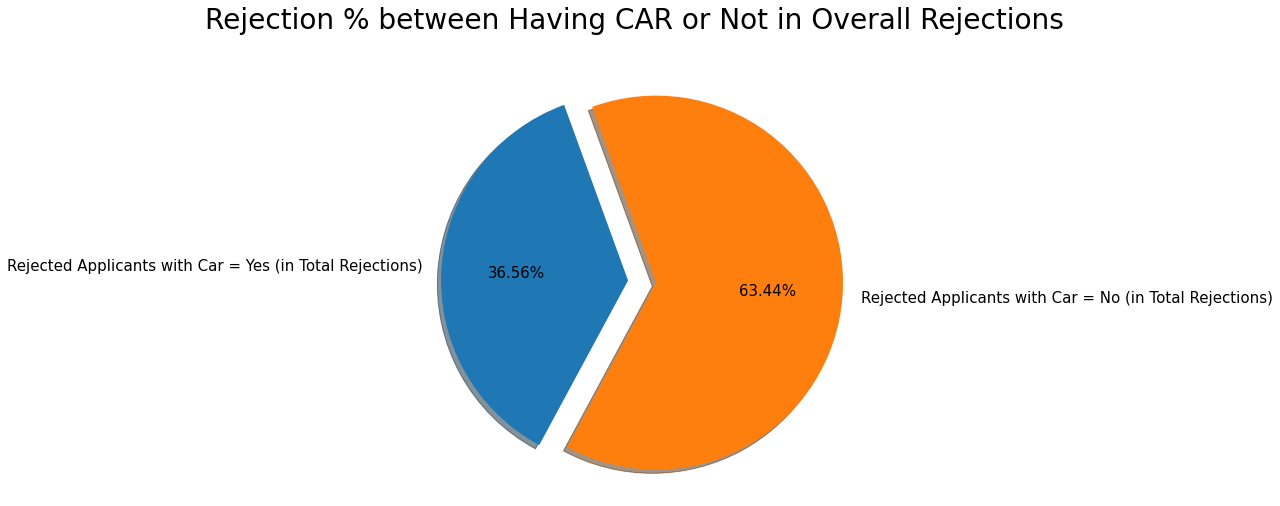

In [96]:
# Plotting a Pie Chart of Car Analysis of Rejection % - STATUS wise

x = ['Rejected Applicants with Car = Yes (in Total Rejections)', 'Rejected Applicants with Car = No (in Total Rejections)']
y = [cy_bad_pctg,  100-cy_bad_pctg]
explode = (0.15, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode, labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Rejection % between Having CAR or Not in Overall Rejections', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

# Individual Column Analysis & Crosstab with Status (Realty - Having Own Property or Not)

In [97]:
# Individual Column Analysis & Crosstab with Status (Own Car)

print( Merged_Data_Inner_on_Max_Credit_ID.own_property.value_counts() )
pd.crosstab(Merged_Data_Inner_on_Max_Credit_ID['own_property'], Merged_Data_Inner_on_Max_Credit_ID['status'], margins = True)

Y    24506
N    11951
Name: own_property, dtype: int64


status,0,1,All
own_property,,,
N,10390,1561,11951
Y,21776,2730,24506
All,32166,4291,36457


In [98]:
# Printing Stats of Gender vs Status of Rejections & Rejection %

ownprop_y_bad = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 1].loc[Merged_Data_Inner_on_Max_Credit_ID.own_property == 'Y'].shape[0]
ownprop_n_bad = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 1].loc[Merged_Data_Inner_on_Max_Credit_ID.own_property == 'N'].shape[0]
ownprop_y_good = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 0].loc[Merged_Data_Inner_on_Max_Credit_ID.own_property == 'Y'].shape[0]
ownprop_n_good = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 0].loc[Merged_Data_Inner_on_Max_Credit_ID.own_property == 'N'].shape[0]
total_bad_pctg = ( (ownprop_y_bad+ownprop_n_bad) / (ownprop_y_bad+ownprop_y_good+ownprop_n_bad+ownprop_n_good)   ) *100
ownprop_y_bad_pctg = ( (ownprop_y_bad) / (ownprop_y_bad+ownprop_n_bad)   )*100
ownprop_n_bad_pctg = ( (ownprop_n_bad) / (ownprop_y_bad+ownprop_n_bad)   )*100
ownprop_y_bad_pctg_in_total = (ownprop_y_bad)/(ownprop_y_bad+ownprop_y_good+ownprop_n_bad+ownprop_n_good)*100
ownprop_n_bad_pctg_in_total = (ownprop_n_bad)/(ownprop_y_bad+ownprop_y_good+ownprop_n_bad+ownprop_n_good)*100


print('Total Application : ' + str(ownprop_y_bad+ownprop_y_good+ownprop_n_bad+ownprop_n_good) )
print('Total Rejections : ' + str(ownprop_y_bad+ownprop_n_bad) )
print('Total Rejections % : ' + str(   (    (ownprop_y_bad+ownprop_n_bad) / (ownprop_y_bad+ownprop_y_good+ownprop_n_bad+ownprop_n_good)   )*100    ) )
print('Total Own Property=Yes Rejection : ' + str(ownprop_y_bad) )
print('Total Own Property=No Rejection : ' + str(ownprop_n_bad) )
print('Total Own Property=Yes Rejection %  out of Total Rejections : ' + str(   (ownprop_y_bad)/(ownprop_y_bad+ownprop_n_bad)*100   )     )
print('Total Own Property=Yes Rejection %  out of Total Application : ' + str(   (ownprop_y_bad)/(ownprop_y_bad+ownprop_y_good+ownprop_n_bad+ownprop_n_good)*100   )     )
print('Total Own Property=No Rejection %  out of Total Rejections : ' + str(   (ownprop_n_bad)/(ownprop_y_bad+ownprop_n_bad)*100   )     )
print('Total Own Property=No Rejection %  out of Total Application : ' + str(   (ownprop_n_bad)/(ownprop_y_bad+ownprop_y_good+ownprop_n_bad+ownprop_n_good)*100   )     )

Total Application : 36457
Total Rejections : 4291
Total Rejections % : 11.77003044682777
Total Own Property=Yes Rejection : 2730
Total Own Property=No Rejection : 1561
Total Own Property=Yes Rejection %  out of Total Rejections : 63.621533442088094
Total Own Property=Yes Rejection %  out of Total Application : 7.488273856872479
Total Own Property=No Rejection %  out of Total Rejections : 36.378466557911906
Total Own Property=No Rejection %  out of Total Application : 4.28175658995529


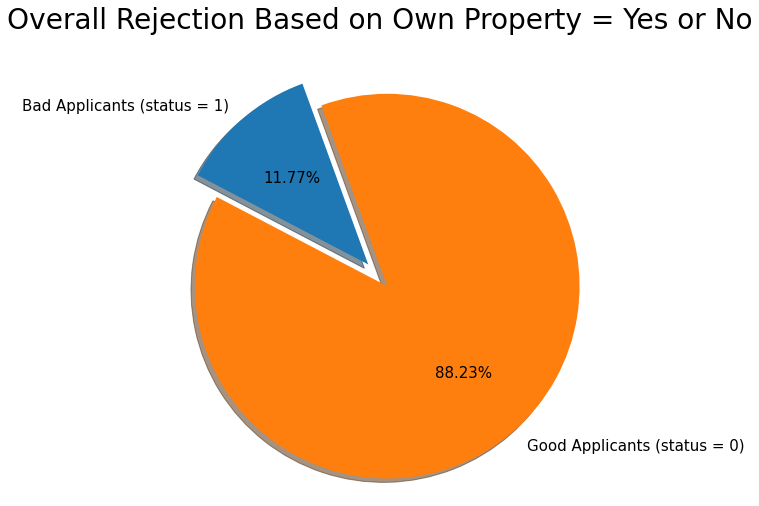

In [99]:
# Plotting a Pie Chart of Car Analysis of Rejction % - STATUS wise

x = ['Bad Applicants (status = 1)', 'Good Applicants (status = 0)']
y = [total_bad_pctg, 100-total_bad_pctg]
explode = (0.15, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode, labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Overall Rejection Based on Own Property = Yes or No', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

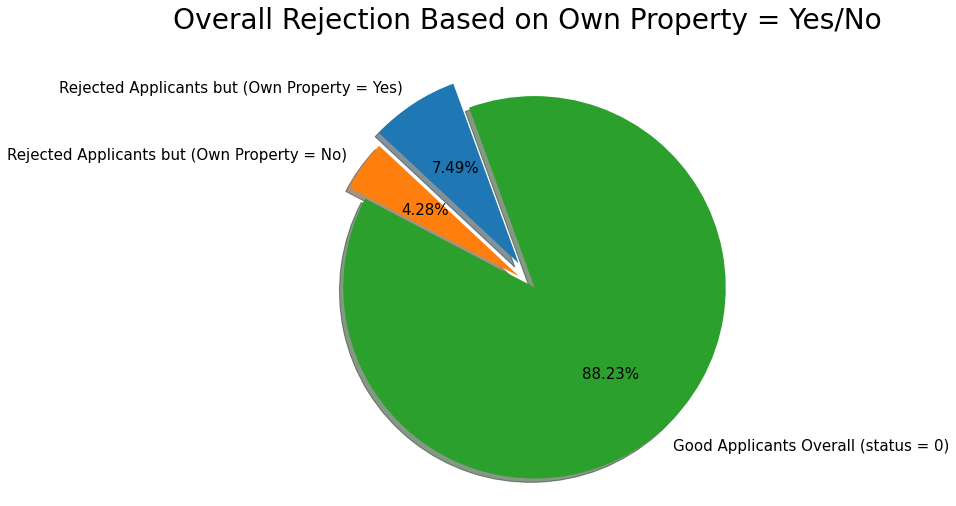

In [100]:
# Plotting a Pie Chart of Car Analysis of Rejction % - STATUS wise

x = ['Rejected Applicants but (Own Property = Yes)','Rejected Applicants but (Own Property = No)','Good Applicants Overall (status = 0)']
y = [ownprop_y_bad_pctg_in_total, ownprop_n_bad_pctg_in_total , 100-(ownprop_y_bad_pctg_in_total + ownprop_n_bad_pctg_in_total)]
explode = (0.15, 0.10, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode,   labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Overall Rejection Based on Own Property = Yes/No', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

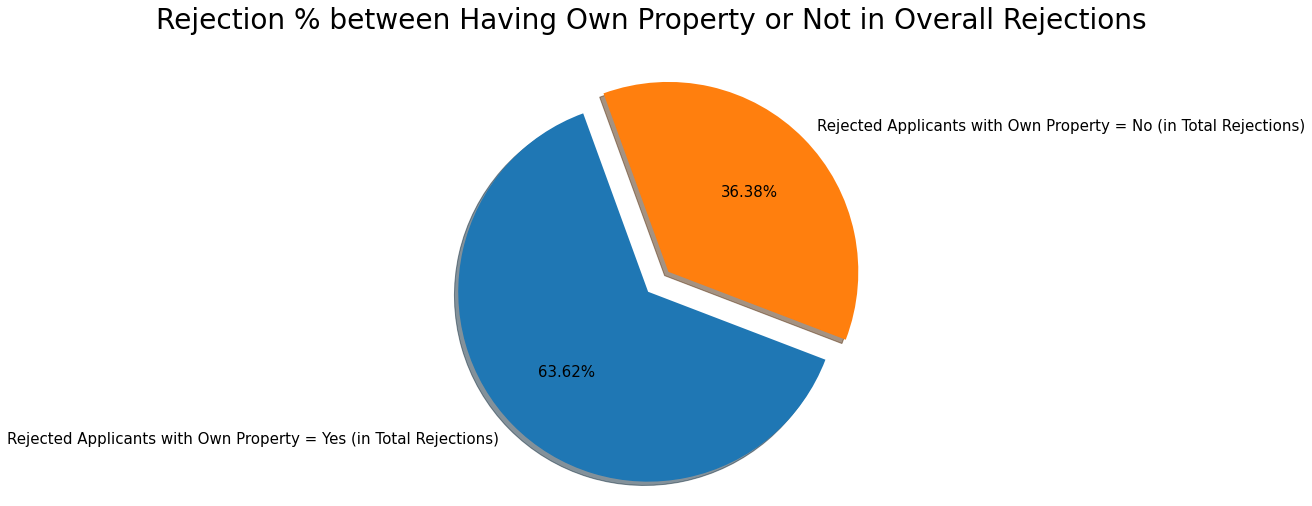

In [101]:
# Plotting a Pie Chart of Car Analysis of Rejection % - STATUS wise

x = ['Rejected Applicants with Own Property = Yes (in Total Rejections)', 'Rejected Applicants with Own Property = No (in Total Rejections)']
y = [ownprop_y_bad_pctg,  100-ownprop_y_bad_pctg]
explode = (0.15, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode, labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Rejection % between Having Own Property or Not in Overall Rejections', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

# Individual Column Analysis & Crosstab with Status (Work Phone)

In [102]:
Merged_Data_Inner_on_Max_Credit_ID.head(4)

,ID,gender,own_car,own_property,kids,total_income,income_type,education,marital_status,house_type,dob,work_exp,work_phone,phone,email,occupation,family_members,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0


In [103]:
# Convert the categories of 'work_phone', 'phone',  'email' variable from '1's and '0's to 'Y's and 'N's

Merged_Data_Inner_on_Max_Credit_ID['work_phone'] = Merged_Data_Inner_on_Max_Credit_ID['work_phone'].replace(1, 'Y').replace(0, 'N')
Merged_Data_Inner_on_Max_Credit_ID['phone'] = Merged_Data_Inner_on_Max_Credit_ID['phone'].replace(1, 'Y').replace(0, 'N')
Merged_Data_Inner_on_Max_Credit_ID['email'] = Merged_Data_Inner_on_Max_Credit_ID['email'].replace(1, 'Y').replace(0, 'N')
Merged_Data_Inner_on_Max_Credit_ID.head(4)

,ID,gender,own_car,own_property,kids,total_income,income_type,education,marital_status,house_type,dob,work_exp,work_phone,phone,email,occupation,family_members,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Y,N,N,NaN,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Y,N,N,NaN,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,N,N,N,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,N,Y,Y,Sales staff,1.0,0


# Individual Column Analysis & Crosstab with Status (Work Phone)

In [104]:
print( Merged_Data_Inner_on_Max_Credit_ID.work_phone.value_counts() )
pd.crosstab(Merged_Data_Inner_on_Max_Credit_ID['work_phone'], Merged_Data_Inner_on_Max_Credit_ID['status'], margins = True)

# Printing Stats of Work Phone vs Status of Rejections & Rejection %

workphone_y_bad = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 1].loc[Merged_Data_Inner_on_Max_Credit_ID.work_phone == 'Y'].shape[0]
workphone_n_bad = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 1].loc[Merged_Data_Inner_on_Max_Credit_ID.work_phone == 'N'].shape[0]
workphone_y_good = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 0].loc[Merged_Data_Inner_on_Max_Credit_ID.work_phone == 'Y'].shape[0]
workphone_n_good = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 0].loc[Merged_Data_Inner_on_Max_Credit_ID.work_phone == 'N'].shape[0]
total_bad_pctg = ( (workphone_y_bad+workphone_n_bad) / (workphone_y_bad+workphone_y_good+workphone_n_bad+workphone_n_good)   ) *100
workphone_y_bad_pctg = ( (workphone_y_bad) / (workphone_y_bad+workphone_n_bad)   )*100
workphone_n_bad_pctg = ( (workphone_n_bad) / (workphone_y_bad+workphone_n_bad)   )*100
workphone_y_bad_pctg_in_total = (workphone_y_bad)/(workphone_y_bad+workphone_y_good+workphone_n_bad+workphone_n_good)*100
workphone_n_bad_pctg_in_total = (workphone_n_bad)/(workphone_y_bad+workphone_y_good+workphone_n_bad+workphone_n_good)*100

print('Total Application : ' + str(workphone_y_bad+workphone_y_good+workphone_n_bad+workphone_n_good) )
print('Total Rejections : ' + str(workphone_y_bad+workphone_n_bad) )
print('Total Rejections % : ' + str(   (    (workphone_y_bad+workphone_n_bad) / (workphone_y_bad+workphone_y_good+workphone_n_bad+workphone_n_good)   )*100    ) )
print('Total Work Phone=Yes Rejection : ' + str(workphone_y_bad) )
print('Total Work Phone=No Rejection : ' + str(workphone_n_bad) )
print('Total Work Phone=Yes Rejection %  out of Total Rejections : ' + str(   (workphone_y_bad)/(workphone_y_bad+workphone_n_bad)*100   )     )
print('Total Work Phone=Yes Rejection %  out of Total Application : ' + str(   (workphone_y_bad)/(workphone_y_bad+workphone_y_good+workphone_n_bad+workphone_n_good)*100   )     )
print('Total Work Phone=No Rejection %  out of Total Rejections : ' + str(   (workphone_n_bad)/(workphone_y_bad+workphone_n_bad)*100   )     )
print('Total Work Phone=No Rejection %  out of Total Application : ' + str(   (workphone_n_bad)/(workphone_y_bad+workphone_y_good+workphone_n_bad+workphone_n_good)*100   )     )

N    28235
Y     8222
Name: work_phone, dtype: int64
Total Application : 36457
Total Rejections : 4291
Total Rejections % : 11.77003044682777
Total Work Phone=Yes Rejection : 967
Total Work Phone=No Rejection : 3324
Total Work Phone=Yes Rejection %  out of Total Rejections : 22.535539501281754
Total Work Phone=Yes Rejection %  out of Total Application : 2.6524398606577613
Total Work Phone=No Rejection %  out of Total Rejections : 77.46446049871824
Total Work Phone=No Rejection %  out of Total Application : 9.117590586170008


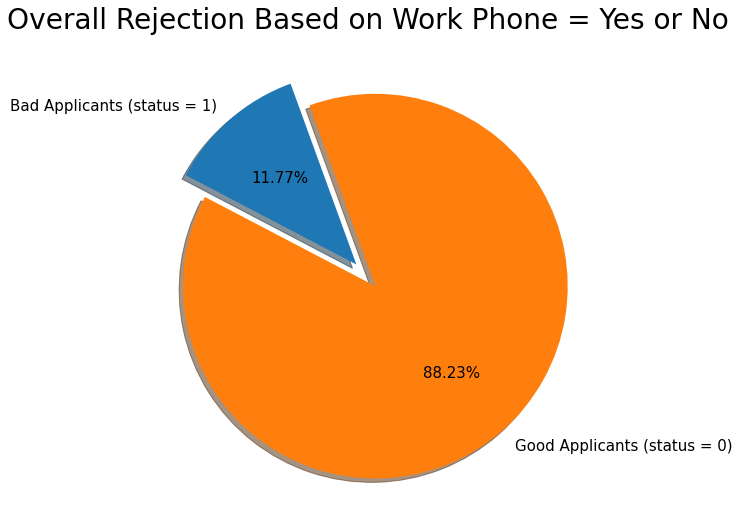

In [105]:
# Plotting a Pie Chart of Work Phone Analysis of Rejction % - STATUS wise

x = ['Bad Applicants (status = 1)', 'Good Applicants (status = 0)']
y = [total_bad_pctg, 100-total_bad_pctg]
explode = (0.15, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode, labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Overall Rejection Based on Work Phone = Yes or No', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

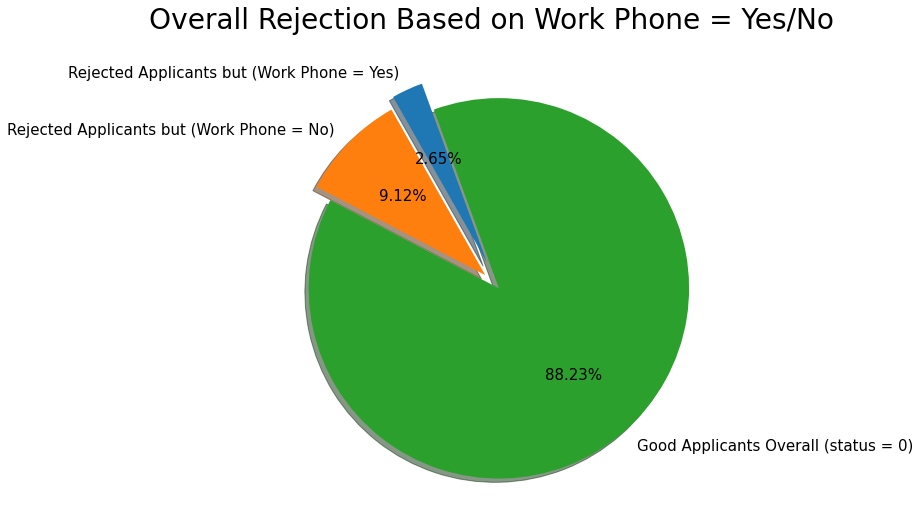

In [106]:
# Plotting a Pie Chart of Work Phone Analysis of Rejction % - STATUS wise

x = ['Rejected Applicants but (Work Phone = Yes)','Rejected Applicants but (Work Phone = No)','Good Applicants Overall (status = 0)']
y = [workphone_y_bad_pctg_in_total, workphone_n_bad_pctg_in_total , 100-(workphone_y_bad_pctg_in_total + workphone_n_bad_pctg_in_total)]
explode = (0.15, 0.10, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode,   labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Overall Rejection Based on Work Phone = Yes/No', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

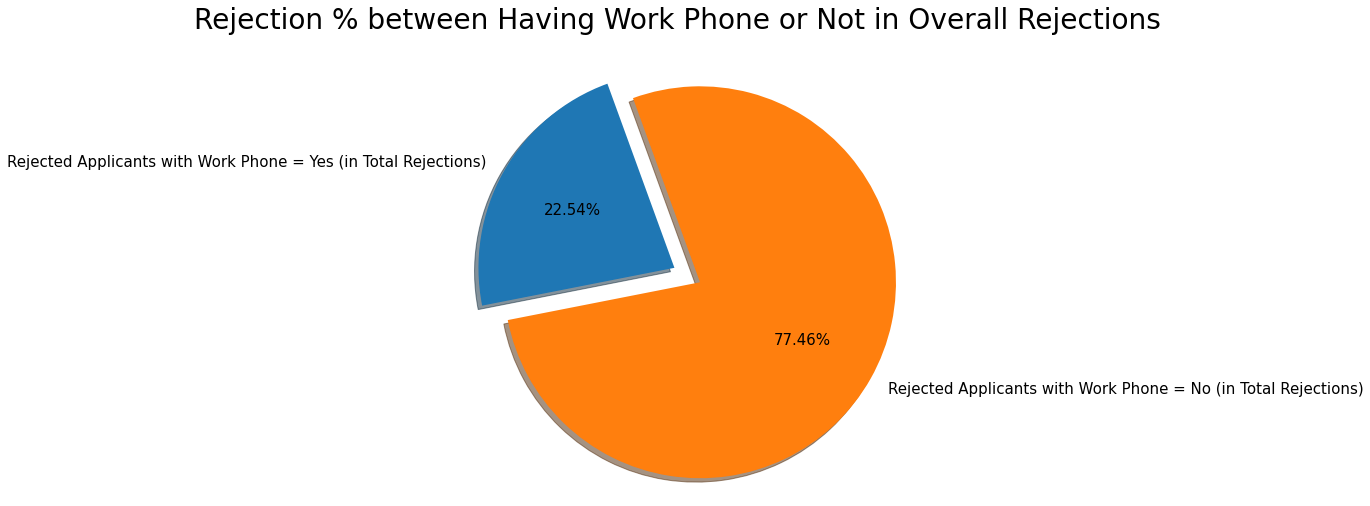

In [107]:
# Plotting a Pie Chart of Car Analysis of Rejection % - STATUS wise

x = ['Rejected Applicants with Work Phone = Yes (in Total Rejections)', 'Rejected Applicants with Work Phone = No (in Total Rejections)']
y = [workphone_y_bad_pctg,  100-workphone_y_bad_pctg]
explode = (0.15, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode, labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Rejection % between Having Work Phone or Not in Overall Rejections', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

# Individual Column Analysis & Crosstab with Status (Phone)

In [108]:
# Individual Column Analysis & Crosstab with Status (Phone)

print( Merged_Data_Inner_on_Max_Credit_ID.phone.value_counts() )
pd.crosstab(Merged_Data_Inner_on_Max_Credit_ID['phone'], Merged_Data_Inner_on_Max_Credit_ID['status'], margins = True)

N    25709
Y    10748
Name: phone, dtype: int64


status,0,1,All
phone,,,
N,22649,3060,25709
Y,9517,1231,10748
All,32166,4291,36457


In [109]:
# Printing Stats of Phone vs Status of Rejections & Rejection %

phone_n_good = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 1].loc[Merged_Data_Inner_on_Max_Credit_ID.phone == 'Y'].shape[0]
phone_n_bad = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 1].loc[Merged_Data_Inner_on_Max_Credit_ID.phone == 'N'].shape[0]
phone_y_good = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 0].loc[Merged_Data_Inner_on_Max_Credit_ID.phone == 'Y'].shape[0]
phone_n_good = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 0].loc[Merged_Data_Inner_on_Max_Credit_ID.phone == 'N'].shape[0]
total_bad_pctg = ( (phone_n_good+phone_n_bad) / (phone_n_good+phone_y_good+phone_n_bad+phone_n_good)   ) *100
phone_n_good_pctg = ( (phone_n_good) / (phone_n_good+phone_n_bad)   )*100
phone_n_bad_pctg = ( (phone_n_bad) / (phone_n_good+phone_n_bad)   )*100
phone_n_good_pctg_in_total = (phone_n_good)/(phone_n_good+phone_y_good+phone_n_bad+phone_n_good)*100
phone_n_bad_pctg_in_total = (phone_n_bad)/(phone_n_good+phone_y_good+phone_n_bad+phone_n_good)*100


print('Total Application : ' + str(phone_n_good+phone_y_good+phone_n_bad+phone_n_good) )
print('Total Rejections : ' + str(phone_n_good+phone_n_bad) )
print('Total Rejections % : ' + str(   (    (phone_n_good+phone_n_bad) / (phone_n_good+phone_y_good+phone_n_bad+phone_n_good)   )*100    ) )
print('Total Phone=Yes Rejection : ' + str(phone_n_good) )
print('Total Phone=No Rejection : ' + str(phone_n_bad) )
print('Total Phone=Yes Rejection %  out of Total Rejections : ' + str(   (phone_n_good)/(phone_n_good+phone_n_bad)*100   )     )
print('Total Phone=Yes Rejection %  out of Total Application : ' + str(   (phone_n_good)/(phone_n_good+phone_y_good+phone_n_bad+phone_n_good)*100   )     )
print('Total Phone=No Rejection %  out of Total Rejections : ' + str(   (phone_n_bad)/(phone_n_good+phone_n_bad)*100   )     )
print('Total Phone=No Rejection %  out of Total Application : ' + str(   (phone_n_bad)/(phone_n_good+phone_y_good+phone_n_bad+phone_n_good)*100   )     )



Total Application : 57875
Total Rejections : 25709
Total Rejections % : 44.421598272138226
Total Phone=Yes Rejection : 22649
Total Phone=No Rejection : 3060
Total Phone=Yes Rejection %  out of Total Rejections : 88.09755338597378
Total Phone=Yes Rejection %  out of Total Application : 39.134341252699784
Total Phone=No Rejection %  out of Total Rejections : 11.902446614026216
Total Phone=No Rejection %  out of Total Application : 5.287257019438445


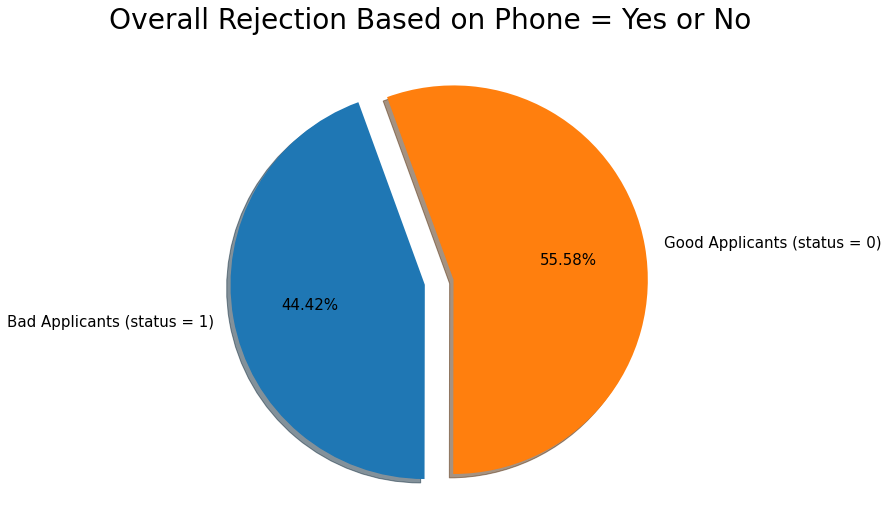

In [110]:
# Plotting a Pie Chart of Phone Analysis of Rejction % - STATUS wise

x = ['Bad Applicants (status = 1)', 'Good Applicants (status = 0)']
y = [total_bad_pctg, 100-total_bad_pctg]
explode = (0.15, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode, labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Overall Rejection Based on Phone = Yes or No', fontsize = 28)
#plt.title('(Status variable)')

plt.show()


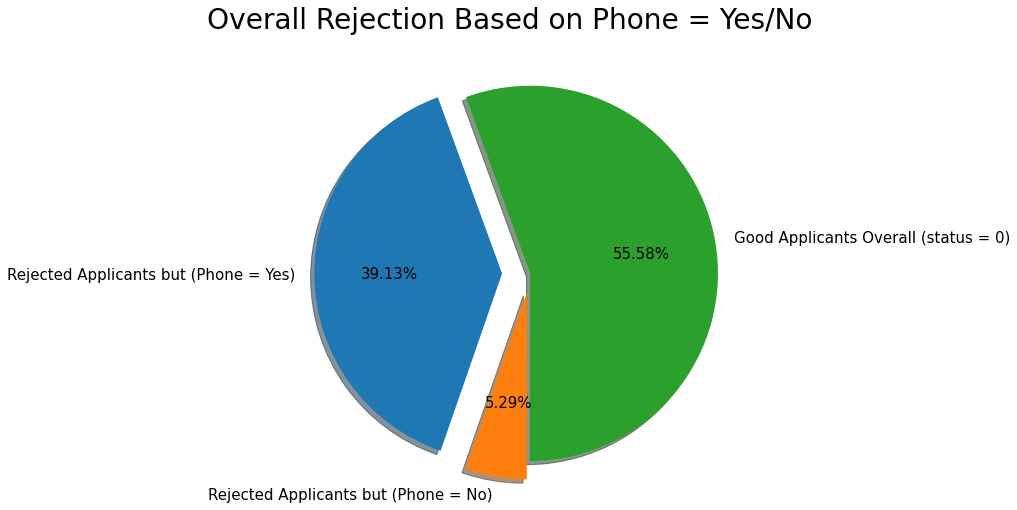

In [111]:
# Plotting a Pie Chart of Phone Analysis of Rejction % - STATUS wise

x = ['Rejected Applicants but (Phone = Yes)','Rejected Applicants but (Phone = No)','Good Applicants Overall (status = 0)']
y = [phone_n_good_pctg_in_total, phone_n_bad_pctg_in_total , 100-(phone_n_good_pctg_in_total + phone_n_bad_pctg_in_total)]
explode = (0.15, 0.10, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode,   labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Overall Rejection Based on Phone = Yes/No', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

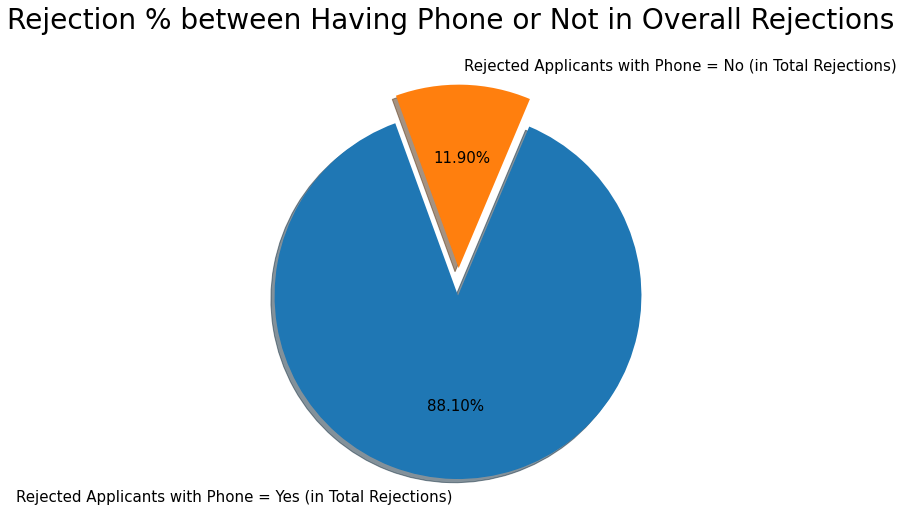

In [112]:
# Plotting a Pie Chart of Phone Analysis of Rejection % - STATUS wise

x = ['Rejected Applicants with Phone = Yes (in Total Rejections)', 'Rejected Applicants with Phone = No (in Total Rejections)']
y = [phone_n_good_pctg,  100-phone_n_good_pctg]
explode = (0.15, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode, labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Rejection % between Having Phone or Not in Overall Rejections', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

# Individual Column Analysis & Crosstab with Status (Email-ID)

In [113]:
print( Merged_Data_Inner_on_Max_Credit_ID.email.value_counts() )
pd.crosstab(Merged_Data_Inner_on_Max_Credit_ID['email'], Merged_Data_Inner_on_Max_Credit_ID['status'], margins = True)


# Printing Stats of email vs Status of Rejections & Rejection %

email_n_good = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 1].loc[Merged_Data_Inner_on_Max_Credit_ID.email == 'Y'].shape[0]
email_n_bad = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 1].loc[Merged_Data_Inner_on_Max_Credit_ID.email == 'N'].shape[0]
email_y_good = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 0].loc[Merged_Data_Inner_on_Max_Credit_ID.email == 'Y'].shape[0]
email_n_good = Merged_Data_Inner_on_Max_Credit_ID.loc[Merged_Data_Inner_on_Max_Credit_ID.status == 0].loc[Merged_Data_Inner_on_Max_Credit_ID.email == 'N'].shape[0]
total_bad_pctg = ( (email_n_good+email_n_bad) / (email_n_good+email_y_good+email_n_bad+email_n_good)   ) *100
email_n_good_pctg = ( (email_n_good) / (email_n_good+email_n_bad)   )*100
email_n_bad_pctg = ( (email_n_bad) / (email_n_good+email_n_bad)   )*100
email_n_good_pctg_in_total = (email_n_good)/(email_n_good+email_y_good+email_n_bad+email_n_good)*100
email_n_bad_pctg_in_total = (email_n_bad)/(email_n_good+email_y_good+email_n_bad+email_n_good)*100


print('Total Application : ' + str(email_n_good+email_y_good+email_n_bad+email_n_good) )
print('Total Rejections : ' + str(email_n_good+email_n_bad) )
print('Total Rejections % : ' + str(   (    (email_n_good+email_n_bad) / (email_n_good+email_y_good+email_n_bad+email_n_good)   )*100    ) )
print('Total email=Yes Rejection : ' + str(email_n_good) )
print('Total email=No Rejection : ' + str(email_n_bad) )
print('Total email=Yes Rejection %  out of Total Rejections : ' + str(   (email_n_good)/(email_n_good+email_n_bad)*100   )     )
print('Total email=Yes Rejection %  out of Total Application : ' + str(   (email_n_good)/(email_n_good+email_y_good+email_n_bad+email_n_good)*100   )     )
print('Total email=No Rejection %  out of Total Rejections : ' + str(   (email_n_bad)/(email_n_good+email_n_bad)*100   )     )
print('Total email=No Rejection %  out of Total Application : ' + str(   (email_n_bad)/(email_n_good+email_y_good+email_n_bad+email_n_good)*100   )     )



N    33186
Y     3271
Name: email, dtype: int64
Total Application : 65352
Total Rejections : 33186
Total Rejections % : 50.780389276533235
Total email=Yes Rejection : 29346
Total email=No Rejection : 3840
Total email=Yes Rejection %  out of Total Rejections : 88.4288555414934
Total email=Yes Rejection %  out of Total Application : 44.90451707675358
Total email=No Rejection %  out of Total Rejections : 11.571144458506598
Total email=No Rejection %  out of Total Application : 5.875872199779654


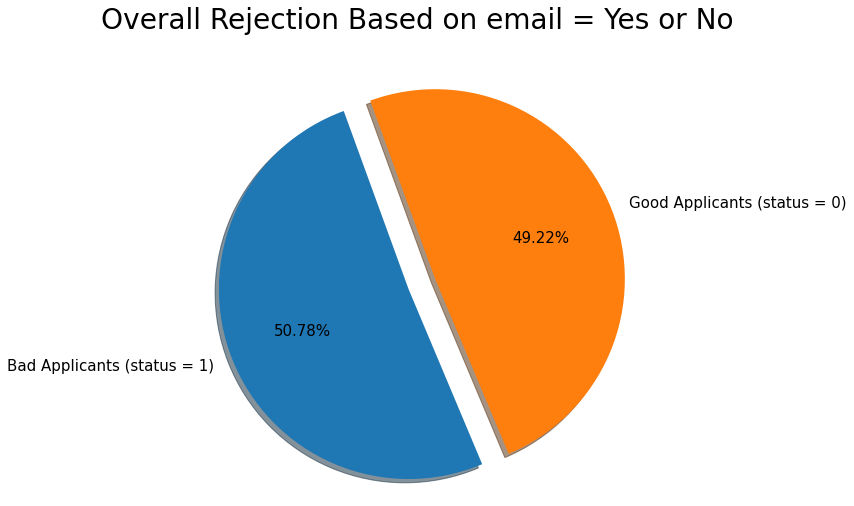

In [114]:
# Plotting a Pie Chart of email Analysis of Rejction % - STATUS wise

x = ['Bad Applicants (status = 1)', 'Good Applicants (status = 0)']
y = [total_bad_pctg, 100-total_bad_pctg]
explode = (0.15, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode, labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Overall Rejection Based on email = Yes or No', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

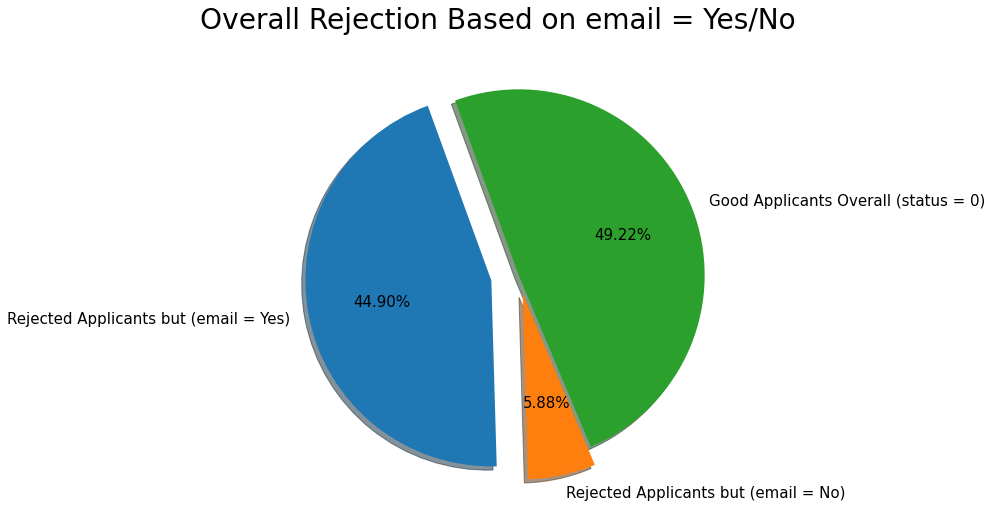

In [115]:
# Plotting a Pie Chart of email Analysis of Rejction % - STATUS wise

x = ['Rejected Applicants but (email = Yes)','Rejected Applicants but (email = No)','Good Applicants Overall (status = 0)']
y = [email_n_good_pctg_in_total, email_n_bad_pctg_in_total , 100-(email_n_good_pctg_in_total + email_n_bad_pctg_in_total)]
explode = (0.15, 0.10, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode,   labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Overall Rejection Based on email = Yes/No', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

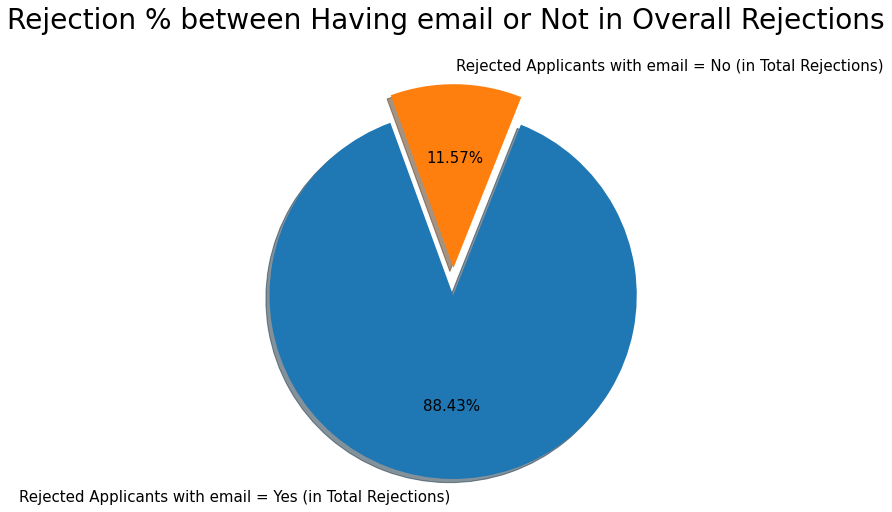

In [116]:
# Plotting a Pie Chart of email Analysis of Rejection % - STATUS wise

x = ['Rejected Applicants with email = Yes (in Total Rejections)', 'Rejected Applicants with email = No (in Total Rejections)']
y = [email_n_good_pctg,  100-email_n_good_pctg]
explode = (0.15, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(y, explode = explode, labels = x, autopct = '%1.2f%%', 
        shadow = True, startangle = 110, textprops = {'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Rejection % between Having email or Not in Overall Rejections', fontsize = 28)
#plt.title('(Status variable)')

plt.show()

In [117]:
# Converting the Categories to 1's and 0's in place of  Y's and N's

Merged_Data_Inner_on_Max_Credit_ID['gender'] = Merged_Data_Inner_on_Max_Credit_ID['gender'].replace('M', 1).replace('F', 0)
Merged_Data_Inner_on_Max_Credit_ID['own_car'] = Merged_Data_Inner_on_Max_Credit_ID['own_car'].replace('Y', 1).replace('N', 0)
Merged_Data_Inner_on_Max_Credit_ID['own_property'] = Merged_Data_Inner_on_Max_Credit_ID['own_property'].replace('Y', 1).replace('N', 0)
Merged_Data_Inner_on_Max_Credit_ID['work_phone'] = Merged_Data_Inner_on_Max_Credit_ID['work_phone'].replace('Y', 1).replace('N', 0)
Merged_Data_Inner_on_Max_Credit_ID['phone'] = Merged_Data_Inner_on_Max_Credit_ID['phone'].replace('Y', 1).replace('N', 0)
Merged_Data_Inner_on_Max_Credit_ID['email'] = Merged_Data_Inner_on_Max_Credit_ID['email'].replace('Y', 1).replace('N', 0)
Merged_Data_Inner_on_Max_Credit_ID.head(4)

,ID,gender,own_car,own_property,kids,total_income,income_type,education,marital_status,house_type,dob,work_exp,work_phone,phone,email,occupation,family_members,status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,1
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,1
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0


#  Analysis of  Own Car & Gender Against  Status

In [118]:
# Find the applicants count who don't own a car w.r.t. status  (gender-wise)  -- Count & Percent %

own_car_gen_count = Merged_Data_Inner_on_Max_Credit_ID.groupby(["own_car", 'gender'])["status"].value_counts(normalize = False).reset_index(name = 'count')
own_car_gen_percent = Merged_Data_Inner_on_Max_Credit_ID.groupby(["own_car", 'gender'])["status"].value_counts(normalize = True).reset_index(name = 'perc')


print(own_car_gen_count)
print("\n\n")
print(own_car_gen_percent)

   own_car  gender  status  count
0        0       0       0  16059
1        0       0       1   2101
2        0       1       0   3833
3        0       1       1    621
4        1       0       0   5613
5        1       0       1    657
6        1       1       0   6661
7        1       1       1    912



   own_car  gender  status      perc
0        0       0       0  0.884306
1        0       0       1  0.115694
2        0       1       0  0.860575
3        0       1       1  0.139425
4        1       0       0  0.895215
5        1       0       1  0.104785
6        1       1       0  0.879572
7        1       1       1  0.120428


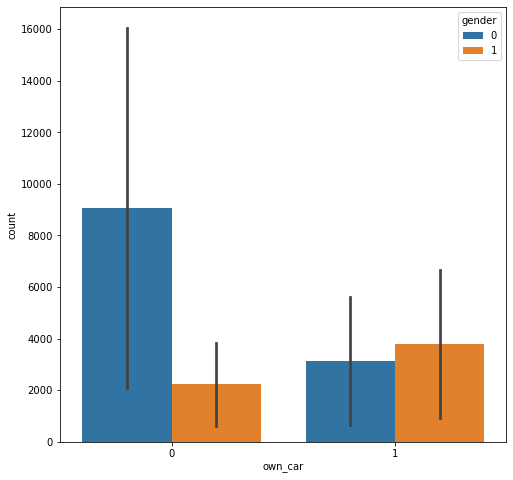

In [119]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = "own_car", y = "count", hue = "gender", data = own_car_gen_count)
plt.show()

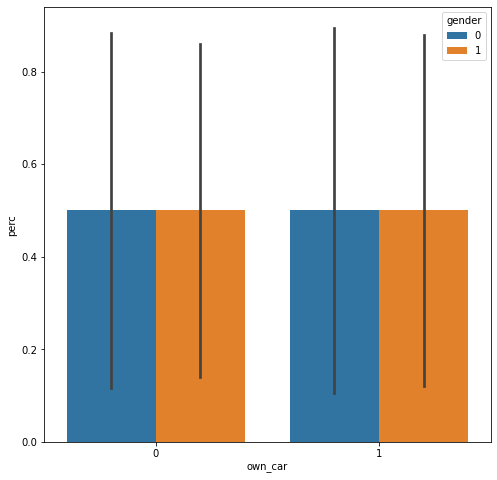

In [120]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = "own_car", y = "perc", hue = "gender", data = own_car_gen_percent)
plt.show()

Analysis:-

Applicants who don't own a car:
* 11.56% of Females who don't own a car are rejected.
* 13.94% of Males who don't own a car are rejected.

Applicants who own a car:
* 10.47% of Females who own a car are rejected.
* 12.04% of applicants who own a car are rejected.



In [121]:
# Find the applicants count who don't own a property w.r.t. status  (gender-wise)  -- Count & Percent %

own_property_gen_count = Merged_Data_Inner_on_Max_Credit_ID.groupby(["own_property", 'gender'])["status"].value_counts(normalize = False).reset_index(name = 'count')
own_property_gen_percent = Merged_Data_Inner_on_Max_Credit_ID.groupby(["own_property", 'gender'])["status"].value_counts(normalize = True).reset_index(name = 'perc')


print(own_property_gen_count)
print("\n\n")
print(own_property_gen_percent)

   own_property  gender  status  count
0             0       0       0   6650
1             0       0       1    950
2             0       1       0   3740
3             0       1       1    611
4             1       0       0  15022
5             1       0       1   1808
6             1       1       0   6754
7             1       1       1    922



   own_property  gender  status      perc
0             0       0       0  0.875000
1             0       0       1  0.125000
2             0       1       0  0.859573
3             0       1       1  0.140427
4             1       0       0  0.892573
5             1       0       1  0.107427
6             1       1       0  0.879885
7             1       1       1  0.120115


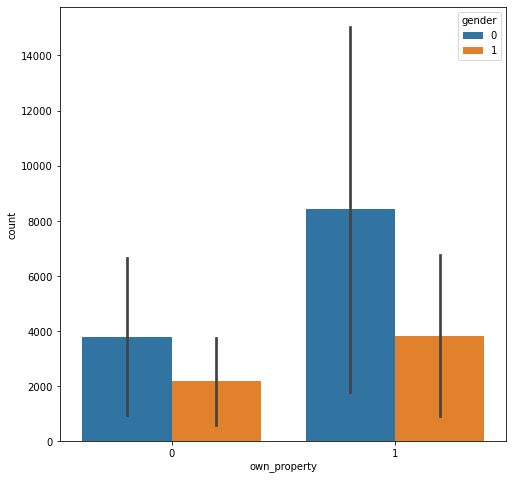

In [122]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = "own_property", y = "count", hue = "gender", data = own_property_gen_count)
plt.show()

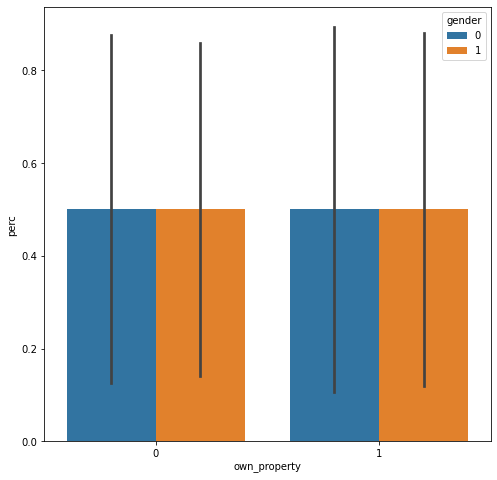

In [123]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = "own_property", y = "perc", hue = "gender", data = own_property_gen_percent)
plt.show()

Analysis:-

    12.50% of Female applicants without property are rejected.

    14.04% of Male applicants without property are rejected.

    10.74% of Female applicants with property are rejected.

    12.01% of Male applicants with property are rejected.

    There is a HIGHER rejection rate in case of male applicants as compared to female applicants. But having a property reduces the rejection rate by 2% approx in both the male and female applicants.



#  Analysis of  Work Phone & Gender Against  Status

In [124]:
# Find the applicants count who don't own a property w.r.t. status  (gender-wise)  -- Count & Percent %

work_phone_gen_count = Merged_Data_Inner_on_Max_Credit_ID.groupby(["work_phone", 'gender'])["status"].value_counts(normalize = False).reset_index(name = 'count')
work_phone_gen_percent = Merged_Data_Inner_on_Max_Credit_ID.groupby(["work_phone", 'gender'])["status"].value_counts(normalize = True).reset_index(name = 'perc')


print(work_phone_gen_count)
print("\n\n")
print(work_phone_gen_percent)

   work_phone  gender  status  count
0           0       0       0  17201
1           0       0       1   2185
2           0       1       0   7710
3           0       1       1   1139
4           1       0       0   4471
5           1       0       1    573
6           1       1       0   2784
7           1       1       1    394



   work_phone  gender  status      perc
0           0       0       0  0.887290
1           0       0       1  0.112710
2           0       1       0  0.871285
3           0       1       1  0.128715
4           1       0       0  0.886400
5           1       0       1  0.113600
6           1       1       0  0.876023
7           1       1       1  0.123977


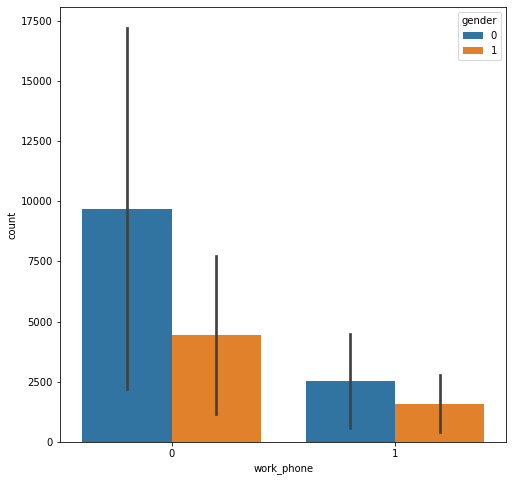

In [125]:

plt.subplots(figsize = (8, 8))
sns.barplot(x = "work_phone", y = "count", hue = "gender", data = work_phone_gen_count)
plt.show()

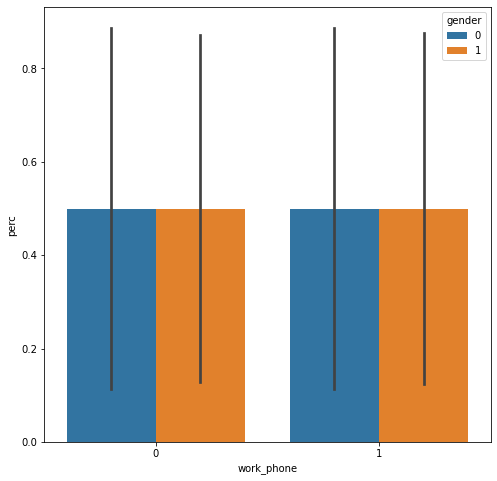

In [126]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = "work_phone", y = "perc", hue = "gender", data = work_phone_gen_percent)
plt.show()

Analysis:-

Applicants who don't own a work phone:
    * 11.27% of Females who don't own a work phone are rejected.
    * 12.87% of Males who don't own a work phone are rejected.

Applicants who own a work phone:
    * 11.36% of Females who own a work phone are rejected.
    * 12.40% of applicants who own a work phone are rejected.

#  Analysis of  Phone & Gender Against  Status

In [127]:
# Find the applicants count who don't own a property w.r.t. status  (gender-wise)  -- Count & Percent %

phone_gen_count = Merged_Data_Inner_on_Max_Credit_ID.groupby(["phone", 'gender'])["status"].value_counts(normalize = False).reset_index(name = 'count')
phone_gen_percent = Merged_Data_Inner_on_Max_Credit_ID.groupby(["phone", 'gender'])["status"].value_counts(normalize = True).reset_index(name = 'perc')


print(phone_gen_count)
print("\n\n")
print(phone_gen_percent)

   phone  gender  status  count
0      0       0       0  15048
1      0       0       1   1970
2      0       1       0   7601
3      0       1       1   1090
4      1       0       0   6624
5      1       0       1    788
6      1       1       0   2893
7      1       1       1    443



   phone  gender  status      perc
0      0       0       0  0.884240
1      0       0       1  0.115760
2      0       1       0  0.874583
3      0       1       1  0.125417
4      1       0       0  0.893686
5      1       0       1  0.106314
6      1       1       0  0.867206
7      1       1       1  0.132794


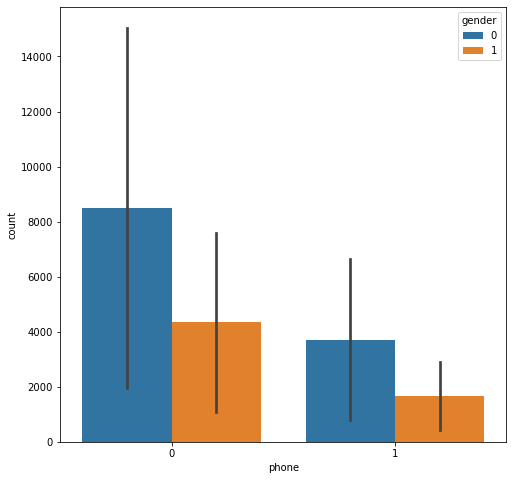

In [128]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = "phone", y = "count", hue = "gender", data = phone_gen_count)
plt.show()

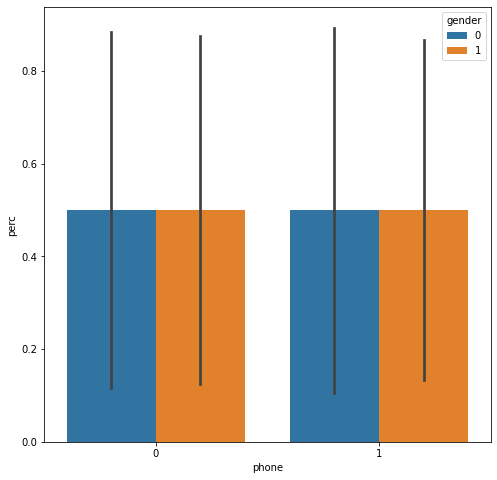

In [129]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = "phone", y = "perc", hue = "gender", data = phone_gen_percent)
plt.show()

Analysis:-

Applicants who don't own a phone:
    * 11.57% of Females who don't own a phone are rejected.
    * 12.54% of Males who don't own a phone are rejected.

Applicants who own a phone:
    * 10.63% of Females who own a phone are rejected.
    * 13.27% of applicants who own a phone are rejected.

#  Analysis of  Email & Gender Against  Status

In [130]:

# Find the applicants count who don't own a property w.r.t. status  (gender-wise)  -- Count & Percent %

email_gen_count = Merged_Data_Inner_on_Max_Credit_ID.groupby(["phone", 'gender'])["status"].value_counts(normalize = False).reset_index(name = 'count')
email_gen_percent = Merged_Data_Inner_on_Max_Credit_ID.groupby(["phone", 'gender'])["status"].value_counts(normalize = True).reset_index(name = 'perc')


print(email_gen_count)
print("\n\n")
print(email_gen_percent)

   phone  gender  status  count
0      0       0       0  15048
1      0       0       1   1970
2      0       1       0   7601
3      0       1       1   1090
4      1       0       0   6624
5      1       0       1    788
6      1       1       0   2893
7      1       1       1    443



   phone  gender  status      perc
0      0       0       0  0.884240
1      0       0       1  0.115760
2      0       1       0  0.874583
3      0       1       1  0.125417
4      1       0       0  0.893686
5      1       0       1  0.106314
6      1       1       0  0.867206
7      1       1       1  0.132794


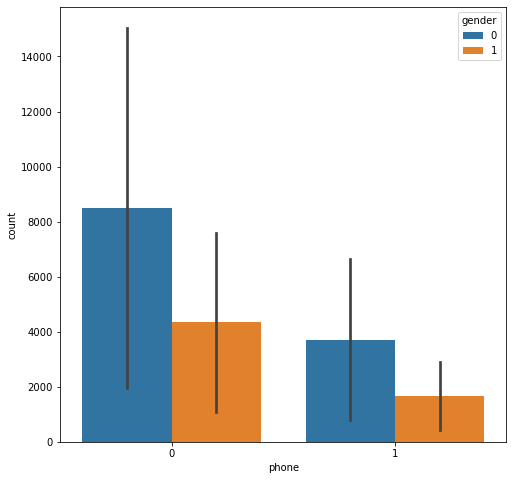

In [131]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = "phone", y = "count", hue = "gender", data = email_gen_count)
plt.show()

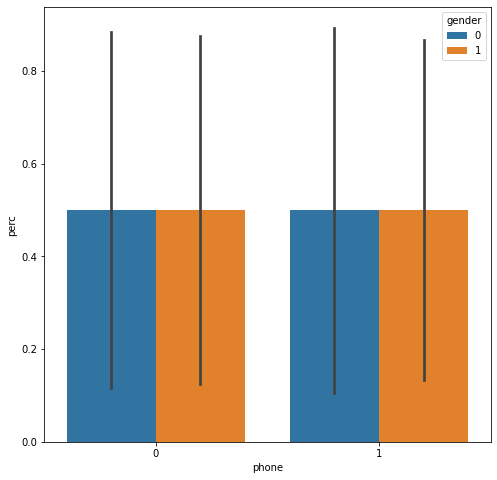

In [132]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = "phone", y = "perc", hue = "gender", data = email_gen_percent)
plt.show()

Analysis:-

Applicants who don't own an email:
     * 11.11% of Females who don't own an email are rejected.
     * 12.48% of Males who don't own an email are rejected.

Applicants who own an email:
    * 12.99% of Females who own an email are rejected.
    * 15.42% of applicants who own an email are rejected.

In [133]:
Merged_Data_Inner_on_Max_Credit_ID.head(3)

,ID,gender,own_car,own_property,kids,total_income,income_type,education,marital_status,house_type,dob,work_exp,work_phone,phone,email,occupation,family_members,status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,1
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,1
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0


# Analysis of Binary Columns

In [134]:
df_binary = Merged_Data_Inner_on_Max_Credit_ID[['gender', 'own_car','own_property','work_phone','phone','email','status']]

In [135]:
df_binary.head(5)

,gender,own_car,own_property,work_phone,phone,email,status
0,1,1,1,1,0,0,1
1,1,1,1,1,0,0,1
2,1,1,1,0,0,0,0
3,0,0,1,0,1,1,0
4,0,0,1,0,1,1,0


In [136]:
dict_list = []
for feature in ['gender', 'own_car', 'own_property', 'work_phone', 'phone', 'email','status']:
    for one_type in [0, 1]:
        dict_list.append({'feature': feature,
                          'type': one_type,
                          'reject_rate_percentage': round(len(df_binary[df_binary[feature] == one_type][df_binary.status == 1]) / 
                          len(df_binary[df_binary[feature] == one_type]) * 100, 2),
                          'count': len(df_binary[df_binary[feature] == one_type]),
                          'reject_count': len(df_binary[df_binary[feature] == one_type][df_binary.status == 1])
                         })

In [137]:
round(len(df_binary[df_binary[feature] == one_type][df_binary.status == 1]) / len(df_binary[df_binary[feature] == one_type]) * 100, 2)

100.0

# go back to cell 255

# Analysis of Numerical  (Continuous) Columns - except Binary ones

In [138]:
df_continuous = Merged_Data_Inner_on_Max_Credit_ID[['kids', 'total_income','family_members','dob','work_exp','status']]

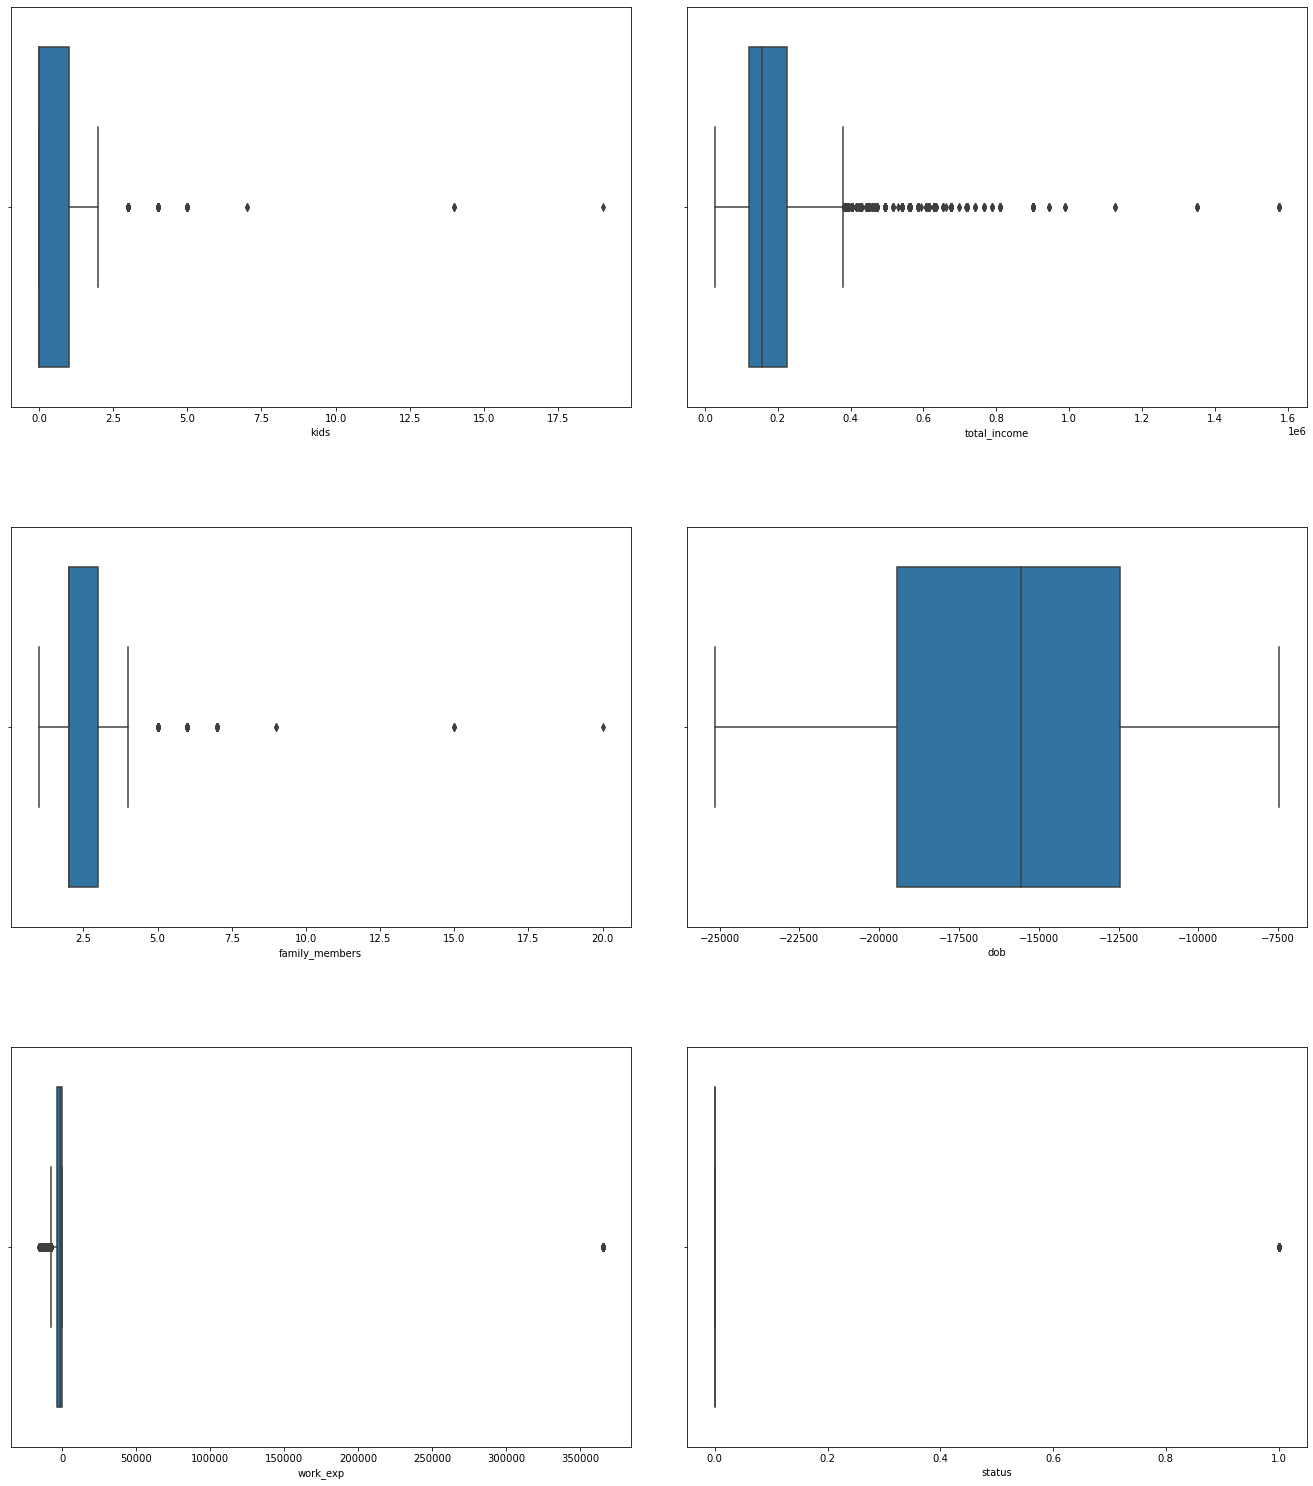

In [139]:
fig , axes = plt.subplots(nrows = 3, ncols = 2, constrained_layout = True)
fig.subplots_adjust(left = 0, bottom = 0, right = 3, top = 5, wspace = 0.09, hspace = 0.3)


for ax, column in zip(axes.flatten(), df_continuous.columns):
    sns.boxplot(df_continuous[column], ax = ax)

In [140]:
df_continuous.columns

Index(['kids', 'total_income', 'family_members', 'dob', 'work_exp', 'status'], dtype='object')

# Analysis

There are outliers to be treated

# Analysis of Numerical Column (Kids / Children Count)

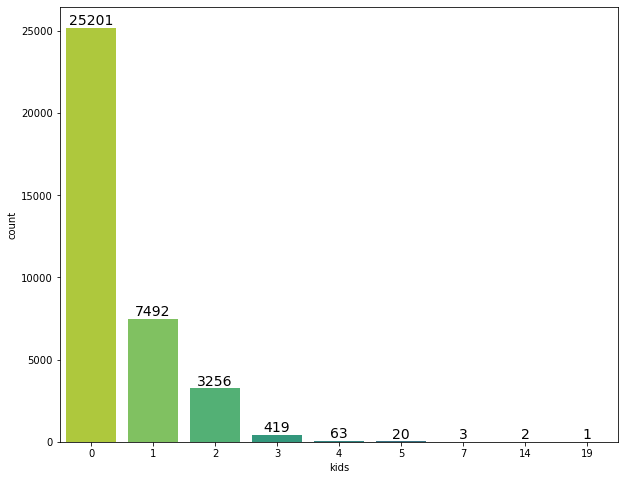

In [141]:
# Graphical Representation of Count of Kids / Children in each age 

plt.figure(figsize=(10, 8)) 
sns.countplot(x = "kids", data = df_continuous, palette = "viridis_r")
children_count = df_continuous.kids.value_counts()
children_count
for a, b in zip(range(len(children_count)), children_count):
    plt.text(a, b, '%.0f' % b, ha = 'center', va = 'bottom', fontsize = 14)
plt.show()

In [142]:
# Count of Kids / Children in each age 

df_continuous.kids.value_counts()

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: kids, dtype: int64

In [143]:
#  Percentage  %  Count of Kids / Children in each age 

df_continuous.kids.value_counts(normalize = True)*100

0     69.125271
1     20.550237
2      8.931069
3      1.149299
4      0.172806
5      0.054859
14     0.008229
7      0.005486
19     0.002743
Name: kids, dtype: float64

# Analysis of Numerical Columns (Kids / Children Count) - v/s - STATUS 

In [144]:
# Find the applicants children count w.r.t. status

child_st_count = df_continuous.groupby(["kids"])["status"].value_counts(normalize = False).reset_index(name = 'count')
child_st_count_percent = df_continuous.groupby(["kids"])["status"].value_counts(normalize = True).reset_index(name = 'perc')


print(child_st_count)
print('\n\n')
print(child_st_count_percent)

    kids  status  count
0      0       0  22259
1      0       1   2942
2      1       0   6642
3      1       1    850
4      2       0   2821
5      2       1    435
6      3       0    364
7      3       1     55
8      4       0     58
9      4       1      5
10     5       0     20
11     7       1      2
12    14       1      2
13    14       0      1
14    19       0      1



    kids  status      perc
0      0       0  0.883259
1      0       1  0.116741
2      1       0  0.886546
3      1       1  0.113454
4      2       0  0.866400
5      2       1  0.133600
6      3       0  0.868735
7      3       1  0.131265
8      4       0  0.920635
9      4       1  0.079365
10     5       0  1.000000
11     7       1  1.000000
12    14       1  0.666667
13    14       0  0.333333
14    19       0  1.000000


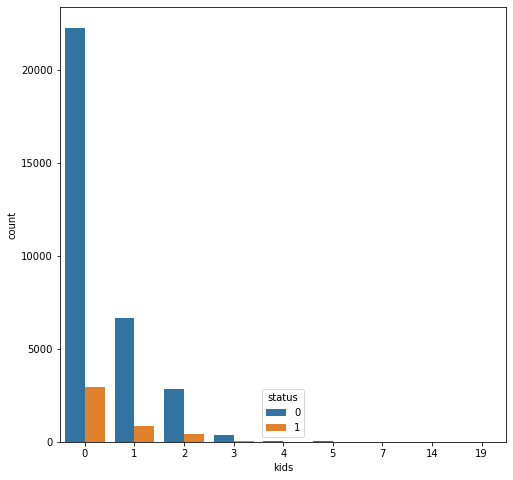

In [145]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = "kids", y = "count", hue = "status", data = child_st_count)
plt.show()

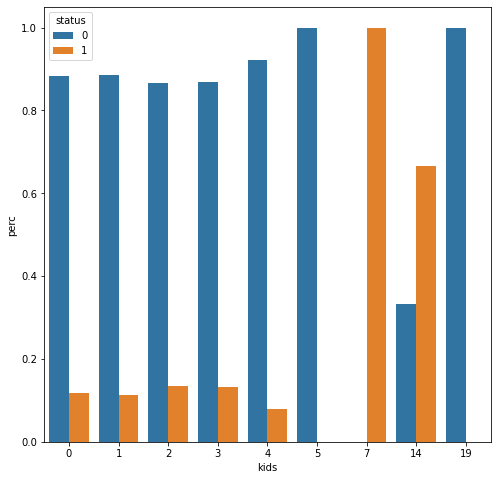

In [146]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = "kids", y = "perc", hue = "status", data = child_st_count_percent)
plt.show()

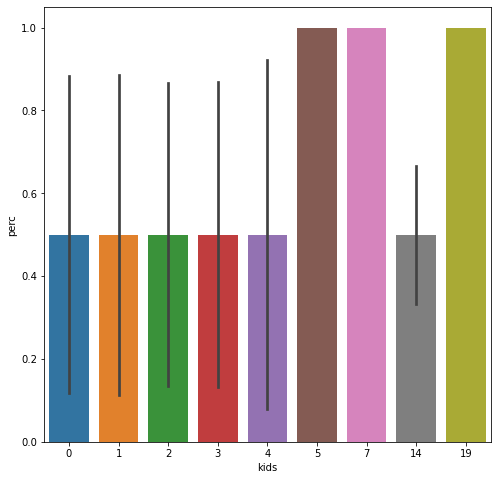

In [147]:
# Plotting Percentage % of Rejected Status - Kid Age Wise

plt.subplots(figsize = (8, 8))
sns.barplot(x = "kids", y = "perc", data = child_st_count_percent)
plt.show()

In [148]:
# checking the  count   and   percentage (%)  of rows -  unique age wise of the children  (Total)

kid_cnt = df_continuous["kids"].value_counts(normalize = False).reset_index(name = 'count')
kid_pct = df_continuous["kids"].value_counts(normalize = True).reset_index(name = 'perc')

print(kid_cnt)
print('\n\n\n')
print(kid_pct)

   index  count
0      0  25201
1      1   7492
2      2   3256
3      3    419
4      4     63
5      5     20
6     14      3
7      7      2
8     19      1




   index      perc
0      0  0.691253
1      1  0.205502
2      2  0.089311
3      3  0.011493
4      4  0.001728
5      5  0.000549
6     14  0.000082
7      7  0.000055
8     19  0.000027


In [149]:
# checking the  count   and   percentage (%)  of rows -  unique age wise of the children  - in case of REJECTED status

df_kid_rejected = df_continuous.loc[df_continuous.status == 1]
kid_cnt_rejected = df_kid_rejected["kids"].value_counts(normalize = False).reset_index(name = 'count')
kid_pct_rejected = df_kid_rejected["kids"].value_counts(normalize = True).reset_index(name = 'perc')

In [150]:
print(kid_cnt_rejected)
print('\n\n\n')
print(kid_pct_rejected)

   index  count
0      0   2942
1      1    850
2      2    435
3      3     55
4      4      5
5     14      2
6      7      2




   index      perc
0      0  0.685621
1      1  0.198089
2      2  0.101375
3      3  0.012818
4      4  0.001165
5     14  0.000466
6      7  0.000466


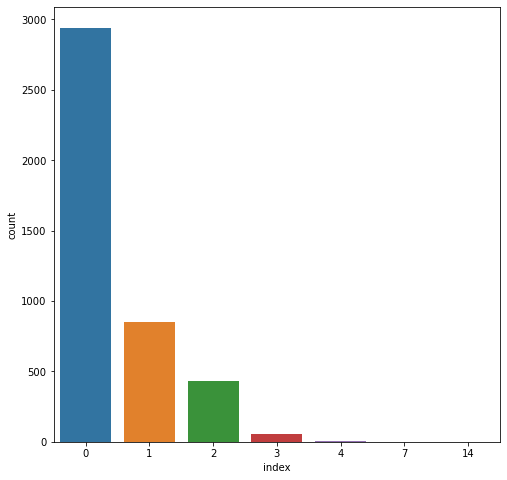

In [151]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = 'index', y = 'count', data = kid_cnt_rejected)
plt.show()

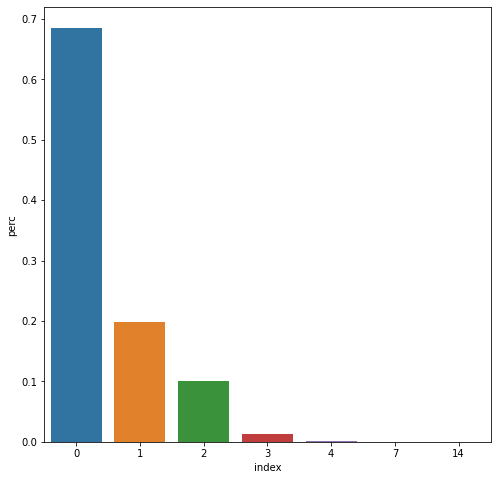

In [152]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = 'index', y = 'perc', data = kid_pct_rejected)
plt.show()

# Analysis of Numerical Columns (Family Members Count) - v/s - STATUS

In [153]:
# Find the applicants Family Members count w.r.t. status

familymember_st_count = df_continuous.groupby(["family_members"])["status"].value_counts(normalize = False).reset_index(name = 'count')
familymember_st_count_percent = df_continuous.groupby(["family_members"])["status"].value_counts(normalize = True).reset_index(name = 'perc')


print(familymember_st_count)
print('\n\n')
print(familymember_st_count_percent)

    family_members  status  count
0              1.0       0   6162
1              1.0       1    825
2              2.0       0  17200
3              2.0       1   2263
4              3.0       0   5698
5              3.0       1    723
6              4.0       0   2683
7              4.0       1    423
8              5.0       0    349
9              5.0       1     48
10             6.0       0     53
11             6.0       1      5
12             7.0       0     19
13             9.0       1      2
14            15.0       1      2
15            15.0       0      1
16            20.0       0      1



    family_members  status      perc
0              1.0       0  0.881924
1              1.0       1  0.118076
2              2.0       0  0.883728
3              2.0       1  0.116272
4              3.0       0  0.887401
5              3.0       1  0.112599
6              4.0       0  0.863812
7              4.0       1  0.136188
8              5.0       0  0.879093
9              

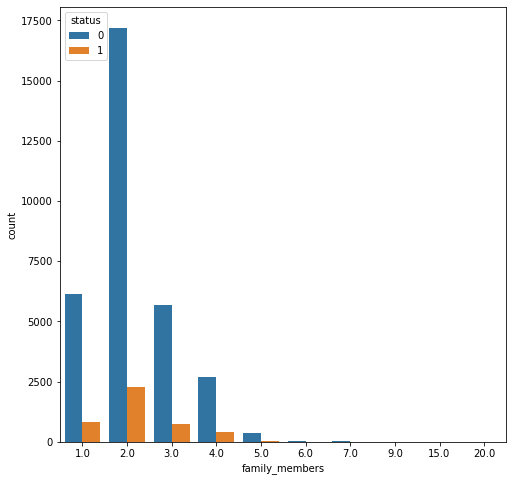

In [154]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = "family_members", y = "count", hue = "status", data = familymember_st_count)
plt.show()

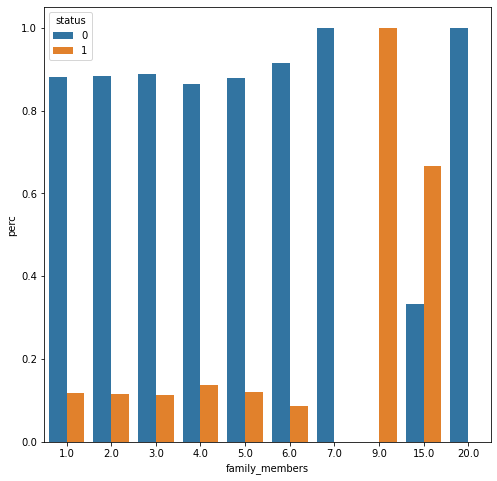

In [155]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = "family_members", y = "perc", hue = "status", data = familymember_st_count_percent)
plt.show()

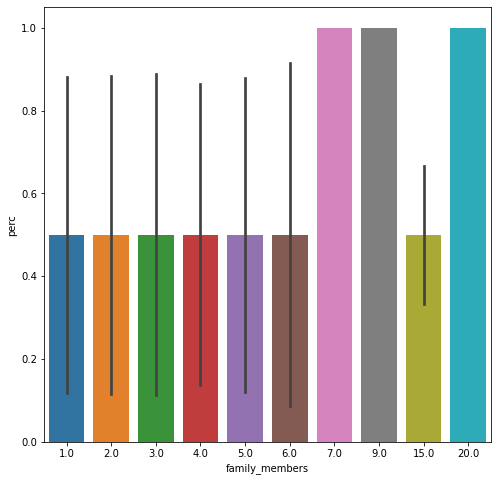

In [156]:
# Plotting Percentage % of Rejected Status - Family Member Count

plt.subplots(figsize = (8, 8))
sns.barplot(x = "family_members", y = "perc", data = familymember_st_count_percent)
plt.show()

In [157]:
# checking the  count   and   percentage (%)  of rows -  Family Member Count  (Total)

family_members_cnt = df_continuous["family_members"].value_counts(normalize = False).reset_index(name = 'count')
family_members_pct = df_continuous["family_members"].value_counts(normalize = True).reset_index(name = 'perc')

print(family_members_cnt)
print('\n\n\n')
print(family_members_pct)

   index  count
0    2.0  19463
1    1.0   6987
2    3.0   6421
3    4.0   3106
4    5.0    397
5    6.0     58
6    7.0     19
7   15.0      3
8    9.0      2
9   20.0      1




   index      perc
0    2.0  0.533862
1    1.0  0.191650
2    3.0  0.176125
3    4.0  0.085196
4    5.0  0.010890
5    6.0  0.001591
6    7.0  0.000521
7   15.0  0.000082
8    9.0  0.000055
9   20.0  0.000027


In [158]:
# checking the  count   and   percentage (%)  of rows -  unique age wise of the children  - in case of REJECTED status

df_family_members_rejected = df_continuous.loc[df_continuous.status == 1]
family_members_cnt_rejected = df_family_members_rejected["family_members"].value_counts(normalize = False).reset_index(name = 'count')
family_members_pct_rejected = df_family_members_rejected["family_members"].value_counts(normalize = True).reset_index(name = 'perc')


In [159]:

print(family_members_cnt_rejected)
print('\n\n\n')
print(family_members_pct_rejected)

   index  count
0    2.0   2263
1    1.0    825
2    3.0    723
3    4.0    423
4    5.0     48
5    6.0      5
6   15.0      2
7    9.0      2




   index      perc
0    2.0  0.527383
1    1.0  0.192263
2    3.0  0.168492
3    4.0  0.098578
4    5.0  0.011186
5    6.0  0.001165
6   15.0  0.000466
7    9.0  0.000466


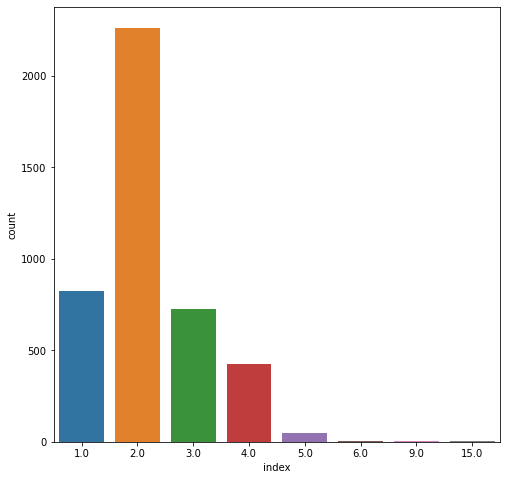

In [160]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = 'index', y = 'count', data = family_members_cnt_rejected)
plt.show()

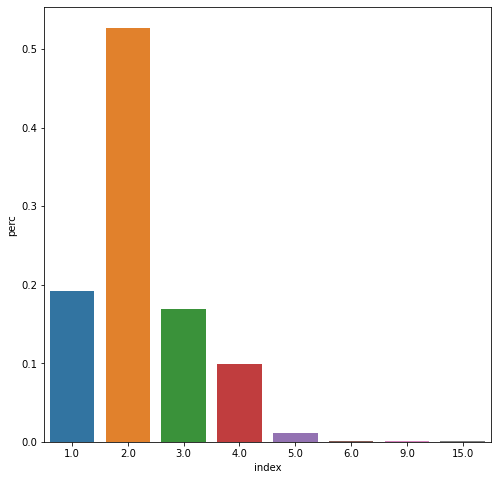

In [161]:
plt.subplots(figsize = (8, 8))
sns.barplot(x = 'index', y = 'perc', data = family_members_pct_rejected)
plt.show()

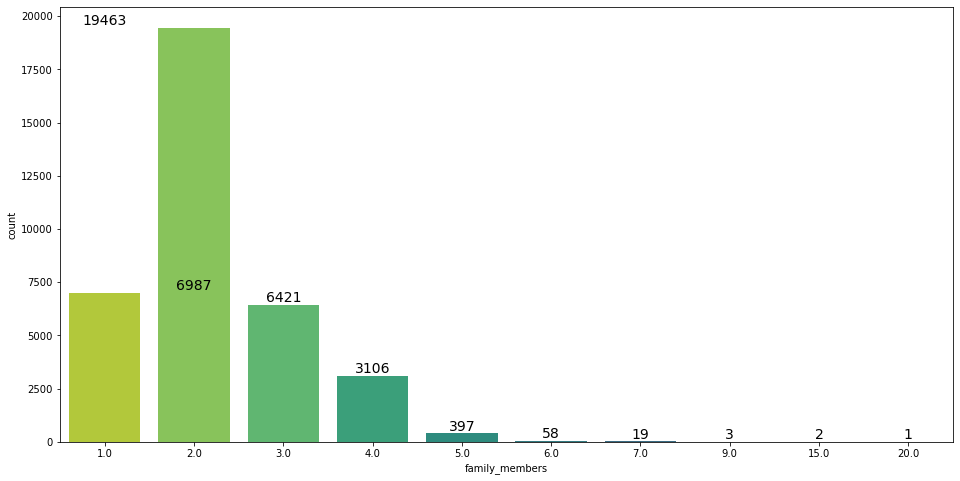

In [162]:
plt.figure(figsize=(16, 8)) 
sns.countplot(x = "family_members", data = df_continuous, palette = "viridis_r")
family_count = df_continuous.family_members.value_counts()
family_count
for a, b in zip(range(len(family_count)), family_count):
    plt.text(a, b, '%.0f' % b, ha = 'center', va = 'bottom', fontsize = 14)
plt.show()

# Analysis between Children and Family Members

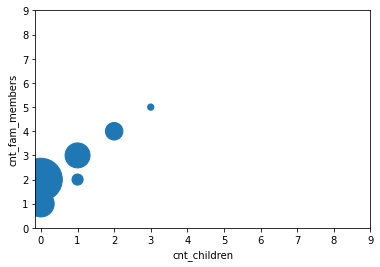

In [163]:
# Using Scatter Plot

fig = plt.figure()
ax = fig.add_subplot(111)
gp = df_continuous.groupby(by = ['kids', 'family_members'])
gp_df = gp.size().reset_index(name = 'times').sort_values('times', ascending = False)[:6]
gp_df['times_10'] = gp_df['times'].apply(lambda x: x/10)
ax.scatter(gp_df['kids'], gp_df['family_members'], s = gp_df['times_10'])

# basically to tell how many ticks or points on axes will be there

plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('cnt_children')
plt.ylabel('cnt_fam_members')
plt.show()

In [164]:

df_kids_fam_mem_rej = df_continuous[df_continuous.status == 1]
df_kids_fam_mem = df_kids_fam_mem_rej[["kids","family_members"]]

In [165]:
df_kids_fam_mem.value_counts()

kids  family_members
0     2.0               2125
      1.0                817
1     3.0                706
2     4.0                416
1     2.0                138
3     5.0                 48
2     3.0                 17
3     4.0                  7
1     1.0                  6
4     6.0                  5
2     1.0                  2
7     9.0                  2
14    15.0                 2
dtype: int64

<AxesSubplot:xlabel='kids'>

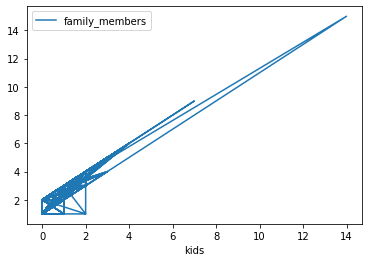

In [166]:
df_kids_fam_mem.plot(x='kids', y='family_members')

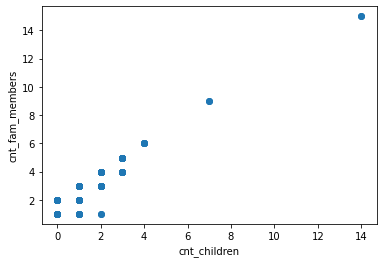

In [167]:
# Plotting total children vs total family members

plt.scatter(df_kids_fam_mem['kids'], df_kids_fam_mem['family_members'])
plt.xlabel('cnt_children')
plt.ylabel('cnt_fam_members')
plt.show()

# Income Amount Analysis 

In [168]:
df_continuous['total_income'].nunique()

265

In [169]:
df_continuous['total_income'].value_counts()

135000.0    4309
180000.0    3097
157500.0    3089
112500.0    2956
225000.0    2926
            ... 
177750.0       1
594000.0       1
164250.0       1
124200.0       1
179271.0       1
Name: total_income, Length: 265, dtype: int64

In [170]:
# Remove the scientific notations

pd.options.display.float_format = '{:.1f}'.format

# Revert back to scientific notation

# pd.reset_option('display.float_format')

In [171]:
df_continuous['total_income'].describe()

count     36457.0
mean     186685.7
std      101789.2
min       27000.0
25%      121500.0
50%      157500.0
75%      225000.0
max     1575000.0
Name: total_income, dtype: float64

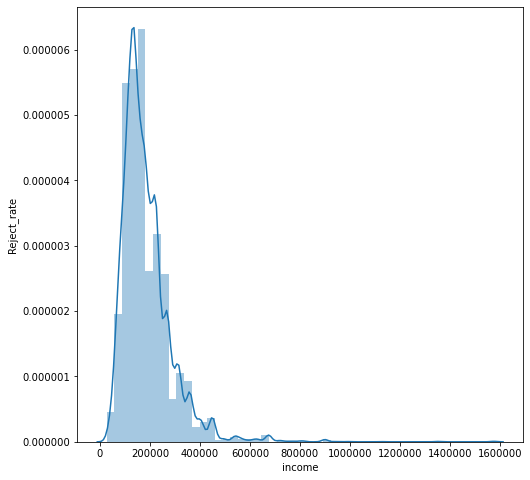

In [172]:
# Distribution Plot

plt.subplots(figsize = (8, 8))
income_plot = pd.Series(df_continuous.total_income, name = "income")
plt.ylabel('Reject_rate')
sns.distplot(income_plot)
plt.ticklabel_format(style='plain')
plt.show()

In [173]:
df_continuous.total_income.quantile([.01, .25, .5, .75, 0.99])

0.0    54000.0
0.2   121500.0
0.5   157500.0
0.8   225000.0
1.0   560250.0
Name: total_income, dtype: float64

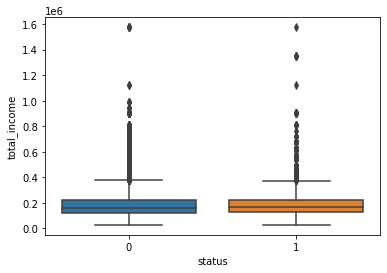

In [174]:
# Box Plot

sns.boxplot(x = "status", y = "total_income", data = df_continuous)
plt.show()

# Outlier Detection of Income Column

In [175]:
# Q1

Q1_Income = np.percentile(df_continuous.total_income, 25)
Q1_Income

121500.0

In [176]:
# Q2

Q2_Income = np.percentile(df_continuous.total_income, 50)
Q2_Income

157500.0

In [177]:
# Q3

Q3_Income = np.percentile(df_continuous.total_income, 75)
Q3_Income

225000.0

In [178]:
Q1_Income,Q3_Income = np.percentile(df_continuous.total_income, [25,75])
Q1_Income,Q3_Income

(121500.0, 225000.0)

In [179]:
IQR_Income = Q3_Income - Q1_Income
upper_limit_Income = Q3_Income + 1.5 * IQR_Income
low_limit_Income = Q1_Income - 1.5 * IQR_Income
IQR_Income, upper_limit_Income, low_limit_Income

(103500.0, 380250.0, -33750.0)

# Finding the outliers

In [180]:
outliers_Income = df_continuous.total_income[(df_continuous.total_income > upper_limit_Income) | (df_continuous.total_income < low_limit_Income)]
print(outliers_Income.head())

0    427500.0
1    427500.0
27   405000.0
28   405000.0
29   405000.0
Name: total_income, dtype: float64


# Converting the 'object' to a 'DataFrame'

In [181]:
outliers_Income = pd.DataFrame(outliers_Income)

In [182]:
# Finding count of unique values of each of the income in the Outlier

outliers_Income.total_income.value_counts()

450000.0     379
405000.0     282
382500.0     123
675000.0     115
540000.0      87
391500.0      56
427500.0      53
495000.0      43
900000.0      39
387000.0      39
562500.0      35
630000.0      31
585000.0      21
720000.0      19
445500.0      17
472500.0      16
810000.0      15
612000.0      13
560250.0      12
459000.0       9
765000.0       9
616500.0       8
423000.0       8
517500.0       8
1575000.0      8
652500.0       7
441000.0       7
463500.0       7
607500.0       6
396000.0       6
1350000.0      6
742500.0       5
787500.0       5
945000.0       4
990000.0       4
494100.0       4
634500.0       4
1125000.0      3
418500.0       3
414000.0       3
468000.0       2
697500.0       2
716323.5       2
661500.0       1
531000.0       1
594000.0       1
432000.0       1
Name: total_income, dtype: int64

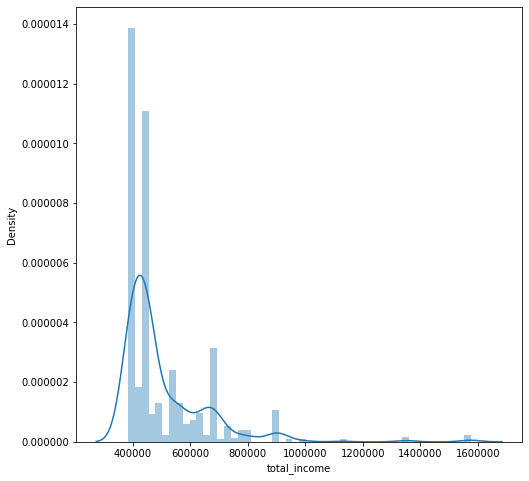

In [183]:
# Plotting the list of outliers

plt.subplots(figsize = (8, 8))
sns.distplot(outliers_Income['total_income'])
plt.ticklabel_format(style = 'plain')

#### Compare the Income column for  Outliers  v/s   Non-Outliers

In [184]:
# Finding all the values that falls within the Upper and Lower limit

non_outliers_Income = df_continuous.total_income[(df_continuous.total_income < upper_limit_Income) & (df_continuous.total_income > low_limit_Income)]
                      
non_outliers_Income.shape

(34928,)

In [185]:
non_outliers_Income = pd.DataFrame(non_outliers_Income)
non_outliers_Income.shape

(34928, 1)

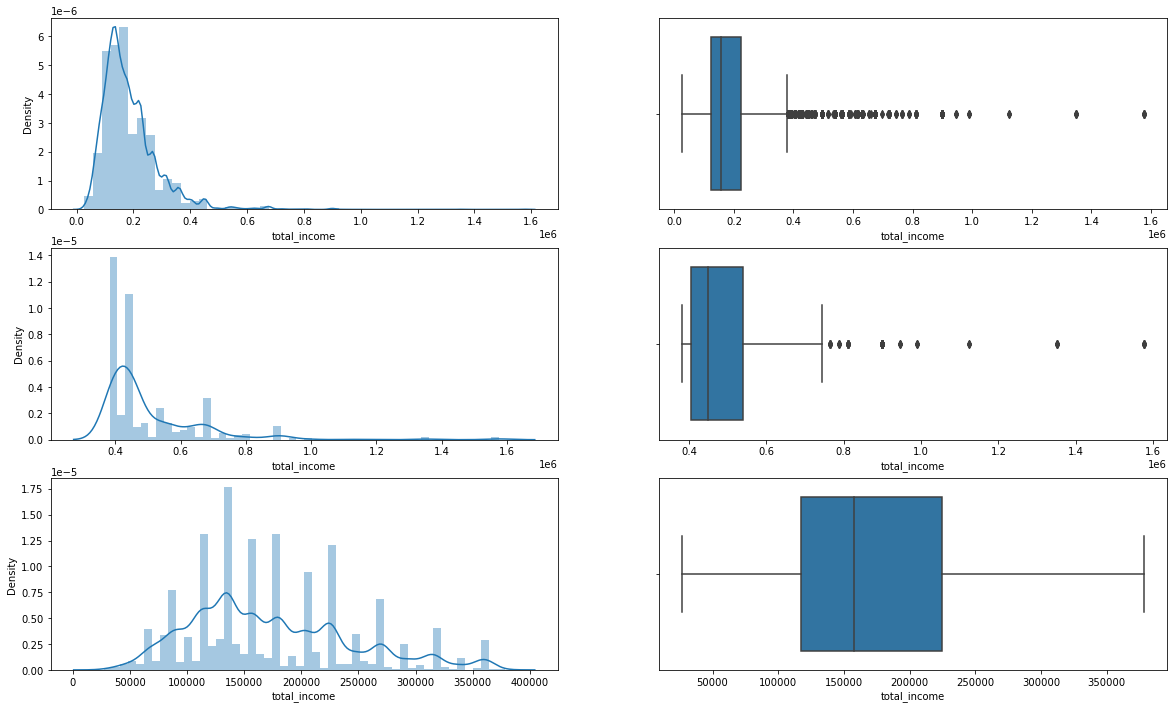

In [186]:
# Plotting the various plots 

plt.figure(figsize=(20,12))


# normal
plt.subplot(3,2,1)
sns.distplot(df_continuous['total_income'])
plt.subplot(3,2,2)
sns.boxplot(df_continuous['total_income'])


# outliers
plt.subplot(3,2,3)
sns.distplot(outliers_Income['total_income'])
plt.subplot(3,2,4)
sns.boxplot(outliers_Income['total_income'])


# non-outliers
plt.subplot(3,2,5)
sns.distplot(non_outliers_Income['total_income'])
plt.subplot(3,2,6)
sns.boxplot(non_outliers_Income['total_income'])

plt.show()

# Bucketing the Income Column 

In [187]:
# Convert into a DataFrame since it was an Object

In [188]:
df_continuous = pd.DataFrame(df_continuous)

In [189]:
# Creating Buckets for the Income range

df_continuous['income_bucket'] = pd.qcut(df_continuous.total_income, 
                                         q = [0, 0.2, 0.5, 0.8, 0.95, 1], 
                                         labels = ['Very_low', 'Low', "Medium", 'High', 'Very_high'])

In [190]:
# Another way to find the bucket ranges based on percentile

print(np.percentile(df_continuous.total_income, 0))
print(np.percentile(df_continuous.total_income, 20))
print(np.percentile(df_continuous.total_income, 50))
print(np.percentile(df_continuous.total_income, 80))
print(np.percentile(df_continuous.total_income, 95))
print(np.percentile(df_continuous.total_income, 100))

27000.0
112500.0
157500.0
247500.0
360000.0
1575000.0


In [191]:
# Creating a Formulae to split the Income based on various percentile range 

def func_income_buck(input_string):
    if (input_string <= 27000 ):
        return "VeryLow" 
    elif (input_string >  27000 and input_string <= 112500 ):
        return "Low"
    elif (input_string >  112500 and input_string <= 157500 ):
        return "Medium"
    elif (input_string >  157500 and input_string <= 247500 ):
        return "High"
    elif (input_string >  247500   ):
        return "VeryHigh"
    else:
        return "NA"

In [192]:
# applying the  Formulae to split the Income based on various percentile range 

df_continuous['income_bucket'] = df_continuous['total_income'].apply(lambda input_variable:func_income_buck(input_variable))

In [193]:
# applying the  Formulae to split the Income based on various percentile range 

Merged_Data_Inner_on_Max_Credit_ID['income_bucket'] = Merged_Data_Inner_on_Max_Credit_ID['total_income'].apply(lambda input_variable:func_income_buck(input_variable))

In [194]:
df_continuous['income_bucket'].value_counts()

High        11289
Medium       9961
Low          8599
VeryHigh     6605
VeryLow         3
Name: income_bucket, dtype: int64

In [195]:
Merged_Data_Inner_on_Max_Credit_ID['income_bucket'].value_counts()

High        11289
Medium       9961
Low          8599
VeryHigh     6605
VeryLow         3
Name: income_bucket, dtype: int64

<AxesSubplot:xlabel='income_bucket'>

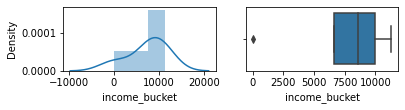

In [196]:
plt.subplot(3,2,1)
sns.distplot(df_continuous['income_bucket'].value_counts())
plt.subplot(3,2,2)
sns.boxplot(df_continuous['income_bucket'].value_counts())

# Date of Birth (DoB) Analysis

In [197]:
df_continuous['dob'].head()

0   -12005
1   -12005
2   -21474
3   -19110
4   -19110
Name: dob, dtype: int64

# transform the days from birth into years, and Plot the Histogram and Box diagram.

In [198]:
# converting negative numbers to positive

df_continuous['dob'] = abs(df_continuous['dob'])
Merged_Data_Inner_on_Max_Credit_ID['dob'] = abs(Merged_Data_Inner_on_Max_Credit_ID['dob'])
print(df_continuous['dob'].nunique())

7183


In [199]:
# Converting the days of birth to Years  - Dividing by 365.25

df_continuous['age'] = (df_continuous['dob'] / 365.25).astype(int)
Merged_Data_Inner_on_Max_Credit_ID['age'] = (Merged_Data_Inner_on_Max_Credit_ID['dob'] / 365.25).astype(int)

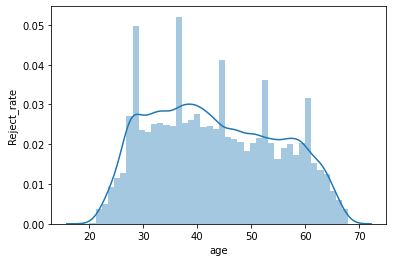

In [200]:
plt.ylabel('Reject_rate')
age_plot = pd.Series(df_continuous.age , name = "age")
sns.distplot(age_plot)
plt.show()

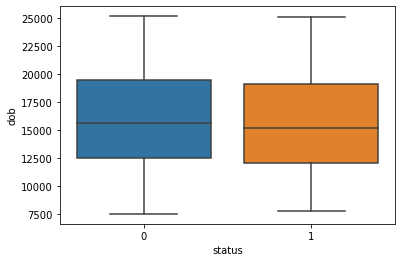

In [201]:
# Box Plot

sns.boxplot(x = "status", y = "dob", data = df_continuous)
plt.show()

In [202]:
df_continuous.age.value_counts()

37    1200
40    1154
27    1125
28    1124
39    1092
33    1060
38    1058
32    1045
34    1036
42    1028
35    1020
41    1016
43     992
30     982
36     969
31     962
29     951
44     940
46     910
51     900
47     890
48     857
54     848
50     844
59     844
57     837
56     792
53     781
60     780
45     774
49     758
58     722
52     722
55     674
62     640
63     567
61     536
26     527
64     520
25     475
24     386
65     339
66     252
23     209
22     152
67     130
68      26
21      10
20       1
Name: age, dtype: int64

In [203]:
df_continuous.age.describe()

count   36457.0
mean       43.2
std        11.5
min        20.0
25%        34.0
50%        42.0
75%        53.0
max        68.0
Name: age, dtype: float64

In [204]:
# Binning / Bucketing

df_continuous['age_bucket'] = pd.cut(df_continuous['age'], 
                    bins = [18, 25, 35, 60, 100], labels=['Very_Young', 'Young', 'Middle_Age', 'Senior_Citizen'])

In [205]:
# Binning / Bucketing  in the main Merged DataSet

Merged_Data_Inner_on_Max_Credit_ID['age_bucket'] = pd.cut(Merged_Data_Inner_on_Max_Credit_ID['age'], 
                    bins = [18, 25, 35, 60, 100], labels=['Very_Young', 'Young', 'Middle_Age', 'Senior_Citizen'])

<AxesSubplot:ylabel='Frequency'>

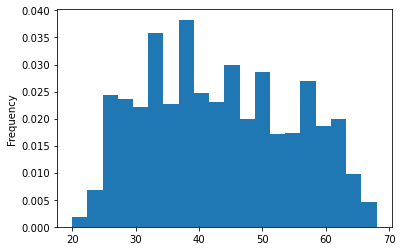

In [206]:
df_continuous['age'].plot(kind = 'hist', bins = 20, density = True)

<AxesSubplot:xlabel='status', ylabel='count'>

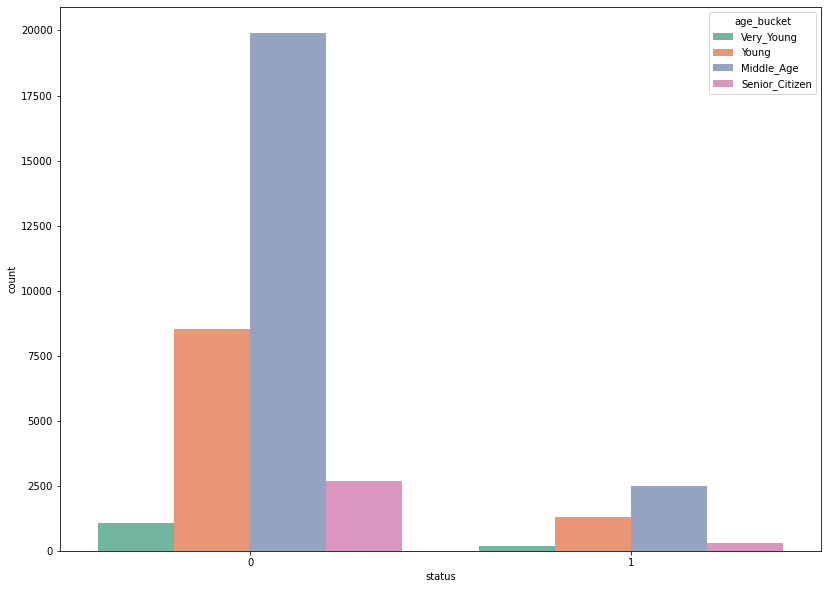

In [207]:
# Plotting both Good and Bad applicants based on Age Bucket 

plt.figure(figsize = (30, 10)) 

plt.subplot(121)
sns.countplot(x = 'status', hue = 'age_bucket', data = df_continuous, palette = 'Set2')

# Date_Employed or Work_Experience Analysis

In [208]:
df_continuous.head()

,kids,total_income,family_members,dob,work_exp,status,income_bucket,age,age_bucket
0,0,427500.0,2.0,12005,-4542,1,VeryHigh,32,Young
1,0,427500.0,2.0,12005,-4542,1,VeryHigh,32,Young
2,0,112500.0,2.0,21474,-1134,0,Low,58,Middle_Age
3,0,270000.0,1.0,19110,-3051,0,VeryHigh,52,Middle_Age
4,0,270000.0,1.0,19110,-3051,0,VeryHigh,52,Middle_Age


In [209]:
# Converting into Years format 

df_continuous['employed_years'] = df_continuous[df_continuous.work_exp < 0].work_exp.apply(lambda x: int(-x / 365.25))
Merged_Data_Inner_on_Max_Credit_ID['employed_years'] = Merged_Data_Inner_on_Max_Credit_ID[Merged_Data_Inner_on_Max_Credit_ID.work_exp < 0].work_exp.apply(lambda x: int(-x / 365.25))

In [210]:
print(df_continuous['employed_years'].nunique())
print(df_continuous['employed_years'].value_counts().head(10))

44
1.0    3233
4.0    2879
3.0    2815
2.0    2779
0.0    2542
6.0    2127
5.0    2060
8.0    1831
7.0    1642
9.0    1281
Name: employed_years, dtype: int64


In [211]:
# checking if any null values in employed - years

df_continuous['employed_years'].isnull().sum()

6135

6135 null values

In [212]:
# calculating % of null values in the employed years tables 

(df_continuous.isnull().sum() / len(df_continuous) * 100).sort_values(ascending = False)

employed_years   16.8
kids              0.0
total_income      0.0
family_members    0.0
dob               0.0
work_exp          0.0
status            0.0
income_bucket     0.0
age               0.0
age_bucket        0.0
dtype: float64

since < 30% we will impute it

In [213]:
# checking the split of years/age for the dataset where Employed-years is NUll

df_continuous[df_continuous['employed_years'].isnull()]['age'].value_counts()

59    554
60    528
62    521
57    511
58    495
63    469
64    444
61    440
56    397
65    328
55    324
66    230
54    154
67    128
53    111
51    109
52     93
50     37
47     36
46     26
68     26
44     22
45     21
48     20
26     18
49     16
39     13
42     10
33      8
40      8
38      7
41      6
43      5
35      4
22      3
30      3
36      3
32      2
37      2
34      1
27      1
28      1
Name: age, dtype: int64

looks mostly people above 50 are not employed  could be pensioners

In [214]:
# Replacing NaN values with Zero (0), as pensioners are retired and they are not employed.

df_continuous['employed_years'] = df_continuous['employed_years'].replace(np.nan, 0)
Merged_Data_Inner_on_Max_Credit_ID['employed_years'] = Merged_Data_Inner_on_Max_Credit_ID['employed_years'].replace(np.nan, 0)

In [215]:
# checking back the % of null values if any 

(df_continuous.isnull().sum() / len(df_continuous) * 100).sort_values(ascending = False)

kids             0.0
total_income     0.0
family_members   0.0
dob              0.0
work_exp         0.0
status           0.0
income_bucket    0.0
age              0.0
age_bucket       0.0
employed_years   0.0
dtype: float64

In [216]:
df_continuous.employed_years.value_counts()

0.0     8677
1.0     3233
4.0     2879
3.0     2815
2.0     2779
6.0     2127
5.0     2060
8.0     1831
7.0     1642
9.0     1281
10.0    1095
12.0     753
11.0     712
14.0     606
15.0     583
13.0     579
18.0     306
20.0     299
16.0     266
19.0     256
17.0     236
21.0     189
22.0     180
23.0     178
25.0     148
27.0     109
24.0     103
26.0      88
29.0      86
32.0      53
28.0      52
31.0      47
35.0      35
33.0      33
30.0      33
34.0      22
41.0      20
40.0      16
39.0      16
36.0      14
38.0      12
42.0       4
37.0       3
43.0       1
Name: employed_years, dtype: int64

In [217]:
Merged_Data_Inner_on_Max_Credit_ID.isnull().sum()

ID                    0
gender                0
own_car               0
own_property          0
kids                  0
total_income          0
income_type           0
education             0
marital_status        0
house_type            0
dob                   0
work_exp              0
work_phone            0
phone                 0
email                 0
occupation        11323
family_members        0
status                0
income_bucket         0
age                   0
age_bucket            0
employed_years        0
dtype: int64

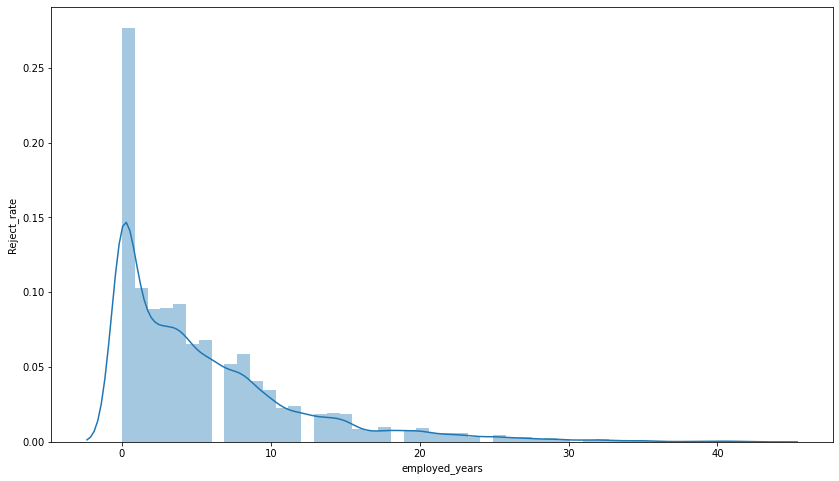

In [218]:


plt.subplots(figsize = (14, 8))
plt.ylabel('Reject_rate')
employed_year_plot = pd.Series(df_continuous.employed_years, name = "employed_years")
sns.distplot(employed_year_plot)
plt.show()

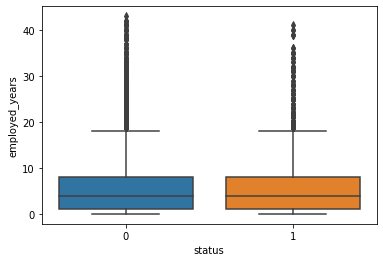

In [219]:
# checking outliers based on the status if any

sns.boxplot(x = "status", y = "employed_years", data = df_continuous)
plt.show()

<AxesSubplot:xlabel='status', ylabel='count'>

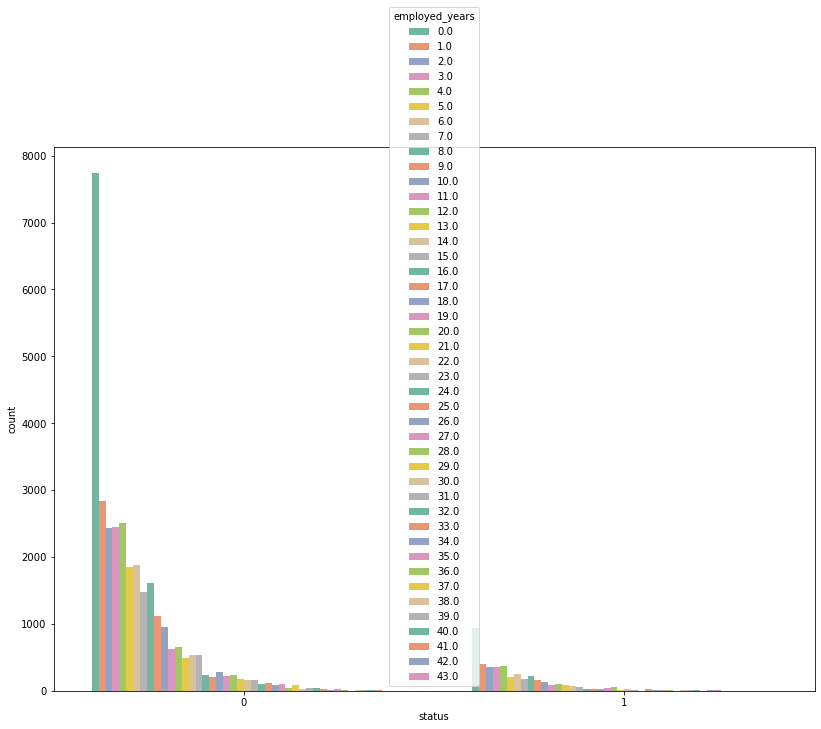

In [220]:
# Plotting both Good and Bad applicants based on Years Employed Bucket 

plt.figure(figsize = (30, 10)) 

plt.subplot(121)
sns.countplot(x = 'status', hue = 'employed_years', data = df_continuous, palette = 'Set2')

# Analysis based on Age + Income  /- Work Exp. + Income 

<Figure size 432x288 with 0 Axes>

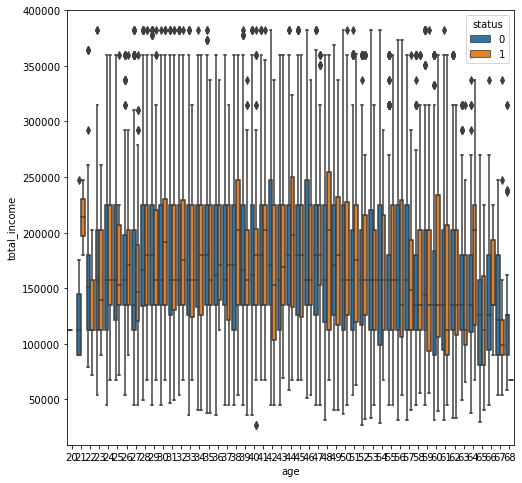

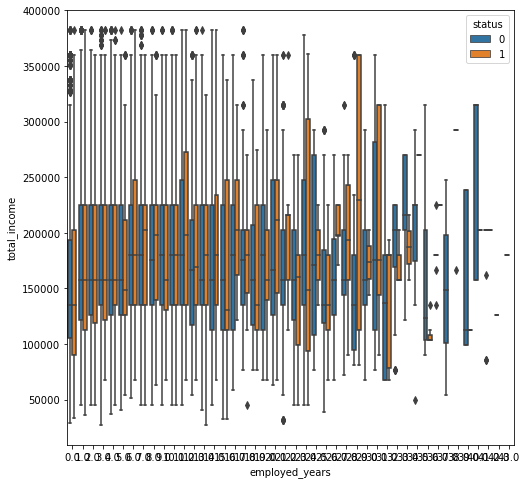

In [221]:


plot_fig = plt.figure()
plt.subplots(figsize = (8, 8))
aei_plot = sns.boxplot(x = "age", y = "total_income", hue = 'status', data = df_continuous[df_continuous.total_income <= 382500])
plt.show()
plt.subplots(figsize = (8, 8))
aei_plot = sns.boxplot(x = "employed_years", y = "total_income", hue = 'status', data = df_continuous[df_continuous.total_income <= 382500])
plt.show()

this chart is not readable - so lets reduce the age by 5 times and years of experience by 5 times to narrow the graph and also income by 5 times

In [222]:
# checking the max and min of total_income

df_continuous['total_income'].describe()

count     36457.0
mean     186685.7
std      101789.2
min       27000.0
25%      121500.0
50%      157500.0
75%      225000.0
max     1575000.0
Name: total_income, dtype: float64

<Figure size 432x288 with 0 Axes>

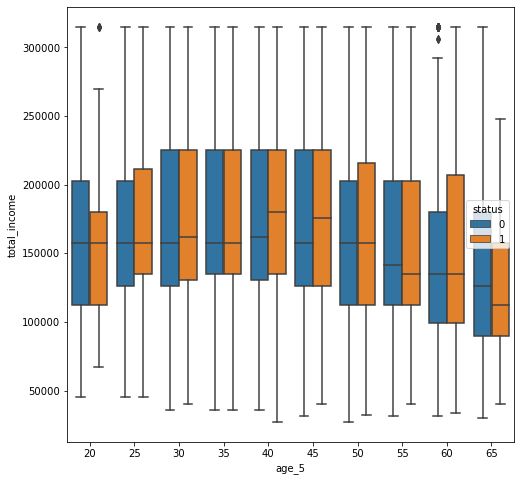

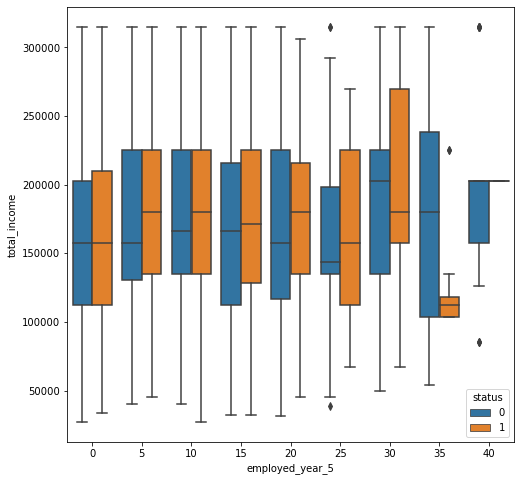

In [223]:
# Plotting a graph with 5 times lesser data point converted

comparison_df = df_continuous.copy()
comparison_df['age_5'] = comparison_df.age.apply(lambda x: int(x / 5) * 5)
comparison_df['employed_year_5'] = comparison_df.employed_years.apply(lambda x: int(x / 5) * 5)

# total income also 1575000 / 5 == 315000


plot_fig = plt.figure()
plt.subplots(figsize = (8, 8))
aei_plot = sns.boxplot(x = "age_5", y = "total_income", hue = 'status', data = comparison_df[comparison_df.total_income <= 320000])
plt.show()
plt.subplots(figsize = (8, 8))
aei_plot = sns.boxplot(x = "employed_year_5", y = "total_income", hue = 'status', data = comparison_df[comparison_df.total_income <= 320000])
plt.show()

Analysis:-

* As figures above, we can know that in terms of age and income rejected applicants are not quite different from 
  approved applicants through the combination of five-number summary in boxplot. 

* However, in terms of age and employed year, applicants with more than 30 years of service are more likely not to be 
  rejected.

# Categorical Features

There are 5 categorical features in a dataset 'continuous_df':-

* income_type              
* education                
* marital_status
* house_type               
* occupation               

In [224]:
# copying the data to another dataset for analysis of categorical variables

categorical_df = Merged_Data_Inner_on_Max_Credit_ID.copy()

# Analysis Based on Income Type

In [225]:
categorical_df.income_type.value_counts()

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: income_type, dtype: int64

In [226]:
pd.crosstab(categorical_df['income_type'], categorical_df['status'], margins = True)

status,0,1,All
income_type,,,
Commercial associate,7410,1080,8490
Pensioner,5508,644,6152
State servant,2600,385,2985
Student,10,1,11
Working,16638,2181,18819
All,32166,4291,36457


In [227]:
pd.crosstab(categorical_df['income_type'], categorical_df['status'], margins = True)

status,0,1,All
income_type,,,
Commercial associate,7410,1080,8490
Pensioner,5508,644,6152
State servant,2600,385,2985
Student,10,1,11
Working,16638,2181,18819
All,32166,4291,36457


In [228]:
# finding income type total 

incometype_total = categorical_df.groupby(by = ['income_type']).size().reset_index(name = 'total')
incometype_total

,income_type,total
0,Commercial associate,8490
1,Pensioner,6152
2,State servant,2985
3,Student,11
4,Working,18819


In [229]:
# finding income type rejected 

incometype_reject = categorical_df[categorical_df.status == 1].groupby(by = ['income_type']).size().reset_index(name = 'reject')
incometype_reject

,income_type,reject
0,Commercial associate,1080
1,Pensioner,644
2,State servant,385
3,Student,1
4,Working,2181


In [230]:
# merging both the datasets

incometype_reject_rate = pd.merge(incometype_total, incometype_reject, how = 'outer', on = ['income_type']).fillna(0)
incometype_reject_rate

,income_type,total,reject
0,Commercial associate,8490,1080
1,Pensioner,6152,644
2,State servant,2985,385
3,Student,11,1
4,Working,18819,2181


In [231]:
# finding income type rejected  %

incometype_reject_rate['reject_rate_percent'] = incometype_reject_rate.reject / incometype_reject_rate.total
incometype_reject_rate

,income_type,total,reject,reject_rate_percent
0,Commercial associate,8490,1080,0.1
1,Pensioner,6152,644,0.1
2,State servant,2985,385,0.1
3,Student,11,1,0.1
4,Working,18819,2181,0.1


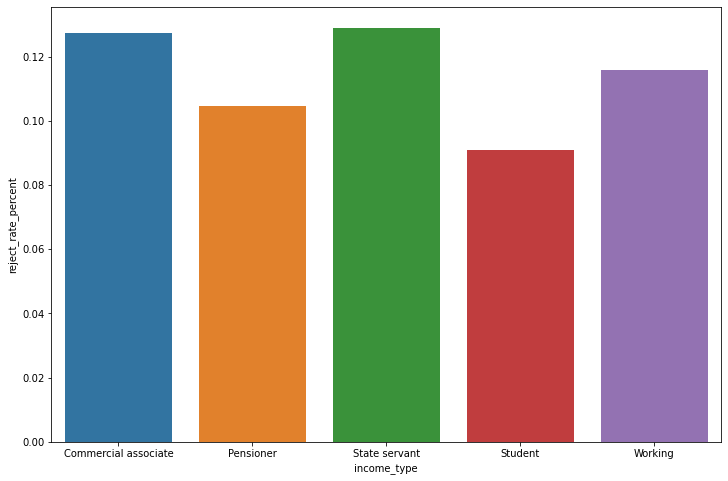

In [232]:
# plotting the Rejection Rate % for Income Type

plt.subplots(figsize = (12, 8))
sns.barplot(x = "income_type", y = "reject_rate_percent", data = incometype_reject_rate)
plt.show()

# Analysis Based on Education

In [233]:
categorical_df.education.value_counts()

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: education, dtype: int64

In [234]:
pd.crosstab(categorical_df['education'], categorical_df['status'], margins = True)

status,0,1,All
education,,,
Academic degree,25,7,32
Higher education,8716,1148,9864
Incomplete higher,1203,207,1410
Lower secondary,335,39,374
Secondary / secondary special,21887,2890,24777
All,32166,4291,36457


In [235]:
# finding total education

education_total = categorical_df.groupby(by = ['education']).size().reset_index(name = 'total')
education_total

,education,total
0,Academic degree,32
1,Higher education,9864
2,Incomplete higher,1410
3,Lower secondary,374
4,Secondary / secondary special,24777


In [236]:
# finding rejected  education category

education_reject = categorical_df[categorical_df.status == 1].groupby(by = ['education']).size().reset_index(name = 'reject')
education_reject

,education,reject
0,Academic degree,7
1,Higher education,1148
2,Incomplete higher,207
3,Lower secondary,39
4,Secondary / secondary special,2890


In [237]:
# merging both the datasets

education_reject_rate = pd.merge(education_total, education_reject, how = 'outer', on = ['education']).fillna(0)
education_reject_rate

,education,total,reject
0,Academic degree,32,7
1,Higher education,9864,1148
2,Incomplete higher,1410,207
3,Lower secondary,374,39
4,Secondary / secondary special,24777,2890


In [238]:
# finding rejected  % of education category

education_reject_rate['reject_rate_percent'] = education_reject_rate.reject / education_reject_rate.total
education_reject_rate

,education,total,reject,reject_rate_percent
0,Academic degree,32,7,0.2
1,Higher education,9864,1148,0.1
2,Incomplete higher,1410,207,0.1
3,Lower secondary,374,39,0.1
4,Secondary / secondary special,24777,2890,0.1


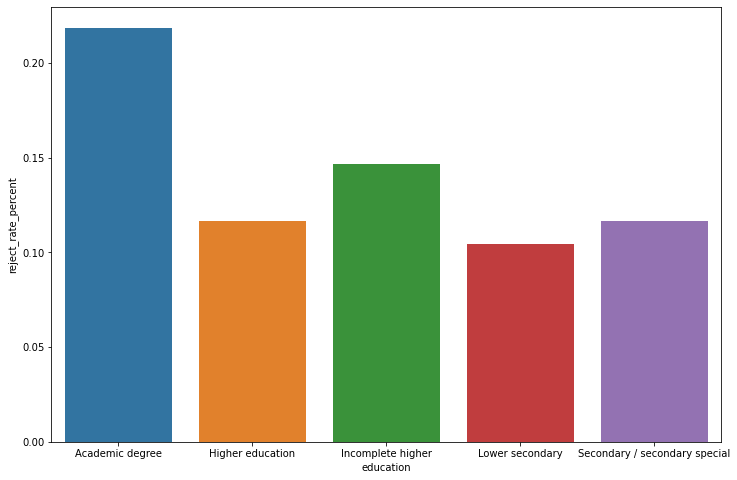

In [239]:
# plotting the rejected  % of education category

plt.subplots(figsize = (12, 8))
sns.barplot(x = "education", y = "reject_rate_percent", data = education_reject_rate)
plt.show()

# Analysis Based on Marital Status

In [240]:
categorical_df.marital_status.value_counts()

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: marital_status, dtype: int64

In [241]:
pd.crosstab(categorical_df['marital_status'], categorical_df['status'], margins = True)

status,0,1,All
marital_status,,,
Civil marriage,2578,367,2945
Married,22134,2914,25048
Separated,1878,225,2103
Single / not married,4206,623,4829
Widow,1370,162,1532
All,32166,4291,36457


In [242]:
# finding marital_status total 

marital_status_total = categorical_df.groupby(by = ['marital_status']).size().reset_index(name = 'total')
marital_status_total

,marital_status,total
0,Civil marriage,2945
1,Married,25048
2,Separated,2103
3,Single / not married,4829
4,Widow,1532


In [243]:
# finding marital_status rejected 

marital_status_reject = categorical_df[categorical_df.status == 1].groupby(by = ['marital_status']).size().reset_index(name = 'reject')
marital_status_reject

,marital_status,reject
0,Civil marriage,367
1,Married,2914
2,Separated,225
3,Single / not married,623
4,Widow,162


In [244]:
# merging both the datasets

marital_status_reject_rate = pd.merge(marital_status_total, marital_status_reject, how = 'outer', on = ['marital_status']).fillna(0)
marital_status_reject_rate

,marital_status,total,reject
0,Civil marriage,2945,367
1,Married,25048,2914
2,Separated,2103,225
3,Single / not married,4829,623
4,Widow,1532,162


In [245]:
# finding marital_status rejected  %

marital_status_reject_rate['reject_rate_percent'] = marital_status_reject_rate.reject / marital_status_reject_rate.total
marital_status_reject_rate

,marital_status,total,reject,reject_rate_percent
0,Civil marriage,2945,367,0.1
1,Married,25048,2914,0.1
2,Separated,2103,225,0.1
3,Single / not married,4829,623,0.1
4,Widow,1532,162,0.1


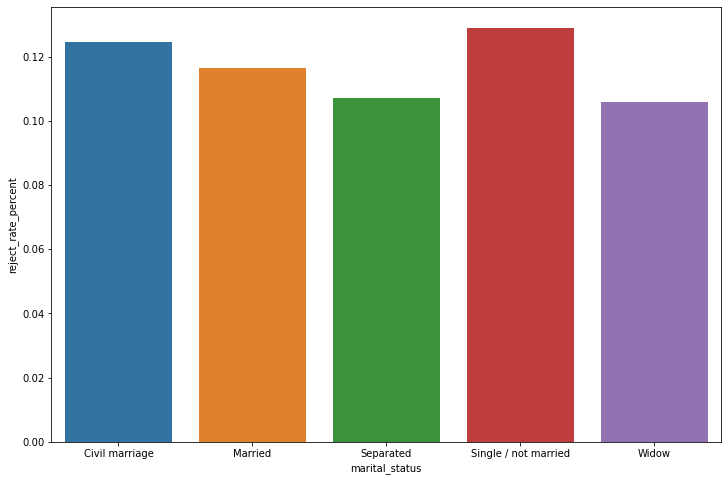

In [246]:
# plotting the Rejection Rate % for marital_status

plt.subplots(figsize = (12, 8))
sns.barplot(x = "marital_status", y = "reject_rate_percent", data = marital_status_reject_rate)
plt.show()

# Analysis Based on House Type

In [247]:
categorical_df.house_type.value_counts()

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: house_type, dtype: int64

In [248]:
pd.crosstab(categorical_df['house_type'], categorical_df['status'], margins = True)

status,0,1,All
house_type,,,
Co-op apartment,154,14,168
House / apartment,28766,3782,32548
Municipal apartment,978,150,1128
Office apartment,224,38,262
Rented apartment,495,80,575
With parents,1549,227,1776
All,32166,4291,36457


In [249]:
# finding house type total 

housetype_total = categorical_df.groupby(by = ['house_type']).size().reset_index(name = 'total')
housetype_total

,house_type,total
0,Co-op apartment,168
1,House / apartment,32548
2,Municipal apartment,1128
3,Office apartment,262
4,Rented apartment,575
5,With parents,1776


In [250]:
# finding house type rejected 

housetype_reject = categorical_df[categorical_df.status == 1].groupby(by = ['house_type']).size().reset_index(name = 'reject')
housetype_reject

,house_type,reject
0,Co-op apartment,14
1,House / apartment,3782
2,Municipal apartment,150
3,Office apartment,38
4,Rented apartment,80
5,With parents,227


In [251]:
# merging both the datasets

housetype_reject_rate = pd.merge(housetype_total, housetype_reject, how = 'outer', on = ['house_type']).fillna(0)
housetype_reject_rate

,house_type,total,reject
0,Co-op apartment,168,14
1,House / apartment,32548,3782
2,Municipal apartment,1128,150
3,Office apartment,262,38
4,Rented apartment,575,80
5,With parents,1776,227


In [252]:
# finding house type rejected  %

housetype_reject_rate['reject_rate_percent'] = housetype_reject_rate.reject / housetype_reject_rate.total
housetype_reject_rate

,house_type,total,reject,reject_rate_percent
0,Co-op apartment,168,14,0.1
1,House / apartment,32548,3782,0.1
2,Municipal apartment,1128,150,0.1
3,Office apartment,262,38,0.1
4,Rented apartment,575,80,0.1
5,With parents,1776,227,0.1


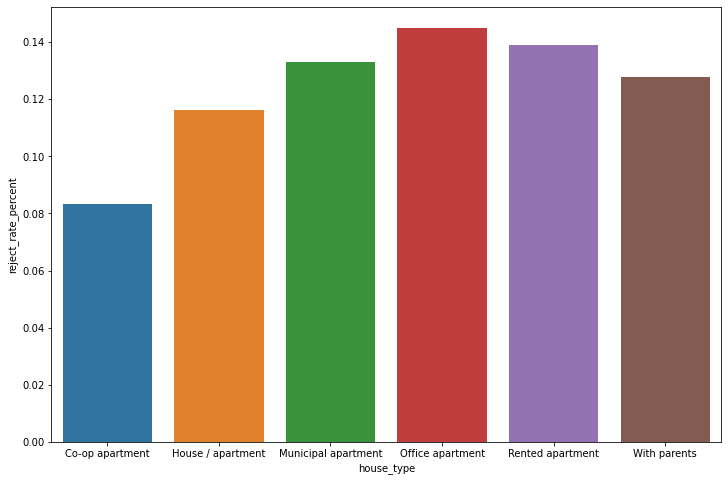

In [253]:
# plotting the Rejection Rate % for house Type

plt.subplots(figsize = (12, 8))
sns.barplot(x = "house_type", y = "reject_rate_percent", data = housetype_reject_rate)
plt.show()

# Analysis Based on Occupation

In [254]:
categorical_df.occupation.value_counts()

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: occupation, dtype: int64

In [255]:
pd.crosstab(categorical_df['occupation'], categorical_df['status'], margins = True)

status,0,1,All
occupation,,,
Accountants,1094,147,1241
Cleaning staff,488,63,551
Cooking staff,569,86,655
Core staff,3128,463,3591
Drivers,1874,264,2138
HR staff,71,14,85
High skill tech staff,1202,181,1383
IT staff,49,11,60
Laborers,5481,730,6211


In [256]:
# finding occupation total 

occupation_total = categorical_df.groupby(by = ['occupation']).size().reset_index(name = 'total')
occupation_total

,occupation,total
0,Accountants,1241
1,Cleaning staff,551
2,Cooking staff,655
3,Core staff,3591
4,Drivers,2138
5,HR staff,85
6,High skill tech staff,1383
7,IT staff,60
8,Laborers,6211
9,Low-skill Laborers,175


In [257]:
# finding occupation rejected 

occupation_reject = categorical_df[categorical_df.status == 1].groupby(by = ['occupation']).size().reset_index(name = 'reject')
occupation_reject

,occupation,reject
0,Accountants,147
1,Cleaning staff,63
2,Cooking staff,86
3,Core staff,463
4,Drivers,264
5,HR staff,14
6,High skill tech staff,181
7,IT staff,11
8,Laborers,730
9,Low-skill Laborers,33


In [258]:
# merging both the datasets

occupation_reject_rate = pd.merge(occupation_total, occupation_reject, how = 'outer', on = ['occupation']).fillna(0)
occupation_reject_rate

,occupation,total,reject
0,Accountants,1241,147
1,Cleaning staff,551,63
2,Cooking staff,655,86
3,Core staff,3591,463
4,Drivers,2138,264
5,HR staff,85,14
6,High skill tech staff,1383,181
7,IT staff,60,11
8,Laborers,6211,730
9,Low-skill Laborers,175,33


In [259]:
# finding occupation rejected  %

occupation_reject_rate['reject_rate_percent'] = occupation_reject_rate.reject / occupation_reject_rate.total
occupation_reject_rate

,occupation,total,reject,reject_rate_percent
0,Accountants,1241,147,0.1
1,Cleaning staff,551,63,0.1
2,Cooking staff,655,86,0.1
3,Core staff,3591,463,0.1
4,Drivers,2138,264,0.1
5,HR staff,85,14,0.2
6,High skill tech staff,1383,181,0.1
7,IT staff,60,11,0.2
8,Laborers,6211,730,0.1
9,Low-skill Laborers,175,33,0.2


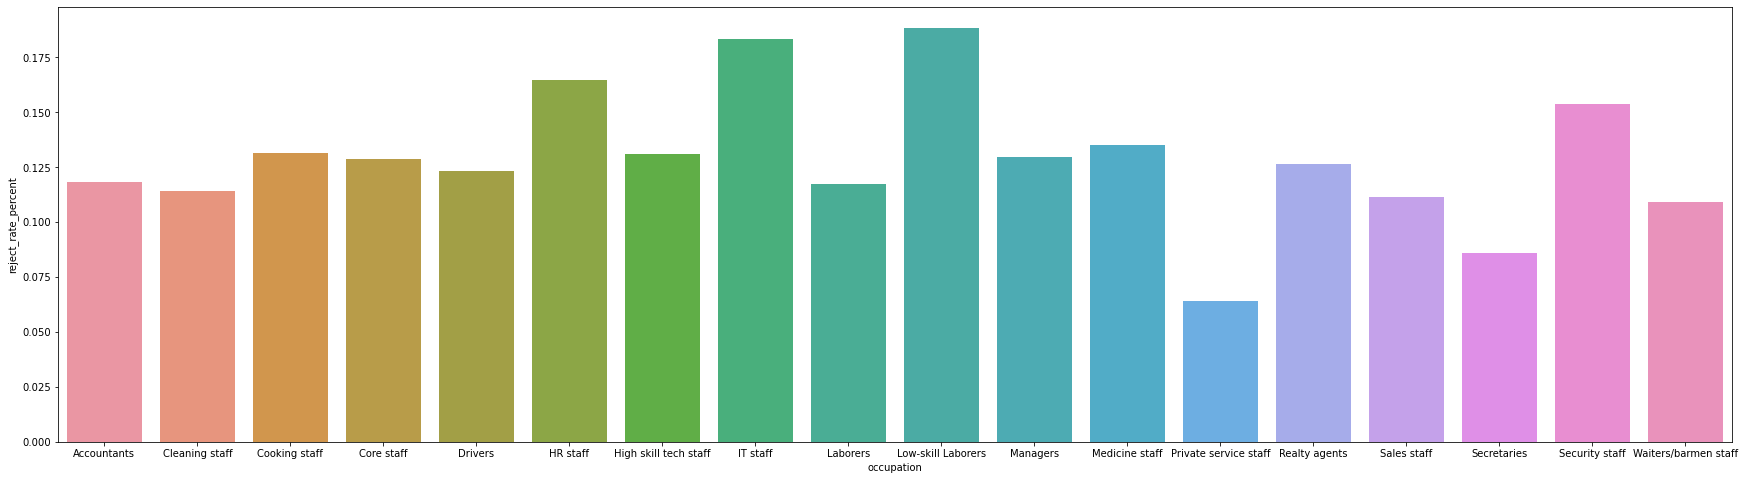

In [260]:
# plotting the Rejection Rate % for Income Type

plt.subplots(figsize = (30, 8))
sns.barplot(x = "occupation", y = "reject_rate_percent", data = occupation_reject_rate)
plt.show()

In [261]:
# checking if null records are there 

categorical_df.isnull().sum()

ID                    0
gender                0
own_car               0
own_property          0
kids                  0
total_income          0
income_type           0
education             0
marital_status        0
house_type            0
dob                   0
work_exp              0
work_phone            0
phone                 0
email                 0
occupation        11323
family_members        0
status                0
income_bucket         0
age                   0
age_bucket            0
employed_years        0
dtype: int64

but checking the null/missing shows 11k records having null occupation type

In [262]:
categorical_df["income_type"].value_counts()

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: income_type, dtype: int64

Lets populate the blank "occupation" with "Retired" when "income_type = Pensioner" & "years of experience = 0"

In [263]:
categorical_df['occupation']  =  np.where((categorical_df['income_type'] == 'Pensioner') & (categorical_df['employed_years'] == 0), 'Retired', categorical_df['occupation'])

In [264]:
# so now Retired is populated for such blank records

categorical_df['occupation'] .value_counts()

Laborers                 6210
Retired                  6136
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: occupation, dtype: int64

In [265]:
# checking if null records are there still

categorical_df.isnull().sum()

ID                   0
gender               0
own_car              0
own_property         0
kids                 0
total_income         0
income_type          0
education            0
marital_status       0
house_type           0
dob                  0
work_exp             0
work_phone           0
phone                0
email                0
occupation        5188
family_members       0
status               0
income_bucket        0
age                  0
age_bucket           0
employed_years       0
dtype: int64

another 5k records still blank

In [266]:
# so will populate them as "Others"

categorical_df['occupation'] = categorical_df['occupation'].fillna("Others")

# Running the above Plot again

In [267]:
# finding occupation total 

occupation_total = categorical_df.groupby(by = ['occupation']).size().reset_index(name = 'total')
occupation_total

,occupation,total
0,Accountants,1241
1,Cleaning staff,551
2,Cooking staff,655
3,Core staff,3591
4,Drivers,2138
5,HR staff,85
6,High skill tech staff,1383
7,IT staff,60
8,Laborers,6210
9,Low-skill Laborers,175


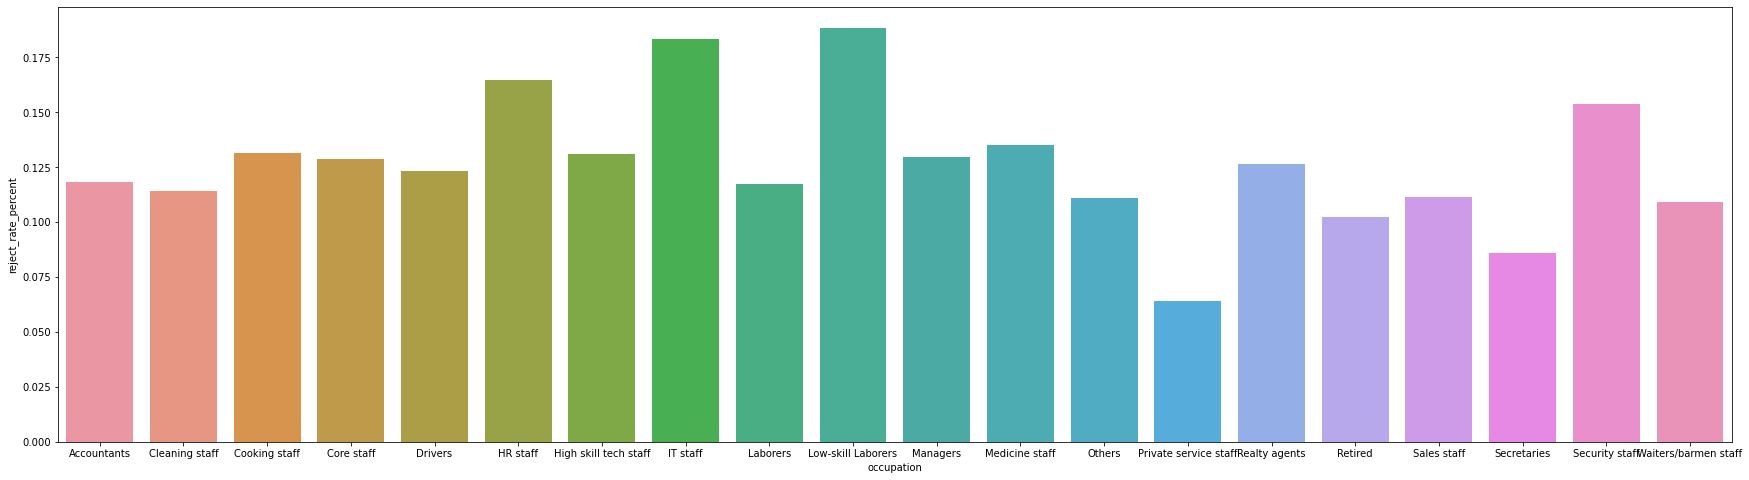

In [268]:
# finding occupation rejected 

occupation_reject = categorical_df[categorical_df.status == 1].groupby(by = ['occupation']).size().reset_index(name = 'reject')
occupation_reject

# merging both the datasets

occupation_reject_rate = pd.merge(occupation_total, occupation_reject, how = 'outer', on = ['occupation']).fillna(0)
occupation_reject_rate


# finding occupation rejected  %

occupation_reject_rate['reject_rate_percent'] = occupation_reject_rate.reject / occupation_reject_rate.total
occupation_reject_rate




# plotting the Rejection Rate % for Income Type

plt.subplots(figsize = (30, 8))
sns.barplot(x = "occupation", y = "reject_rate_percent", data = occupation_reject_rate)
plt.show()


# Populating/Filling Missing Values in the Merged Data Set (original)

In [269]:
Merged_Data_Inner_on_Max_Credit_ID.isnull().sum()

ID                    0
gender                0
own_car               0
own_property          0
kids                  0
total_income          0
income_type           0
education             0
marital_status        0
house_type            0
dob                   0
work_exp              0
work_phone            0
phone                 0
email                 0
occupation        11323
family_members        0
status                0
income_bucket         0
age                   0
age_bucket            0
employed_years        0
dtype: int64

In [270]:
# Populating/Filling Missing Values in the Merged Data Set (original)

Merged_Data_Inner_on_Max_Credit_ID['occupation']  =  np.where((Merged_Data_Inner_on_Max_Credit_ID['income_type'] == 'Pensioner') & (Merged_Data_Inner_on_Max_Credit_ID['employed_years'] == 0), 'Retired', Merged_Data_Inner_on_Max_Credit_ID['occupation'])


Merged_Data_Inner_on_Max_Credit_ID['occupation'] = Merged_Data_Inner_on_Max_Credit_ID['occupation'].fillna("Others")

print(Merged_Data_Inner_on_Max_Credit_ID.isnull().sum())

ID                0
gender            0
own_car           0
own_property      0
kids              0
total_income      0
income_type       0
education         0
marital_status    0
house_type        0
dob               0
work_exp          0
work_phone        0
phone             0
email             0
occupation        0
family_members    0
status            0
income_bucket     0
age               0
age_bucket        0
employed_years    0
dtype: int64


# end of EDA

# Doing NLP   / Word Cloud on Categorical Variables  (Fun Learning)

In [271]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS, ImageColorGenerator

nlp_df = Merged_Data_Inner_on_Max_Credit_ID.copy()

In [272]:
nlp_df.nunique()

ID                36457
gender                2
own_car               2
own_property          2
kids                  9
total_income        265
income_type           5
education             5
marital_status        5
house_type            6
dob                7183
work_exp           3640
work_phone            2
phone                 2
email                 2
occupation           20
family_members       10
status                2
income_bucket         5
age                  49
age_bucket            4
employed_years       44
dtype: int64

We have 5 Categorical variables on which we can identify and which will be good for a WordCloud

income_type

occupation

marital_status

education


In [273]:
nlp_df.nunique()

ID                36457
gender                2
own_car               2
own_property          2
kids                  9
total_income        265
income_type           5
education             5
marital_status        5
house_type            6
dob                7183
work_exp           3640
work_phone            2
phone                 2
email                 2
occupation           20
family_members       10
status                2
income_bucket         5
age                  49
age_bucket            4
employed_years       44
dtype: int64

In [274]:
income_word_cloud = []
for t in nlp_df['income_type']:   
    income_word_cloud.append(t)

In [275]:
# Preparing the Word Cloud for Income Type

# income_word_cloud = nlp_df['income_type']

In [276]:
income_word_cloud

['Working',
 'Working',
 'Working',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Pensioner',
 'Pensioner',
 'Pensioner',
 'Working',
 'Working',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Working',
 'Working',
 'Working',
 'Working',
 'Working',
 'Working',
 'Working',
 'Working',
 'Working',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Commercial associate',
 'Working',
 'Working',
 'Working',
 'Working',
 'Working',
 'Working',
 'Working',
 'Working',
 'Working',
 'Working',
 'Working',
 'Working',
 'Working',
 'Working',
 'Working',
 'State se

In [277]:
pos_text = pd.Series(income_word_cloud).str.cat(sep = ' ')

(-0.5, 1599.5, 799.5, -0.5)

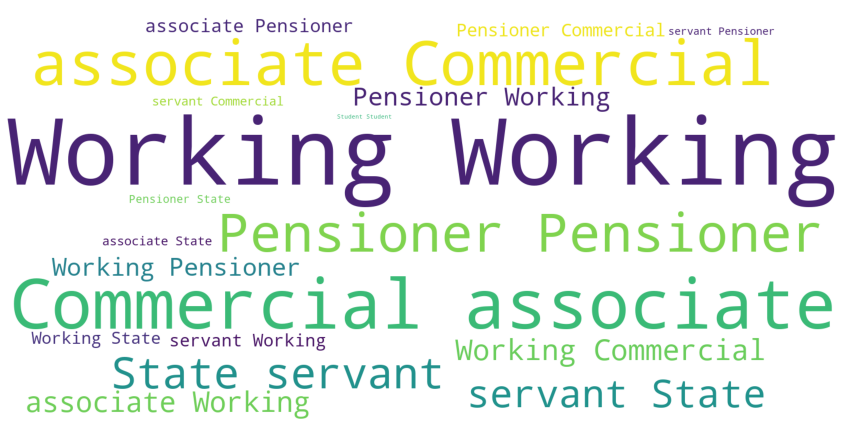

In [278]:
# Generating a WordCloud  plot for the Income Type 

income_wordcloud = WordCloud(width = 1600, height = 800, max_font_size = 200, background_color = 'white').generate(pos_text)

plt.figure(figsize=(15,15))
plt.imshow(income_wordcloud)
plt.axis("off")

# Here Words are repeating - to avoid it and show Unique words - use "collocations = False" as below

(-0.5, 1599.5, 799.5, -0.5)

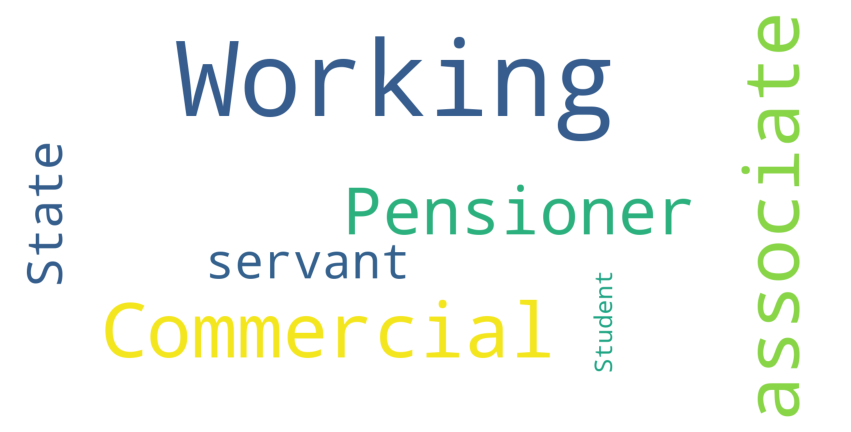

In [279]:
# Generating a WordCloud  plot for the Income Type 

income_wordcloud = WordCloud(collocations = False, width = 1600, height = 800, max_font_size = 200, background_color = 'white').generate(pos_text)

plt.figure(figsize=(15,15))
plt.imshow(income_wordcloud)
plt.axis("off")

In [280]:
# Preparing the Word Cloud for occupation

occupation_word_cloud = []
for t in nlp_df['occupation']:   
    occupation_word_cloud.append(t)

In [281]:
nlp_df['occupation'].value_counts()

Laborers                 6210
Retired                  6136
Others                   5188
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: occupation, dtype: int64

In [282]:
pos_text_occu = pd.Series(occupation_word_cloud).str.cat(sep = ' ')

(-0.5, 1599.5, 799.5, -0.5)

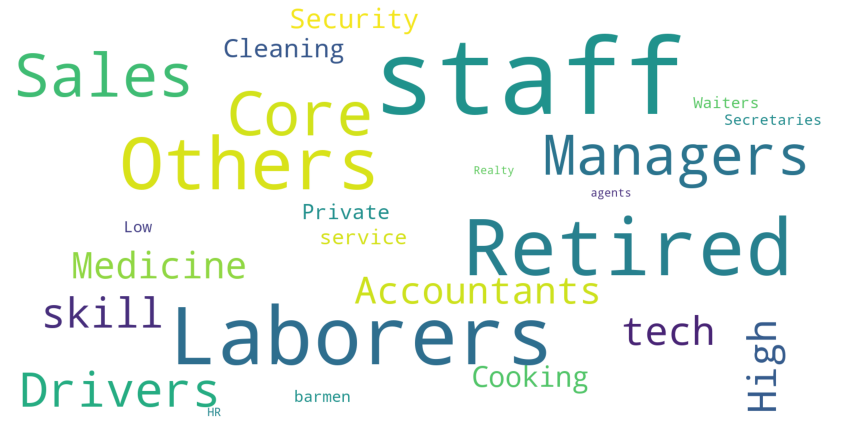

In [283]:
# Generating a WordCloud  plot for the Occupation

occupation_word_cloud = WordCloud(collocations = False, width = 1600, height = 800, max_font_size = 200, background_color = 'white').generate(pos_text_occu)

plt.figure(figsize=(15,15))
plt.imshow(occupation_word_cloud)
plt.axis("off")

In [284]:
# Preparing the Word Cloud for marital_status

marital_status_word_cloud = []
for t in nlp_df['marital_status']:   
    marital_status_word_cloud.append(t)

In [285]:
pos_text_marital_status = pd.Series(marital_status_word_cloud).str.cat(sep = ' ')

(-0.5, 1599.5, 799.5, -0.5)

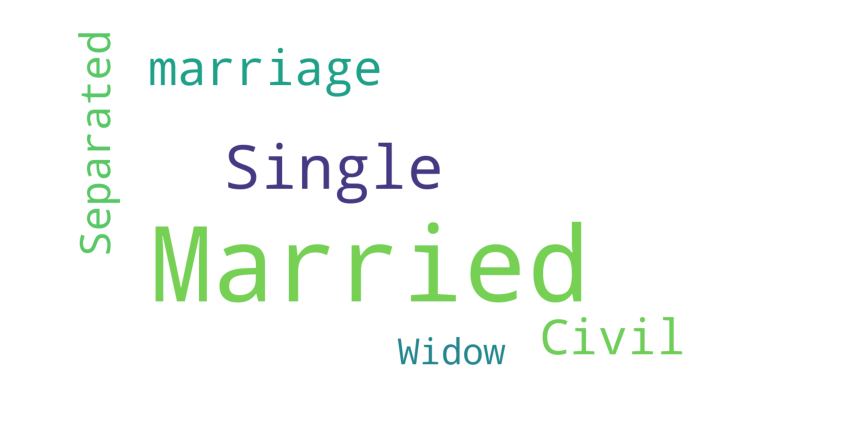

In [286]:
# Generating a WordCloud  plot for the Marital Status

marital_status_word_cloud = WordCloud(collocations = False, width = 1600, height = 800, max_font_size = 200, background_color = 'white').generate(pos_text_marital_status)

plt.figure(figsize=(15,15))
plt.imshow(marital_status_word_cloud)
plt.axis("off")

In [287]:
# Preparing the Word Cloud for education

education_word_cloud = []
for t in nlp_df['education']:   
    education_word_cloud.append(t)

In [288]:
pos_text_education = pd.Series(education_word_cloud).str.cat(sep = ' ')

(-0.5, 1599.5, 799.5, -0.5)

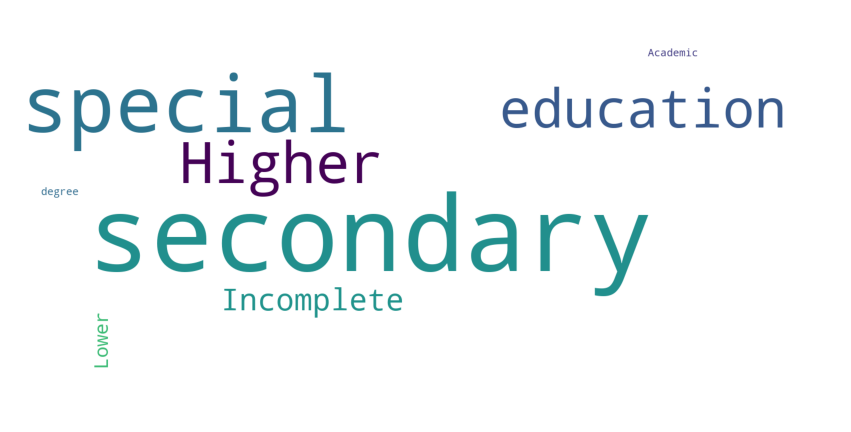

In [289]:
# Generating a WordCloud  plot for the Education

education_word_cloud = WordCloud(collocations = False, width = 1600, height = 800, max_font_size = 200, background_color = 'white').generate(pos_text_education)

plt.figure(figsize=(15,15))
plt.imshow(education_word_cloud)
plt.axis("off")

In [290]:
# Preparing the Word Cloud for housing type

house_type_word_cloud = []
for t in nlp_df['house_type']:   
    house_type_word_cloud.append(t)

In [291]:
pos_text_house_type = pd.Series(house_type_word_cloud).str.cat(sep = ' ')

(-0.5, 1599.5, 799.5, -0.5)

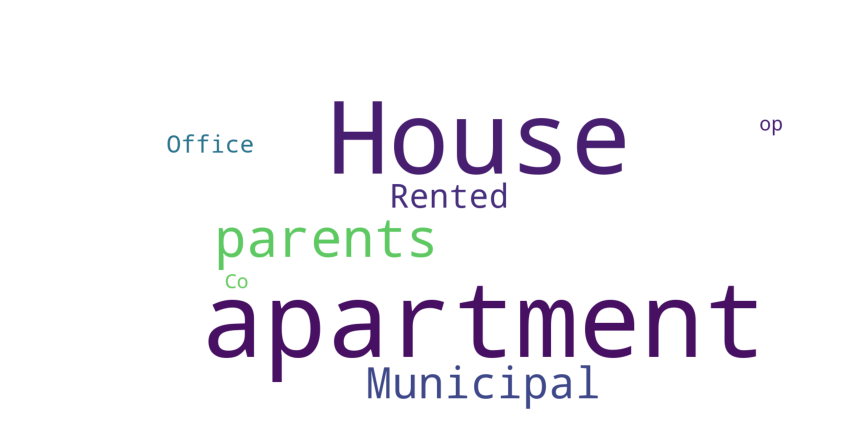

In [292]:
# Generating a WordCloud  plot for the housing Type 

house_type_word_cloud = WordCloud(collocations = False, width = 1600, height = 800, max_font_size = 200, background_color = 'white').generate(pos_text_house_type)

plt.figure(figsize=(15,15))
plt.imshow(house_type_word_cloud)
plt.axis("off")

# End of NLP

# Correlation Matrix on the Cleaned Data Set after - EDA

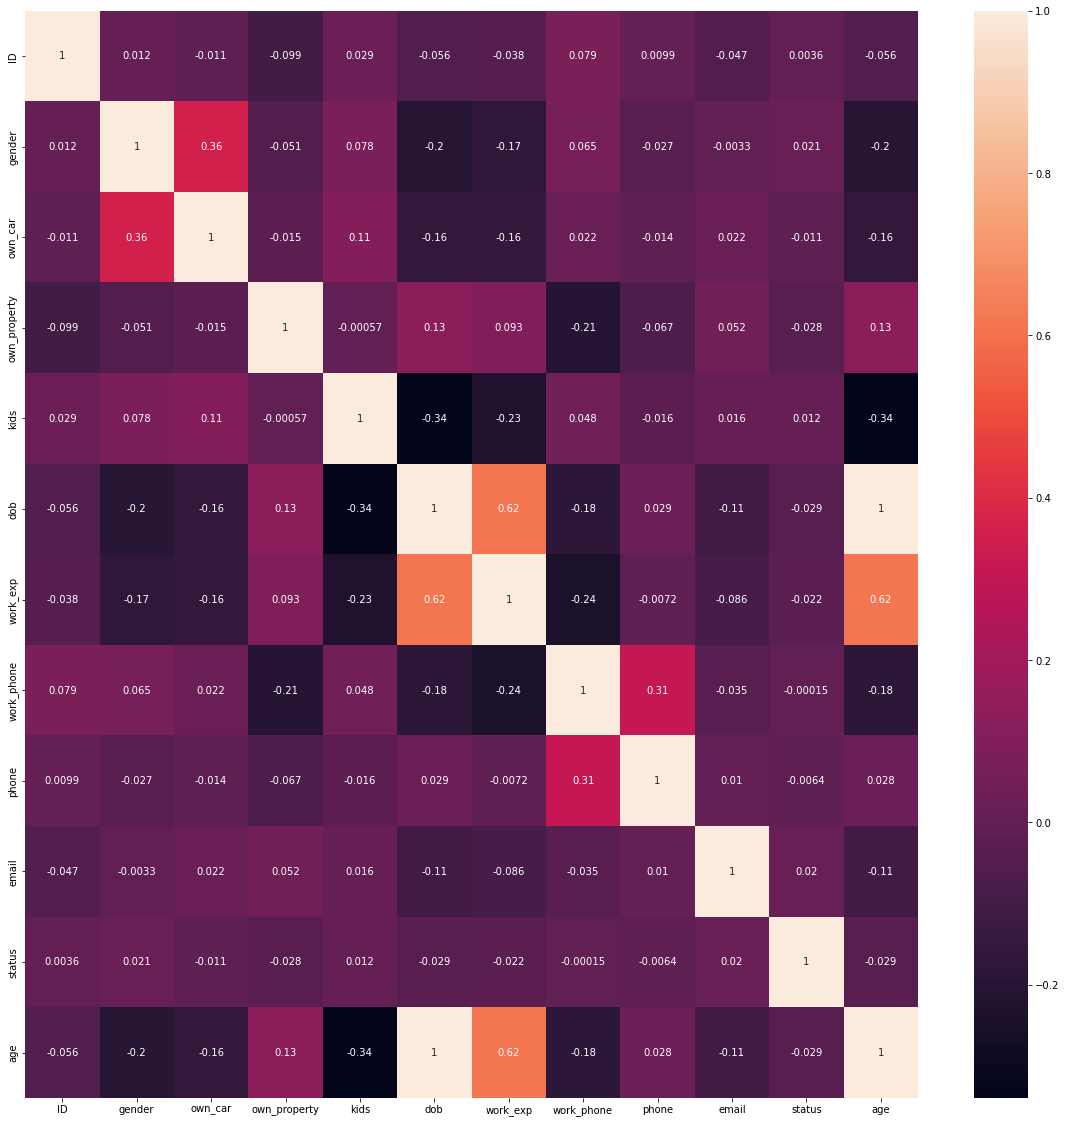

In [293]:
# HeatMap  /  Correlation Matrix  for a Visual Representation of Correlation

plt.figure(figsize=(20, 20))
sns.heatmap(
            Merged_Data_Inner_on_Max_Credit_ID.select_dtypes(['object' , 'int']).corr()  ,
            annot = True
           )
plt.show()

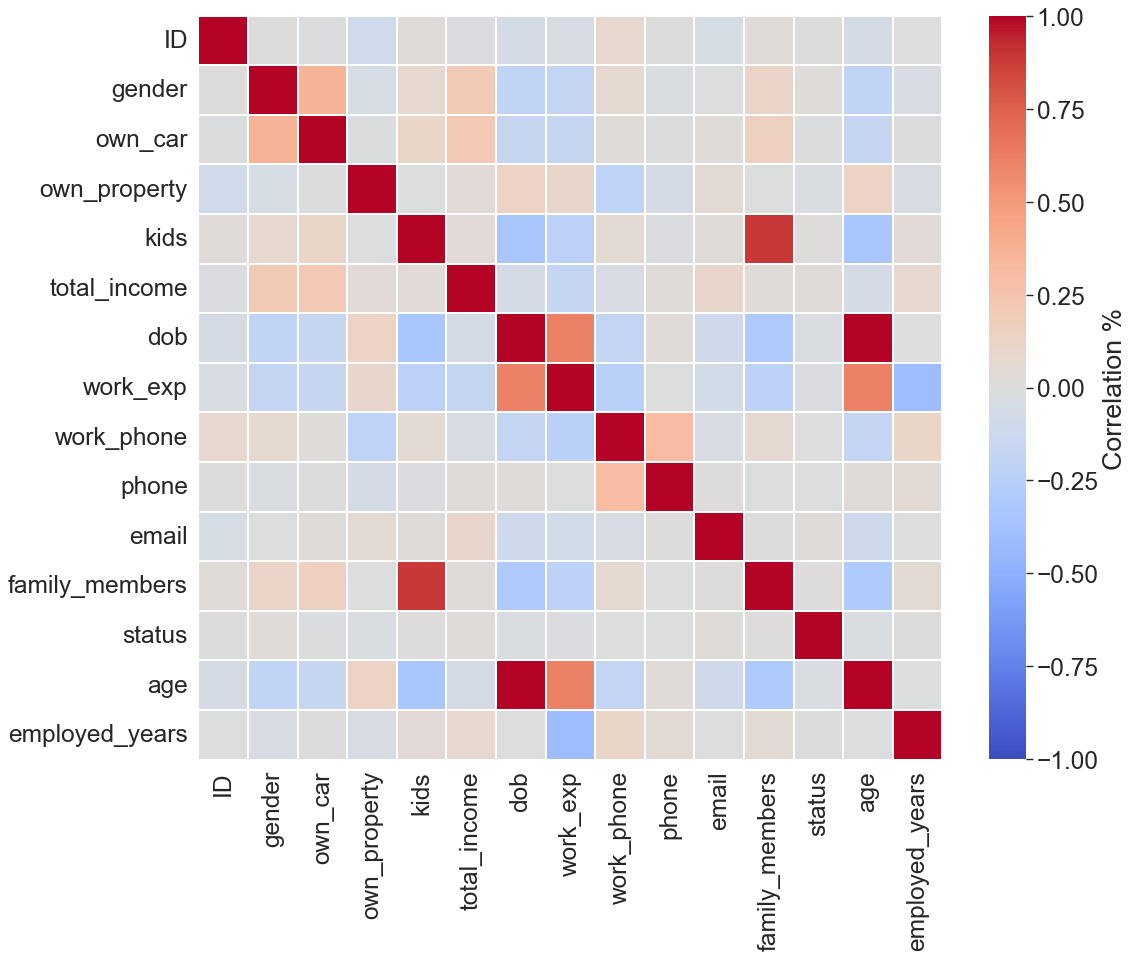

In [294]:
# HeatMap  /  Correlation Matrix  for a Visual Representation of Correlation

plt.figure(figsize = (15, 15), dpi = 80, facecolor = 'white', edgecolor = 'k')
sns.set(font_scale = 2)

sns.heatmap(
                 categorical_df.corr() ,  vmin = -1, vmax = 1, cmap = 'coolwarm', fmt = '.2f', 
                 cbar_kws = {"shrink": .82, 'label': 'Correlation %'},
                 annot_kws = {"size": 18}, linewidths = 0.1, linecolor = 'white', square = True
            )
plt.show()

# Label Encoding  - like Hot Encoding to convert Categorical/Object values to Numerical Format

In [295]:
Merged_Data_Inner_on_Max_Credit_ID.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              36457 non-null  int64   
 1   gender          36457 non-null  int64   
 2   own_car         36457 non-null  int64   
 3   own_property    36457 non-null  int64   
 4   kids            36457 non-null  int64   
 5   total_income    36457 non-null  float64 
 6   income_type     36457 non-null  object  
 7   education       36457 non-null  object  
 8   marital_status  36457 non-null  object  
 9   house_type      36457 non-null  object  
 10  dob             36457 non-null  int64   
 11  work_exp        36457 non-null  int64   
 12  work_phone      36457 non-null  int64   
 13  phone           36457 non-null  int64   
 14  email           36457 non-null  int64   
 15  occupation      36457 non-null  object  
 16  family_members  36457 non-null  float64 
 17  status      

In [296]:
# let create another sample of Merge Data to apply encoding - since the earlier dataset was converted to int

encoding_df = Merged_Data_Inner_on_Max_Credit_ID.copy()

In [297]:
encoding_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              36457 non-null  int64   
 1   gender          36457 non-null  int64   
 2   own_car         36457 non-null  int64   
 3   own_property    36457 non-null  int64   
 4   kids            36457 non-null  int64   
 5   total_income    36457 non-null  float64 
 6   income_type     36457 non-null  object  
 7   education       36457 non-null  object  
 8   marital_status  36457 non-null  object  
 9   house_type      36457 non-null  object  
 10  dob             36457 non-null  int64   
 11  work_exp        36457 non-null  int64   
 12  work_phone      36457 non-null  int64   
 13  phone           36457 non-null  int64   
 14  email           36457 non-null  int64   
 15  occupation      36457 non-null  object  
 16  family_members  36457 non-null  float64 
 17  status      

In [298]:
# Convert the CATEGORY datatype variables to object datatypes

encoding_df['age_bucket'] = encoding_df['age_bucket'].astype('object')

In [299]:
# Dropping the columns/variables which hold similar type of data (might be created during EDA phase)
    ####  dob as age_bucket is there,   work_exp as employed_years is there 
# Dropping the ID field as that contains serial number values 

encoding_df = encoding_df.drop(['ID',  'age','dob','work_exp'], axis = 1)

In [300]:
encoding_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          36457 non-null  int64  
 1   own_car         36457 non-null  int64  
 2   own_property    36457 non-null  int64  
 3   kids            36457 non-null  int64  
 4   total_income    36457 non-null  float64
 5   income_type     36457 non-null  object 
 6   education       36457 non-null  object 
 7   marital_status  36457 non-null  object 
 8   house_type      36457 non-null  object 
 9   work_phone      36457 non-null  int64  
 10  phone           36457 non-null  int64  
 11  email           36457 non-null  int64  
 12  occupation      36457 non-null  object 
 13  family_members  36457 non-null  float64
 14  status          36457 non-null  int64  
 15  income_bucket   36457 non-null  object 
 16  age_bucket      36457 non-null  object 
 17  employed_years  36457 non-null 

In [367]:
encoding_df.head(5)

,gender,own_car,own_property,kids,total_income,income_type,education,marital_status,house_type,work_phone,phone,email,occupation,family_members,status,income_bucket,age_bucket,employed_years
0,1,1,1,0,427500.0,4,1,0,4,1,0,0,12,2.0,1,3,3,12.0
1,1,1,1,0,427500.0,4,1,0,4,1,0,0,12,2.0,1,3,3,12.0
2,1,1,1,0,112500.0,4,4,1,1,0,0,0,18,2.0,0,1,0,3.0
3,0,0,1,0,270000.0,0,4,3,1,0,1,1,16,1.0,0,3,0,8.0
4,0,0,1,0,270000.0,0,4,3,1,0,1,1,16,1.0,0,3,0,8.0


In [302]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in encoding_df:
    if encoding_df[x].dtypes == 'object':
        encoding_df[x] = le.fit_transform(encoding_df[x])

In [303]:
encoding_df.head(5)

,gender,own_car,own_property,kids,total_income,income_type,education,marital_status,house_type,work_phone,phone,email,occupation,family_members,status,income_bucket,age_bucket,employed_years
0,1,1,1,0,427500.0,4,1,0,4,1,0,0,12,2.0,1,3,3,12.0
1,1,1,1,0,427500.0,4,1,0,4,1,0,0,12,2.0,1,3,3,12.0
2,1,1,1,0,112500.0,4,4,1,1,0,0,0,18,2.0,0,1,0,3.0
3,0,0,1,0,270000.0,0,4,3,1,0,1,1,16,1.0,0,3,0,8.0
4,0,0,1,0,270000.0,0,4,3,1,0,1,1,16,1.0,0,3,0,8.0


# Model Building

In [304]:
model1_df = encoding_df.copy()

In [305]:
# Seperate the STATUS field as that will be used for Prediction

X1 = model1_df.drop(['status'], axis = 1)

In [306]:
X1.head()

,gender,own_car,own_property,kids,total_income,income_type,education,marital_status,house_type,work_phone,phone,email,occupation,family_members,income_bucket,age_bucket,employed_years
0,1,1,1,0,427500.0,4,1,0,4,1,0,0,12,2.0,3,3,12.0
1,1,1,1,0,427500.0,4,1,0,4,1,0,0,12,2.0,3,3,12.0
2,1,1,1,0,112500.0,4,4,1,1,0,0,0,18,2.0,1,0,3.0
3,0,0,1,0,270000.0,0,4,3,1,0,1,1,16,1.0,3,0,8.0
4,0,0,1,0,270000.0,0,4,3,1,0,1,1,16,1.0,3,0,8.0


In [307]:
Y1 = model1_df['status']

# Splitting the Dataset to Train & Test

In [308]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1 , Y1, test_size = 0.3)

In [309]:
# Checking shape of Train & Test Dataset

print("Shape of X1_train: ",X1_train.shape)
print("Shape of X1_test: ", X1_test.shape)
print("Shape of Y1_train: ",Y1_train.shape)
print("Shape of Y1_test",Y1_test.shape)

Shape of X1_train:  (25519, 17)
Shape of X1_test:  (10938, 17)
Shape of Y1_train:  (25519,)
Shape of Y1_test (10938,)


# Scaling the Data - Based on MinMaxScaler()  ie 0 or 1  (Normalization)

In [372]:
# We have now fit and transform the data into a scaler for accurate reading and results.

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X1_train), columns = X1_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X1_test), columns = X1_test.columns)

# Scaling the Data - Based on StandardScaler() ie (Standardization) : 0 represents Mean, 1 represents Standard Deviation

In [373]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing

X2 = model1_df.drop(['status'], axis = 1)
Y2 = model1_df['status']


X2 = preprocessing.StandardScaler().fit(X2).transform(X2.astype(float))

# Re-Sampling using Various Techniques like (SMOTE, ADASYN, SMOTE + Tomek, SMOTE + ENN)

# Handling imbalance data using various techniques

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. 

There are broadly two types of methods for this 

i) Undersampling 

ii) Oversampling. 


In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information

# SMOTE Oversampling technique

In [310]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [311]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


# Importing all Libraries of Balancing/Re-Sampling Techniques

In [374]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# SMOTE Oversampling technique

In [465]:
from numpy import where

In [480]:
# SMOTE Oversampling technique  on Z-Scaled Data

oversample = SMOTE()
X_smt_minmax_scal_balanced, Y_smt_minmax_scal_balanced = oversample.fit_resample(X_scaled, Y1_train)
X_test_smt_minmax_scal_balanced, Y_test_smt_minmax_scal_balanced = oversample.fit_resample(X_test_scaled, Y1_test)

# checking SMOTE Oversampling technique


counter = Counter(Y1_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(X1_train, Y1_train)

counter = Counter(y_train_sm)
print('After',counter)


'''
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_train_sm == label)[0]
    plt.scatter(x_train_sm[row_ix, 0], x_train_sm[row_ix, 1], label=str(label))
plt.legend()
plt.show()
'''
'''
plt.scatter(X1_train, Y1_train)
plt.show()
'''


Before Counter({0: 22502, 1: 3017})
After Counter({0: 22502, 1: 22502})


'\nplt.scatter(X1_train, Y1_train)\nplt.show()\n'

# ADASYN Oversampling technique (Adaptive Synthetic Sampling Approach)

In [384]:
# ADASYN Oversampling technique
# ADASYN is a generalized form of the SMOTE algorithm


counter = Counter(Y1_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(X1_train, Y1_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 22502, 1: 3017})
After Counter({1: 23211, 0: 22502})


# SMOTE + Tomek Links Sampling Techniques

In [386]:
# SMOTE + Tomek Links technique



counter = Counter(Y1_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(X1_train, Y1_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 22502, 1: 3017})
After Counter({0: 22477, 1: 22477})


# Hybridization: SMOTE + ENN Technique

In [387]:
# Hybridization: SMOTE + ENN Technique

counter = Counter(Y1_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(X1_train, Y1_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 22502, 1: 3017})
After Counter({0: 16757, 1: 13802})


# Plotting how different SMOTE based resampling techniques work out to deal with imbalanced data.

# Confusion Matrix / Performance Analysis after Resampling across all the Techniques

In [389]:
# defining all the various Re-Sampling Variables into a collection to run together

sampled_data = {
    'ACTUAL':[X1_train, Y1_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}

In [449]:
# function to apply the models

def test_eval(clf_model, X1_test, Y1_test, algo=None, sampling=None):

# Test set prediction

    Y1_prob=clf_model.predict_proba(X1_test)
    Y1_pred=clf_model.predict(X1_test)

    
    
    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)  
    #plt.show() 
    print(confusion_matrix(Y1_test,Y1_pred),"\n")
    
    #cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    #cm_display.plot()
    #plt.show()
    
    print('Classification Report')
    print('='*60)
    print(classification_report(Y1_test,Y1_pred),"\n")
    
    #print('AUC-ROC')
    #print('='*60)
    #print(roc_auc_score(y_test, y_prob[:,1], multi_class='ovo'))
    
    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(Y1_test, Y1_pred, average='micro')
    recall = recall_score(Y1_test, Y1_pred, average='micro')
    precision = precision_score(Y1_test, Y1_pred, average='micro')
          
   

    return algo,precision,recall,f1,sampling

In [450]:
model_params = {

    'random-forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
             "n_estimators": [5, 10, 15, 20, 25], 
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt', 'auto']

         }
    }
}

In [451]:
# Importing Lirbaries for Confusion Matrix & StratifiedKFold

In [452]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

In [453]:
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, X1_test, Y1_test, model, resam))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
random-forest with ACTUAL
Confusion Matrix
[[9651   13]
 [1236   38]] 

Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9664
           1       0.75      0.03      0.06      1274

    accuracy                           0.89     10938
   macro avg       0.82      0.51      0.50     10938
weighted avg       0.87      0.89      0.84     10938
 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
random-forest with SMOTE
Confusion Matrix
[[8434 1230]
 [ 773  501]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      9664
           1       0.29      0.39      0.33      1274

    accuracy                           0.82     10938
   macro avg       0.60      0.63      0.61     10938
weighted avg       0.84      0.82      0.83     10938
 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [463]:
# if want to plot the Confusion Matrix below code can be used
'''
actual = np.random.binomial(1, 0.9, size = 500)
predicted = np.random.binomial(1, 0.9, size = 500)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

'''

'\nactual = np.random.binomial(1, 0.9, size = 500)\npredicted = np.random.binomial(1, 0.9, size = 500)\nconfusion_matrix = metrics.confusion_matrix(actual, predicted)\ncm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])\ncm_display.plot()\nplt.show()\n\n'

What is Confusion Matrix and why you need it?

Well, it is a performance measurement
It is extremely useful for measuring Recall, Precision, Specificity, Accuracy, and most importantly AUC-ROC curves.

Let’s understand TP, FP, FN, TN in terms of pregnancy analogy.(where a Woman is Pregnant and goes to Doctor to Find it)


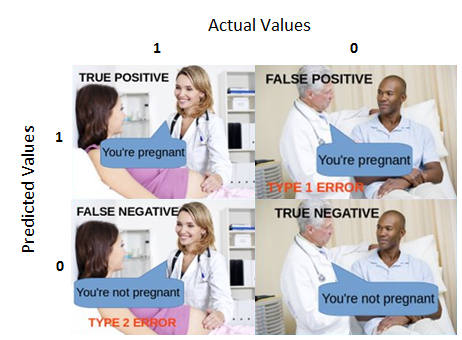


True Positive:

    Interpretation: You predicted positive and it’s true.

    You predicted that a woman is pregnant and she actually is.

True Negative:

    Interpretation: You predicted negative and it’s true.

    You predicted that a man is not pregnant and he actually is not.

False Positive: (Type 1 Error)

    Interpretation: You predicted positive and it’s false.

    You predicted that a man is pregnant but he actually is not.

False Negative: (Type 2 Error)

    Interpretation: You predicted negative and it’s false.

    You predicted that a woman is not pregnant but she actually is.
    

Recall   >>>  Recall should be high as possible.    

                   TP
    Recall =  -----------
                TP + FN


Precision   >>>  Precision should be high as possible.    

                   TP
    Precision =  -----------
                TP + FP
                
                
Accuracy   >>>  Accuracy should be high as possible.     From all the classes (positive and negative), how many of them we have predicted correctly

           

In [366]:
#Train Model and Predict
k = 4  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X1_train,Y1_train)
Pred_Y = neigh.predict(X1_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(Y2_test, Pred_Y))

Accuracy of model at K=4 is 0.8582007679648931


# Applying the Various Models

In [315]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [321]:
import sklearn
import xgboost

In [323]:
# Import the model libraries

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [369]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

In [370]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_balanced, y_balanced)
    train_score = classifier.score(X_balanced, y_balanced)
    train_scores.append(train_score)
    test_score = classifier.score(X_test_balanced, y_test_balanced)
    test_scores.append(test_score)

  
print(train_scores)
print(test_scores)

[0.5412629988445472, 0.8772331348324593, 0.6858279264065417, 0.9461603413029953, 0.9461603413029953, 0.9017642876188783]
[0.5317156456953642, 0.6907077814569537, 0.6193605132450332, 0.8485099337748344, 0.8677048841059603, 0.8881932947019867]


Insights:-

    We see that among the models above, XGBoost model is performing best on the train set as well as test set with the accuracies of 89.97% and 89.01%.
    Also the the variation between the train and test of XGBoost is also very minimal.
    Therefore, we will use the XGBoost model to predict our values.


•	LogisticRegression

•	KNeighbors 

•	SVC 

•	DecisionTree 

•	RandomForest 

•	XGBoost 


Test Score

[0.5412629988445472, 0.8772331348324593, 0.6858279264065417, 0.9461603413029953, 0.9461603413029953, 0.9017642876188783]

Train Score

[0.5317156456953642, 0.6907077814569537, 0.6193605132450332, 0.8485099337748344, 0.8677048841059603, 0.8881932947019867]


# Predict the Values using the XGBoost Model

In [342]:
xgb = XGBClassifier()

model = xgb.fit(X_balanced, y_balanced)
prediction = xgb.predict(X_test_balanced)
prediction = pd.DataFrame(prediction)
prediction.head()

,0
0,0
1,0
2,0
3,0
4,0


# Predict the Values using the KNeighbors Model (KNN)  + Standard Scaler (Normalization)

In [356]:
X2 = model1_df.drop(['status'], axis = 1)
Y2 = model1_df['status']

from sklearn import preprocessing
X2 = preprocessing.StandardScaler().fit(X2).transform(X2.astype(float))

In [357]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split( X2, Y2, test_size=0.3, random_state=4)

In [358]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [359]:
#Train Model and Predict
k = 4  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X2_train,Y2_train)
Pred_Y = neigh.predict(X2_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(Y2_test, Pred_Y))

Accuracy of model at K=4 is 0.8839824465167306


# Now it’s time to improve the KNN model and find out the optimal k value

Minimum error:- 0.11574328030718596 at K = 5


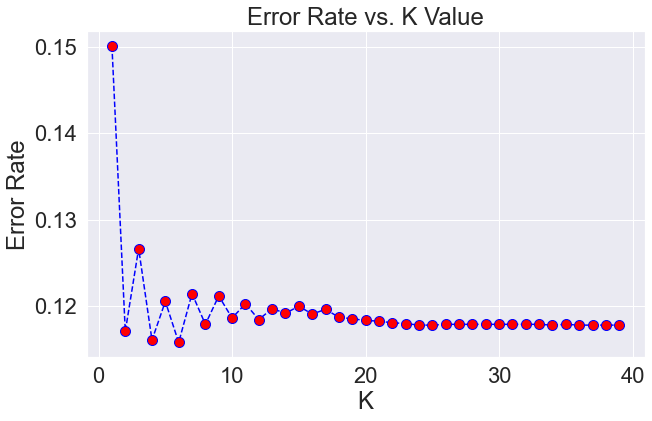

In [362]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X2_train,Y2_train)
 pred_i = knn.predict(X2_test)
 error_rate.append(np.mean(pred_i != Y2_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [363]:
# Insight - smallest error we got is 0.115 at K=5. Further on, we visualize the plot between accuracy and K value

Maximum accuracy:- 0.884256719692814 at K = 5


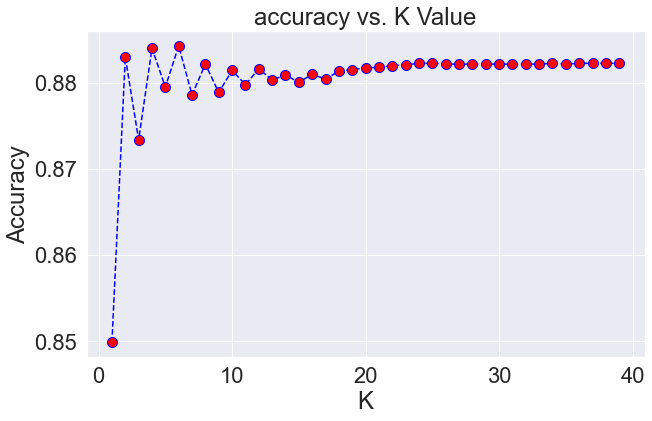

In [364]:
# Will take some time
# finding maximum accuracy of K 

acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X2_train,Y2_train)
    yhat = neigh.predict(X2_test)
    acc.append(metrics.accuracy_score(Y2_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [365]:
# Insight maximum accuracy is also at K = 5   0.884 